In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Diamonds"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Diamonds
0,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006820,10
1,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006821,10
2,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006822,10
3,0,0,0,0,0,0,1,0,2001-01-01 00:00:00.006823,K
4,0,0,0,1,0,0,0,0,2001-02-01 00:00:00.006824,10


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Diamonds,id
29119,1,0,0,0,0,0,0,0,2017-12-07 00:00:00.035924,7,1
29120,0,0,0,0,1,0,0,0,2017-12-07 00:00:00.035925,J,1
29121,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035926,Q,1
29122,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035927,8,1
29123,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035928,10,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:02<01:48,  2.77s/it]

Rolling:   5%|▌         | 2/40 [00:02<00:46,  1.22s/it]

Rolling:  15%|█▌        | 6/40 [00:04<00:16,  2.01it/s]

Rolling:  18%|█▊        | 7/40 [00:04<00:15,  2.14it/s]

Rolling:  20%|██        | 8/40 [00:04<00:13,  2.35it/s]

Rolling:  22%|██▎       | 9/40 [00:04<00:12,  2.52it/s]

Rolling:  25%|██▌       | 10/40 [00:05<00:11,  2.66it/s]

Rolling:  28%|██▊       | 11/40 [00:05<00:10,  2.71it/s]

Rolling:  30%|███       | 12/40 [00:06<00:10,  2.68it/s]

Rolling:  32%|███▎      | 13/40 [00:06<00:08,  3.17it/s]

Rolling:  35%|███▌      | 14/40 [00:06<00:08,  2.94it/s]

Rolling:  38%|███▊      | 15/40 [00:06<00:07,  3.44it/s]

Rolling:  40%|████      | 16/40 [00:06<00:06,  3.87it/s]

Rolling:  42%|████▎     | 17/40 [00:07<00:07,  3.13it/s]

Rolling:  45%|████▌     | 18/40 [00:07<00:06,  3.57it/s]

Rolling:  48%|████▊     | 19/40 [00:07<00:05,  3.89it/s]

Rolling:  50%|█████     | 20/40 [00:08<00:06,  2.95it/s]

Rolling:  52%|█████▎    | 21/40 [00:08<00:05,  3.42it/s]

Rolling:  55%|█████▌    | 22/40 [00:08<00:04,  3.89it/s]

Rolling:  57%|█████▊    | 23/40 [00:09<00:06,  2.79it/s]

Rolling:  60%|██████    | 24/40 [00:09<00:04,  3.26it/s]

Rolling:  62%|██████▎   | 25/40 [00:09<00:03,  3.76it/s]

Rolling:  65%|██████▌   | 26/40 [00:09<00:03,  4.13it/s]

Rolling:  68%|██████▊   | 27/40 [00:10<00:02,  4.45it/s]

Rolling:  70%|███████   | 28/40 [00:10<00:04,  2.65it/s]

Rolling:  72%|███████▎  | 29/40 [00:10<00:03,  3.12it/s]

Rolling:  75%|███████▌  | 30/40 [00:11<00:02,  3.63it/s]

Rolling:  78%|███████▊  | 31/40 [00:11<00:02,  4.11it/s]

Rolling:  80%|████████  | 32/40 [00:11<00:01,  4.42it/s]

Rolling:  82%|████████▎ | 33/40 [00:11<00:01,  4.67it/s]

Rolling:  85%|████████▌ | 34/40 [00:12<00:02,  2.64it/s]

Rolling:  88%|████████▊ | 35/40 [00:12<00:01,  3.20it/s]

Rolling:  90%|█████████ | 36/40 [00:12<00:01,  3.72it/s]

Rolling:  92%|█████████▎| 37/40 [00:12<00:00,  4.27it/s]

Rolling:  95%|█████████▌| 38/40 [00:13<00:00,  4.76it/s]

Rolling:  98%|█████████▊| 39/40 [00:13<00:00,  5.16it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  5.50it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:04<03:08,  4.84s/it]

Rolling:   5%|▌         | 2/40 [00:05<01:39,  2.61s/it]

Rolling:   8%|▊         | 3/40 [00:07<01:23,  2.25s/it]

Rolling:  10%|█         | 4/40 [00:08<00:58,  1.62s/it]

Rolling:  12%|█▎        | 5/40 [00:10<00:58,  1.67s/it]

Rolling:  15%|█▌        | 6/40 [00:10<00:43,  1.28s/it]

Rolling:  18%|█▊        | 7/40 [00:11<00:35,  1.07s/it]

Rolling:  20%|██        | 8/40 [00:12<00:39,  1.24s/it]

Rolling:  22%|██▎       | 9/40 [00:13<00:31,  1.02s/it]

Rolling:  25%|██▌       | 10/40 [00:14<00:26,  1.13it/s]

Rolling:  28%|██▊       | 11/40 [00:14<00:23,  1.22it/s]

Rolling:  30%|███       | 12/40 [00:15<00:21,  1.31it/s]

Rolling:  32%|███▎      | 13/40 [00:17<00:31,  1.17s/it]

Rolling:  35%|███▌      | 14/40 [00:18<00:26,  1.01s/it]

Rolling:  38%|███▊      | 15/40 [00:18<00:21,  1.15it/s]

Rolling:  40%|████      | 16/40 [00:19<00:18,  1.27it/s]

Rolling:  42%|████▎     | 17/40 [00:19<00:16,  1.37it/s]

Rolling:  45%|████▌     | 18/40 [00:22<00:27,  1.24s/it]

Rolling:  48%|████▊     | 19/40 [00:22<00:21,  1.04s/it]

Rolling:  50%|█████     | 20/40 [00:23<00:17,  1.12it/s]

Rolling:  52%|█████▎    | 21/40 [00:23<00:15,  1.24it/s]

Rolling:  55%|█████▌    | 22/40 [00:24<00:13,  1.35it/s]

Rolling:  57%|█████▊    | 23/40 [00:25<00:11,  1.43it/s]

Rolling:  60%|██████    | 24/40 [00:25<00:10,  1.49it/s]

Rolling:  62%|██████▎   | 25/40 [00:28<00:20,  1.37s/it]

Rolling:  65%|██████▌   | 26/40 [00:29<00:15,  1.14s/it]

Rolling:  68%|██████▊   | 27/40 [00:29<00:12,  1.03it/s]

Rolling:  70%|███████   | 28/40 [00:30<00:10,  1.18it/s]

Rolling:  72%|███████▎  | 29/40 [00:31<00:08,  1.30it/s]

Rolling:  75%|███████▌  | 30/40 [00:31<00:07,  1.40it/s]

Rolling:  78%|███████▊  | 31/40 [00:32<00:06,  1.43it/s]

Rolling:  80%|████████  | 32/40 [00:33<00:05,  1.41it/s]

Rolling:  82%|████████▎ | 33/40 [00:36<00:10,  1.49s/it]

Rolling:  85%|████████▌ | 34/40 [00:36<00:07,  1.20s/it]

Rolling:  88%|████████▊ | 35/40 [00:37<00:04,  1.01it/s]

Rolling:  90%|█████████ | 36/40 [00:37<00:03,  1.18it/s]

Rolling:  92%|█████████▎| 37/40 [00:38<00:02,  1.35it/s]

Rolling:  95%|█████████▌| 38/40 [00:38<00:01,  1.49it/s]

Rolling:  98%|█████████▊| 39/40 [00:39<00:00,  1.61it/s]

Rolling: 100%|██████████| 40/40 [00:39<00:00,  1.79it/s]

Rolling: 100%|██████████| 40/40 [00:39<00:00,  1.00it/s]

,0,1,2,3,4,5,6,7,Date,Diamonds,id
33509995,1,0,0,0,0,0,0,0,2017-12-07 00:00:00.035924,7,"(1, 2017-12-07 00:00:00.035928)"
33509996,0,0,0,0,1,0,0,0,2017-12-07 00:00:00.035925,J,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035926,Q,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035927,8,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035928,10,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Diamonds
29124,35944,7
29125,35945,K
29126,35946,Q
29127,35947,8
29128,35948,Q


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               43600     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 54,508


Trainable params: 54,508


Non-trainable params: 0


_________________________________________________________________


2022-08-12 20:30:32.126169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 14:04 - loss: 2.0828 - accuracy: 0.0938

  2/437 [..............................] - ETA: 3:31 - loss: 2.0792 - accuracy: 0.1094 

  3/437 [..............................] - ETA: 3:29 - loss: 2.0755 - accuracy: 0.1458

  4/437 [..............................] - ETA: 3:28 - loss: 2.0755 - accuracy: 0.1523

  5/437 [..............................] - ETA: 3:28 - loss: 2.0791 - accuracy: 0.1437

  6/437 [..............................] - ETA: 3:28 - loss: 2.0809 - accuracy: 0.1302

  7/437 [..............................] - ETA: 3:29 - loss: 2.0787 - accuracy: 0.1362

  8/437 [..............................] - ETA: 3:29 - loss: 2.0800 - accuracy: 0.1328

  9/437 [..............................] - ETA: 3:28 - loss: 2.0780 - accuracy: 0.1441

 10/437 [..............................] - ETA: 3:27 - loss: 2.0783 - accuracy: 0.1437

 11/437 [..............................] - ETA: 3:26 - loss: 2.0775 - accuracy: 0.1392

 12/437 [..............................] - ETA: 3:26 - loss: 2.0775 - accuracy: 0.1380

 13/437 [..............................] - ETA: 3:25 - loss: 2.0782 - accuracy: 0.1346

 14/437 [..............................] - ETA: 3:25 - loss: 2.0779 - accuracy: 0.1384

 15/437 [>.............................] - ETA: 3:24 - loss: 2.0798 - accuracy: 0.1333

 16/437 [>.............................] - ETA: 3:24 - loss: 2.0792 - accuracy: 0.1328

 17/437 [>.............................] - ETA: 3:23 - loss: 2.0795 - accuracy: 0.1314

 18/437 [>.............................] - ETA: 3:23 - loss: 2.0795 - accuracy: 0.1311

 19/437 [>.............................] - ETA: 3:23 - loss: 2.0799 - accuracy: 0.1283

 20/437 [>.............................] - ETA: 3:22 - loss: 2.0802 - accuracy: 0.1281

 21/437 [>.............................] - ETA: 3:22 - loss: 2.0802 - accuracy: 0.1265

 22/437 [>.............................] - ETA: 3:21 - loss: 2.0805 - accuracy: 0.1250

 23/437 [>.............................] - ETA: 3:21 - loss: 2.0806 - accuracy: 0.1236

 24/437 [>.............................] - ETA: 3:20 - loss: 2.0811 - accuracy: 0.1230

 25/437 [>.............................] - ETA: 3:20 - loss: 2.0806 - accuracy: 0.1244

 26/437 [>.............................] - ETA: 3:20 - loss: 2.0806 - accuracy: 0.1232

 27/437 [>.............................] - ETA: 3:19 - loss: 2.0804 - accuracy: 0.1238

 28/437 [>.............................] - ETA: 3:19 - loss: 2.0804 - accuracy: 0.1228

 29/437 [>.............................] - ETA: 3:18 - loss: 2.0805 - accuracy: 0.1223

 30/437 [=>............................] - ETA: 3:18 - loss: 2.0804 - accuracy: 0.1224

 31/437 [=>............................] - ETA: 3:20 - loss: 2.0808 - accuracy: 0.1205

 32/437 [=>............................] - ETA: 3:20 - loss: 2.0803 - accuracy: 0.1226

 33/437 [=>............................] - ETA: 3:20 - loss: 2.0804 - accuracy: 0.1217

 34/437 [=>............................] - ETA: 3:19 - loss: 2.0805 - accuracy: 0.1222

 35/437 [=>............................] - ETA: 3:19 - loss: 2.0805 - accuracy: 0.1232

 36/437 [=>............................] - ETA: 3:18 - loss: 2.0803 - accuracy: 0.1233

 37/437 [=>............................] - ETA: 3:18 - loss: 2.0799 - accuracy: 0.1258

 38/437 [=>............................] - ETA: 3:17 - loss: 2.0801 - accuracy: 0.1250

 39/437 [=>............................] - ETA: 3:17 - loss: 2.0800 - accuracy: 0.1270

 40/437 [=>............................] - ETA: 3:16 - loss: 2.0799 - accuracy: 0.1266

 41/437 [=>............................] - ETA: 3:16 - loss: 2.0801 - accuracy: 0.1269

 42/437 [=>............................] - ETA: 3:15 - loss: 2.0801 - accuracy: 0.1261

 43/437 [=>............................] - ETA: 3:15 - loss: 2.0802 - accuracy: 0.1261

 44/437 [==>...........................] - ETA: 3:14 - loss: 2.0804 - accuracy: 0.1257

 45/437 [==>...........................] - ETA: 3:14 - loss: 2.0805 - accuracy: 0.1257

 46/437 [==>...........................] - ETA: 3:13 - loss: 2.0806 - accuracy: 0.1250

 47/437 [==>...........................] - ETA: 3:13 - loss: 2.0805 - accuracy: 0.1267

 48/437 [==>...........................] - ETA: 3:13 - loss: 2.0807 - accuracy: 0.1260

 49/437 [==>...........................] - ETA: 3:12 - loss: 2.0806 - accuracy: 0.1276

 50/437 [==>...........................] - ETA: 3:11 - loss: 2.0810 - accuracy: 0.1275

 51/437 [==>...........................] - ETA: 3:11 - loss: 2.0811 - accuracy: 0.1262

 52/437 [==>...........................] - ETA: 3:11 - loss: 2.0812 - accuracy: 0.1256

 53/437 [==>...........................] - ETA: 3:10 - loss: 2.0810 - accuracy: 0.1259

 54/437 [==>...........................] - ETA: 3:10 - loss: 2.0810 - accuracy: 0.1279

 55/437 [==>...........................] - ETA: 3:09 - loss: 2.0808 - accuracy: 0.1290

 56/437 [==>...........................] - ETA: 3:09 - loss: 2.0807 - accuracy: 0.1283

 57/437 [==>...........................] - ETA: 3:08 - loss: 2.0808 - accuracy: 0.1283

 58/437 [==>...........................] - ETA: 3:08 - loss: 2.0809 - accuracy: 0.1280

 59/437 [===>..........................] - ETA: 3:07 - loss: 2.0810 - accuracy: 0.1271

 60/437 [===>..........................] - ETA: 3:07 - loss: 2.0811 - accuracy: 0.1276

 61/437 [===>..........................] - ETA: 3:07 - loss: 2.0810 - accuracy: 0.1288

 62/437 [===>..........................] - ETA: 3:06 - loss: 2.0811 - accuracy: 0.1290

 63/437 [===>..........................] - ETA: 3:06 - loss: 2.0811 - accuracy: 0.1295

 64/437 [===>..........................] - ETA: 3:05 - loss: 2.0812 - accuracy: 0.1289

 65/437 [===>..........................] - ETA: 3:05 - loss: 2.0812 - accuracy: 0.1291

 66/437 [===>..........................] - ETA: 3:04 - loss: 2.0813 - accuracy: 0.1290

 67/437 [===>..........................] - ETA: 3:04 - loss: 2.0812 - accuracy: 0.1290

 68/437 [===>..........................] - ETA: 3:03 - loss: 2.0814 - accuracy: 0.1282

 69/437 [===>..........................] - ETA: 3:03 - loss: 2.0815 - accuracy: 0.1275

 70/437 [===>..........................] - ETA: 3:02 - loss: 2.0814 - accuracy: 0.1279

 71/437 [===>..........................] - ETA: 3:02 - loss: 2.0814 - accuracy: 0.1287

 72/437 [===>..........................] - ETA: 3:02 - loss: 2.0815 - accuracy: 0.1285

 73/437 [====>.........................] - ETA: 3:01 - loss: 2.0813 - accuracy: 0.1297

 74/437 [====>.........................] - ETA: 3:01 - loss: 2.0812 - accuracy: 0.1294

 75/437 [====>.........................] - ETA: 3:00 - loss: 2.0812 - accuracy: 0.1294

 76/437 [====>.........................] - ETA: 3:00 - loss: 2.0812 - accuracy: 0.1289

 77/437 [====>.........................] - ETA: 2:59 - loss: 2.0812 - accuracy: 0.1280

 78/437 [====>.........................] - ETA: 2:59 - loss: 2.0812 - accuracy: 0.1274

 79/437 [====>.........................] - ETA: 2:58 - loss: 2.0812 - accuracy: 0.1268

 80/437 [====>.........................] - ETA: 2:58 - loss: 2.0812 - accuracy: 0.1262

 81/437 [====>.........................] - ETA: 2:58 - loss: 2.0812 - accuracy: 0.1256

 82/437 [====>.........................] - ETA: 2:57 - loss: 2.0812 - accuracy: 0.1254

 83/437 [====>.........................] - ETA: 2:57 - loss: 2.0813 - accuracy: 0.1250

 84/437 [====>.........................] - ETA: 2:56 - loss: 2.0814 - accuracy: 0.1252

 85/437 [====>.........................] - ETA: 2:56 - loss: 2.0814 - accuracy: 0.1246

 86/437 [====>.........................] - ETA: 2:55 - loss: 2.0815 - accuracy: 0.1243

 87/437 [====>.........................] - ETA: 2:55 - loss: 2.0815 - accuracy: 0.1237

 88/437 [=====>........................] - ETA: 2:54 - loss: 2.0815 - accuracy: 0.1245

 89/437 [=====>........................] - ETA: 2:54 - loss: 2.0815 - accuracy: 0.1246

 90/437 [=====>........................] - ETA: 2:53 - loss: 2.0816 - accuracy: 0.1240

 91/437 [=====>........................] - ETA: 2:53 - loss: 2.0817 - accuracy: 0.1233

 92/437 [=====>........................] - ETA: 2:53 - loss: 2.0816 - accuracy: 0.1240

 93/437 [=====>........................] - ETA: 2:52 - loss: 2.0817 - accuracy: 0.1235

 94/437 [=====>........................] - ETA: 2:52 - loss: 2.0817 - accuracy: 0.1233

 95/437 [=====>........................] - ETA: 2:51 - loss: 2.0816 - accuracy: 0.1238

 96/437 [=====>........................] - ETA: 2:51 - loss: 2.0816 - accuracy: 0.1240

 97/437 [=====>........................] - ETA: 2:51 - loss: 2.0816 - accuracy: 0.1242

 98/437 [=====>........................] - ETA: 2:50 - loss: 2.0816 - accuracy: 0.1245

 99/437 [=====>........................] - ETA: 2:50 - loss: 2.0816 - accuracy: 0.1244

100/437 [=====>........................] - ETA: 2:49 - loss: 2.0815 - accuracy: 0.1247

101/437 [=====>........................] - ETA: 2:49 - loss: 2.0814 - accuracy: 0.1253

102/437 [======>.......................] - ETA: 2:49 - loss: 2.0815 - accuracy: 0.1253

103/437 [======>.......................] - ETA: 2:48 - loss: 2.0815 - accuracy: 0.1252

104/437 [======>.......................] - ETA: 2:48 - loss: 2.0815 - accuracy: 0.1255

105/437 [======>.......................] - ETA: 2:47 - loss: 2.0814 - accuracy: 0.1259

106/437 [======>.......................] - ETA: 2:47 - loss: 2.0814 - accuracy: 0.1263

107/437 [======>.......................] - ETA: 2:46 - loss: 2.0814 - accuracy: 0.1266

108/437 [======>.......................] - ETA: 2:46 - loss: 2.0813 - accuracy: 0.1270

109/437 [======>.......................] - ETA: 2:46 - loss: 2.0813 - accuracy: 0.1269

110/437 [======>.......................] - ETA: 2:45 - loss: 2.0811 - accuracy: 0.1280

111/437 [======>.......................] - ETA: 2:45 - loss: 2.0811 - accuracy: 0.1275

112/437 [======>.......................] - ETA: 2:44 - loss: 2.0812 - accuracy: 0.1275

113/437 [======>.......................] - ETA: 2:44 - loss: 2.0812 - accuracy: 0.1272

114/437 [======>.......................] - ETA: 2:44 - loss: 2.0812 - accuracy: 0.1272

115/437 [======>.......................] - ETA: 2:43 - loss: 2.0812 - accuracy: 0.1270

116/437 [======>.......................] - ETA: 2:43 - loss: 2.0812 - accuracy: 0.1272

117/437 [=======>......................] - ETA: 2:43 - loss: 2.0812 - accuracy: 0.1267

118/437 [=======>......................] - ETA: 2:42 - loss: 2.0812 - accuracy: 0.1266

119/437 [=======>......................] - ETA: 2:42 - loss: 2.0813 - accuracy: 0.1264

120/437 [=======>......................] - ETA: 2:42 - loss: 2.0813 - accuracy: 0.1260

121/437 [=======>......................] - ETA: 2:41 - loss: 2.0813 - accuracy: 0.1260

122/437 [=======>......................] - ETA: 2:41 - loss: 2.0812 - accuracy: 0.1265

123/437 [=======>......................] - ETA: 2:40 - loss: 2.0813 - accuracy: 0.1263

124/437 [=======>......................] - ETA: 2:40 - loss: 2.0813 - accuracy: 0.1263

125/437 [=======>......................] - ETA: 2:39 - loss: 2.0813 - accuracy: 0.1258

126/437 [=======>......................] - ETA: 2:39 - loss: 2.0813 - accuracy: 0.1256

127/437 [=======>......................] - ETA: 2:38 - loss: 2.0813 - accuracy: 0.1259

128/437 [=======>......................] - ETA: 2:38 - loss: 2.0813 - accuracy: 0.1260

129/437 [=======>......................] - ETA: 2:37 - loss: 2.0813 - accuracy: 0.1254

130/437 [=======>......................] - ETA: 2:37 - loss: 2.0813 - accuracy: 0.1251

131/437 [=======>......................] - ETA: 2:37 - loss: 2.0813 - accuracy: 0.1252

132/437 [========>.....................] - ETA: 2:36 - loss: 2.0813 - accuracy: 0.1250

133/437 [========>.....................] - ETA: 2:36 - loss: 2.0814 - accuracy: 0.1245

134/437 [========>.....................] - ETA: 2:35 - loss: 2.0814 - accuracy: 0.1244

135/437 [========>.....................] - ETA: 2:35 - loss: 2.0814 - accuracy: 0.1242

136/437 [========>.....................] - ETA: 2:34 - loss: 2.0813 - accuracy: 0.1239

137/437 [========>.....................] - ETA: 2:34 - loss: 2.0814 - accuracy: 0.1234

138/437 [========>.....................] - ETA: 2:33 - loss: 2.0814 - accuracy: 0.1233

139/437 [========>.....................] - ETA: 2:33 - loss: 2.0815 - accuracy: 0.1226

140/437 [========>.....................] - ETA: 2:32 - loss: 2.0815 - accuracy: 0.1227

141/437 [========>.....................] - ETA: 2:32 - loss: 2.0816 - accuracy: 0.1231

142/437 [========>.....................] - ETA: 2:31 - loss: 2.0815 - accuracy: 0.1230

143/437 [========>.....................] - ETA: 2:31 - loss: 2.0816 - accuracy: 0.1231

144/437 [========>.....................] - ETA: 2:30 - loss: 2.0815 - accuracy: 0.1233

145/437 [========>.....................] - ETA: 2:30 - loss: 2.0815 - accuracy: 0.1233

146/437 [=========>....................] - ETA: 2:30 - loss: 2.0815 - accuracy: 0.1235

147/437 [=========>....................] - ETA: 2:29 - loss: 2.0815 - accuracy: 0.1238

148/437 [=========>....................] - ETA: 2:29 - loss: 2.0814 - accuracy: 0.1236

149/437 [=========>....................] - ETA: 2:28 - loss: 2.0814 - accuracy: 0.1237

150/437 [=========>....................] - ETA: 2:28 - loss: 2.0813 - accuracy: 0.1240

151/437 [=========>....................] - ETA: 2:27 - loss: 2.0814 - accuracy: 0.1237

152/437 [=========>....................] - ETA: 2:27 - loss: 2.0813 - accuracy: 0.1236

153/437 [=========>....................] - ETA: 2:26 - loss: 2.0814 - accuracy: 0.1233

154/437 [=========>....................] - ETA: 2:26 - loss: 2.0814 - accuracy: 0.1233

155/437 [=========>....................] - ETA: 2:25 - loss: 2.0814 - accuracy: 0.1230

156/437 [=========>....................] - ETA: 2:25 - loss: 2.0814 - accuracy: 0.1230

157/437 [=========>....................] - ETA: 2:25 - loss: 2.0814 - accuracy: 0.1232

158/437 [=========>....................] - ETA: 2:24 - loss: 2.0814 - accuracy: 0.1232

159/437 [=========>....................] - ETA: 2:24 - loss: 2.0814 - accuracy: 0.1231

160/437 [=========>....................] - ETA: 2:23 - loss: 2.0814 - accuracy: 0.1227

161/437 [==========>...................] - ETA: 2:23 - loss: 2.0814 - accuracy: 0.1224

162/437 [==========>...................] - ETA: 2:22 - loss: 2.0814 - accuracy: 0.1226

163/437 [==========>...................] - ETA: 2:22 - loss: 2.0813 - accuracy: 0.1226

164/437 [==========>...................] - ETA: 2:21 - loss: 2.0813 - accuracy: 0.1226

165/437 [==========>...................] - ETA: 2:21 - loss: 2.0813 - accuracy: 0.1228

166/437 [==========>...................] - ETA: 2:20 - loss: 2.0813 - accuracy: 0.1226

167/437 [==========>...................] - ETA: 2:20 - loss: 2.0814 - accuracy: 0.1222

168/437 [==========>...................] - ETA: 2:19 - loss: 2.0813 - accuracy: 0.1222

169/437 [==========>...................] - ETA: 2:19 - loss: 2.0813 - accuracy: 0.1220

170/437 [==========>...................] - ETA: 2:18 - loss: 2.0812 - accuracy: 0.1226

171/437 [==========>...................] - ETA: 2:18 - loss: 2.0812 - accuracy: 0.1224

172/437 [==========>...................] - ETA: 2:17 - loss: 2.0812 - accuracy: 0.1224

173/437 [==========>...................] - ETA: 2:17 - loss: 2.0813 - accuracy: 0.1219

174/437 [==========>...................] - ETA: 2:16 - loss: 2.0813 - accuracy: 0.1221

175/437 [===========>..................] - ETA: 2:16 - loss: 2.0813 - accuracy: 0.1220

176/437 [===========>..................] - ETA: 2:15 - loss: 2.0813 - accuracy: 0.1218

177/437 [===========>..................] - ETA: 2:15 - loss: 2.0813 - accuracy: 0.1222

178/437 [===========>..................] - ETA: 2:14 - loss: 2.0813 - accuracy: 0.1221

179/437 [===========>..................] - ETA: 2:14 - loss: 2.0813 - accuracy: 0.1222

180/437 [===========>..................] - ETA: 2:13 - loss: 2.0813 - accuracy: 0.1220

181/437 [===========>..................] - ETA: 2:13 - loss: 2.0813 - accuracy: 0.1219

182/437 [===========>..................] - ETA: 2:12 - loss: 2.0812 - accuracy: 0.1220

183/437 [===========>..................] - ETA: 2:12 - loss: 2.0812 - accuracy: 0.1219

184/437 [===========>..................] - ETA: 2:11 - loss: 2.0813 - accuracy: 0.1221

185/437 [===========>..................] - ETA: 2:11 - loss: 2.0813 - accuracy: 0.1222

186/437 [===========>..................] - ETA: 2:10 - loss: 2.0813 - accuracy: 0.1225

187/437 [===========>..................] - ETA: 2:10 - loss: 2.0813 - accuracy: 0.1226

188/437 [===========>..................] - ETA: 2:09 - loss: 2.0812 - accuracy: 0.1225

189/437 [===========>..................] - ETA: 2:09 - loss: 2.0811 - accuracy: 0.1227

190/437 [============>.................] - ETA: 2:08 - loss: 2.0811 - accuracy: 0.1227

191/437 [============>.................] - ETA: 2:08 - loss: 2.0812 - accuracy: 0.1224

192/437 [============>.................] - ETA: 2:07 - loss: 2.0812 - accuracy: 0.1226

193/437 [============>.................] - ETA: 2:07 - loss: 2.0812 - accuracy: 0.1224

194/437 [============>.................] - ETA: 2:06 - loss: 2.0812 - accuracy: 0.1221

195/437 [============>.................] - ETA: 2:06 - loss: 2.0812 - accuracy: 0.1222

196/437 [============>.................] - ETA: 2:05 - loss: 2.0812 - accuracy: 0.1224

197/437 [============>.................] - ETA: 2:05 - loss: 2.0812 - accuracy: 0.1225

198/437 [============>.................] - ETA: 2:04 - loss: 2.0812 - accuracy: 0.1222

199/437 [============>.................] - ETA: 2:04 - loss: 2.0812 - accuracy: 0.1219

200/437 [============>.................] - ETA: 2:03 - loss: 2.0812 - accuracy: 0.1218

201/437 [============>.................] - ETA: 2:03 - loss: 2.0812 - accuracy: 0.1216

202/437 [============>.................] - ETA: 2:02 - loss: 2.0812 - accuracy: 0.1214

203/437 [============>.................] - ETA: 2:02 - loss: 2.0812 - accuracy: 0.1214

204/437 [=============>................] - ETA: 2:01 - loss: 2.0812 - accuracy: 0.1212

205/437 [=============>................] - ETA: 2:01 - loss: 2.0812 - accuracy: 0.1213

206/437 [=============>................] - ETA: 2:00 - loss: 2.0813 - accuracy: 0.1212

207/437 [=============>................] - ETA: 2:00 - loss: 2.0813 - accuracy: 0.1210

208/437 [=============>................] - ETA: 1:59 - loss: 2.0813 - accuracy: 0.1209

209/437 [=============>................] - ETA: 1:59 - loss: 2.0813 - accuracy: 0.1211

210/437 [=============>................] - ETA: 1:58 - loss: 2.0813 - accuracy: 0.1209

211/437 [=============>................] - ETA: 1:57 - loss: 2.0812 - accuracy: 0.1209

212/437 [=============>................] - ETA: 1:57 - loss: 2.0813 - accuracy: 0.1207

213/437 [=============>................] - ETA: 1:56 - loss: 2.0813 - accuracy: 0.1207

214/437 [=============>................] - ETA: 1:56 - loss: 2.0813 - accuracy: 0.1210

215/437 [=============>................] - ETA: 1:55 - loss: 2.0813 - accuracy: 0.1209

216/437 [=============>................] - ETA: 1:55 - loss: 2.0813 - accuracy: 0.1209

217/437 [=============>................] - ETA: 1:54 - loss: 2.0813 - accuracy: 0.1208

218/437 [=============>................] - ETA: 1:54 - loss: 2.0813 - accuracy: 0.1208

219/437 [==============>...............] - ETA: 1:53 - loss: 2.0814 - accuracy: 0.1204

220/437 [==============>...............] - ETA: 1:53 - loss: 2.0814 - accuracy: 0.1202

221/437 [==============>...............] - ETA: 1:52 - loss: 2.0814 - accuracy: 0.1202

222/437 [==============>...............] - ETA: 1:52 - loss: 2.0814 - accuracy: 0.1201

223/437 [==============>...............] - ETA: 1:51 - loss: 2.0814 - accuracy: 0.1203

224/437 [==============>...............] - ETA: 1:51 - loss: 2.0813 - accuracy: 0.1204

225/437 [==============>...............] - ETA: 1:50 - loss: 2.0813 - accuracy: 0.1208

226/437 [==============>...............] - ETA: 1:50 - loss: 2.0813 - accuracy: 0.1206

227/437 [==============>...............] - ETA: 1:49 - loss: 2.0813 - accuracy: 0.1207

228/437 [==============>...............] - ETA: 1:49 - loss: 2.0813 - accuracy: 0.1206

229/437 [==============>...............] - ETA: 1:48 - loss: 2.0813 - accuracy: 0.1208

230/437 [==============>...............] - ETA: 1:48 - loss: 2.0813 - accuracy: 0.1209

231/437 [==============>...............] - ETA: 1:47 - loss: 2.0812 - accuracy: 0.1209

232/437 [==============>...............] - ETA: 1:47 - loss: 2.0812 - accuracy: 0.1209

233/437 [==============>...............] - ETA: 1:46 - loss: 2.0812 - accuracy: 0.1210

234/437 [===============>..............] - ETA: 1:46 - loss: 2.0813 - accuracy: 0.1207

235/437 [===============>..............] - ETA: 1:45 - loss: 2.0812 - accuracy: 0.1210

236/437 [===============>..............] - ETA: 1:45 - loss: 2.0812 - accuracy: 0.1211

237/437 [===============>..............] - ETA: 1:44 - loss: 2.0812 - accuracy: 0.1214

238/437 [===============>..............] - ETA: 1:44 - loss: 2.0811 - accuracy: 0.1219

239/437 [===============>..............] - ETA: 1:43 - loss: 2.0811 - accuracy: 0.1217

240/437 [===============>..............] - ETA: 1:43 - loss: 2.0811 - accuracy: 0.1219

241/437 [===============>..............] - ETA: 1:42 - loss: 2.0811 - accuracy: 0.1217

242/437 [===============>..............] - ETA: 1:42 - loss: 2.0811 - accuracy: 0.1215

243/437 [===============>..............] - ETA: 1:41 - loss: 2.0811 - accuracy: 0.1214

244/437 [===============>..............] - ETA: 1:41 - loss: 2.0811 - accuracy: 0.1214

245/437 [===============>..............] - ETA: 1:40 - loss: 2.0811 - accuracy: 0.1213

246/437 [===============>..............] - ETA: 1:40 - loss: 2.0811 - accuracy: 0.1212

247/437 [===============>..............] - ETA: 1:39 - loss: 2.0811 - accuracy: 0.1214

248/437 [================>.............] - ETA: 1:39 - loss: 2.0811 - accuracy: 0.1217

249/437 [================>.............] - ETA: 1:38 - loss: 2.0811 - accuracy: 0.1215

250/437 [================>.............] - ETA: 1:38 - loss: 2.0811 - accuracy: 0.1214

251/437 [================>.............] - ETA: 1:38 - loss: 2.0811 - accuracy: 0.1213

252/437 [================>.............] - ETA: 1:37 - loss: 2.0811 - accuracy: 0.1212

253/437 [================>.............] - ETA: 1:37 - loss: 2.0811 - accuracy: 0.1211

254/437 [================>.............] - ETA: 1:36 - loss: 2.0811 - accuracy: 0.1212

255/437 [================>.............] - ETA: 1:36 - loss: 2.0810 - accuracy: 0.1212

256/437 [================>.............] - ETA: 1:35 - loss: 2.0810 - accuracy: 0.1212

257/437 [================>.............] - ETA: 1:35 - loss: 2.0810 - accuracy: 0.1212

258/437 [================>.............] - ETA: 1:34 - loss: 2.0810 - accuracy: 0.1211

259/437 [================>.............] - ETA: 1:34 - loss: 2.0810 - accuracy: 0.1213

260/437 [================>.............] - ETA: 1:33 - loss: 2.0810 - accuracy: 0.1215

261/437 [================>.............] - ETA: 1:33 - loss: 2.0810 - accuracy: 0.1213

262/437 [================>.............] - ETA: 1:32 - loss: 2.0810 - accuracy: 0.1213

263/437 [=================>............] - ETA: 1:32 - loss: 2.0810 - accuracy: 0.1213

264/437 [=================>............] - ETA: 1:32 - loss: 2.0810 - accuracy: 0.1214

265/437 [=================>............] - ETA: 1:31 - loss: 2.0810 - accuracy: 0.1215

266/437 [=================>............] - ETA: 1:31 - loss: 2.0810 - accuracy: 0.1216

267/437 [=================>............] - ETA: 1:30 - loss: 2.0809 - accuracy: 0.1218

268/437 [=================>............] - ETA: 1:30 - loss: 2.0809 - accuracy: 0.1218

269/437 [=================>............] - ETA: 1:29 - loss: 2.0809 - accuracy: 0.1218

270/437 [=================>............] - ETA: 1:29 - loss: 2.0810 - accuracy: 0.1218

271/437 [=================>............] - ETA: 1:28 - loss: 2.0810 - accuracy: 0.1218

272/437 [=================>............] - ETA: 1:28 - loss: 2.0810 - accuracy: 0.1218

273/437 [=================>............] - ETA: 1:27 - loss: 2.0810 - accuracy: 0.1219

274/437 [=================>............] - ETA: 1:27 - loss: 2.0810 - accuracy: 0.1219

275/437 [=================>............] - ETA: 1:26 - loss: 2.0810 - accuracy: 0.1221

276/437 [=================>............] - ETA: 1:26 - loss: 2.0810 - accuracy: 0.1222

277/437 [==================>...........] - ETA: 1:25 - loss: 2.0810 - accuracy: 0.1220

278/437 [==================>...........] - ETA: 1:25 - loss: 2.0810 - accuracy: 0.1222

279/437 [==================>...........] - ETA: 1:24 - loss: 2.0810 - accuracy: 0.1221

280/437 [==================>...........] - ETA: 1:24 - loss: 2.0810 - accuracy: 0.1222

281/437 [==================>...........] - ETA: 1:23 - loss: 2.0810 - accuracy: 0.1223

282/437 [==================>...........] - ETA: 1:23 - loss: 2.0810 - accuracy: 0.1222

283/437 [==================>...........] - ETA: 1:22 - loss: 2.0810 - accuracy: 0.1225

284/437 [==================>...........] - ETA: 1:22 - loss: 2.0810 - accuracy: 0.1223

285/437 [==================>...........] - ETA: 1:22 - loss: 2.0809 - accuracy: 0.1226

286/437 [==================>...........] - ETA: 1:21 - loss: 2.0809 - accuracy: 0.1227

287/437 [==================>...........] - ETA: 1:21 - loss: 2.0809 - accuracy: 0.1225

288/437 [==================>...........] - ETA: 1:20 - loss: 2.0809 - accuracy: 0.1225

289/437 [==================>...........] - ETA: 1:20 - loss: 2.0809 - accuracy: 0.1226

290/437 [==================>...........] - ETA: 1:19 - loss: 2.0809 - accuracy: 0.1228

291/437 [==================>...........] - ETA: 1:19 - loss: 2.0809 - accuracy: 0.1227

292/437 [===================>..........] - ETA: 1:18 - loss: 2.0809 - accuracy: 0.1227

293/437 [===================>..........] - ETA: 1:18 - loss: 2.0809 - accuracy: 0.1230

294/437 [===================>..........] - ETA: 1:17 - loss: 2.0809 - accuracy: 0.1229

295/437 [===================>..........] - ETA: 1:17 - loss: 2.0809 - accuracy: 0.1230

296/437 [===================>..........] - ETA: 1:16 - loss: 2.0809 - accuracy: 0.1230

297/437 [===================>..........] - ETA: 1:16 - loss: 2.0809 - accuracy: 0.1231

298/437 [===================>..........] - ETA: 1:15 - loss: 2.0809 - accuracy: 0.1229

299/437 [===================>..........] - ETA: 1:15 - loss: 2.0808 - accuracy: 0.1232

300/437 [===================>..........] - ETA: 1:14 - loss: 2.0809 - accuracy: 0.1231

301/437 [===================>..........] - ETA: 1:14 - loss: 2.0809 - accuracy: 0.1231

302/437 [===================>..........] - ETA: 1:13 - loss: 2.0809 - accuracy: 0.1234

303/437 [===================>..........] - ETA: 1:13 - loss: 2.0809 - accuracy: 0.1232

304/437 [===================>..........] - ETA: 1:12 - loss: 2.0809 - accuracy: 0.1233

305/437 [===================>..........] - ETA: 1:12 - loss: 2.0809 - accuracy: 0.1233

306/437 [====================>.........] - ETA: 1:11 - loss: 2.0808 - accuracy: 0.1233

307/437 [====================>.........] - ETA: 1:11 - loss: 2.0808 - accuracy: 0.1234

308/437 [====================>.........] - ETA: 1:10 - loss: 2.0807 - accuracy: 0.1235

309/437 [====================>.........] - ETA: 1:10 - loss: 2.0807 - accuracy: 0.1236

310/437 [====================>.........] - ETA: 1:09 - loss: 2.0807 - accuracy: 0.1235

311/437 [====================>.........] - ETA: 1:09 - loss: 2.0807 - accuracy: 0.1235

312/437 [====================>.........] - ETA: 1:08 - loss: 2.0807 - accuracy: 0.1234

313/437 [====================>.........] - ETA: 1:08 - loss: 2.0807 - accuracy: 0.1233

314/437 [====================>.........] - ETA: 1:07 - loss: 2.0807 - accuracy: 0.1233

315/437 [====================>.........] - ETA: 1:06 - loss: 2.0806 - accuracy: 0.1233

316/437 [====================>.........] - ETA: 1:06 - loss: 2.0806 - accuracy: 0.1232

317/437 [====================>.........] - ETA: 1:05 - loss: 2.0807 - accuracy: 0.1231

318/437 [====================>.........] - ETA: 1:05 - loss: 2.0807 - accuracy: 0.1231

319/437 [====================>.........] - ETA: 1:04 - loss: 2.0807 - accuracy: 0.1233

320/437 [====================>.........] - ETA: 1:04 - loss: 2.0806 - accuracy: 0.1233

321/437 [=====================>........] - ETA: 1:03 - loss: 2.0806 - accuracy: 0.1234

322/437 [=====================>........] - ETA: 1:03 - loss: 2.0806 - accuracy: 0.1235

323/437 [=====================>........] - ETA: 1:02 - loss: 2.0806 - accuracy: 0.1236

324/437 [=====================>........] - ETA: 1:02 - loss: 2.0806 - accuracy: 0.1236

325/437 [=====================>........] - ETA: 1:01 - loss: 2.0806 - accuracy: 0.1238

326/437 [=====================>........] - ETA: 1:01 - loss: 2.0806 - accuracy: 0.1240

327/437 [=====================>........] - ETA: 1:00 - loss: 2.0806 - accuracy: 0.1240

328/437 [=====================>........] - ETA: 1:00 - loss: 2.0806 - accuracy: 0.1239

329/437 [=====================>........] - ETA: 59s - loss: 2.0806 - accuracy: 0.1240 

330/437 [=====================>........] - ETA: 59s - loss: 2.0806 - accuracy: 0.1239

331/437 [=====================>........] - ETA: 58s - loss: 2.0807 - accuracy: 0.1240

332/437 [=====================>........] - ETA: 58s - loss: 2.0806 - accuracy: 0.1240

333/437 [=====================>........] - ETA: 57s - loss: 2.0806 - accuracy: 0.1239

334/437 [=====================>........] - ETA: 56s - loss: 2.0806 - accuracy: 0.1241

335/437 [=====================>........] - ETA: 56s - loss: 2.0806 - accuracy: 0.1241

336/437 [======================>.......] - ETA: 55s - loss: 2.0806 - accuracy: 0.1242

337/437 [======================>.......] - ETA: 55s - loss: 2.0806 - accuracy: 0.1240

338/437 [======================>.......] - ETA: 54s - loss: 2.0807 - accuracy: 0.1238

339/437 [======================>.......] - ETA: 54s - loss: 2.0807 - accuracy: 0.1239

340/437 [======================>.......] - ETA: 53s - loss: 2.0807 - accuracy: 0.1241

341/437 [======================>.......] - ETA: 53s - loss: 2.0807 - accuracy: 0.1241

342/437 [======================>.......] - ETA: 52s - loss: 2.0807 - accuracy: 0.1241

343/437 [======================>.......] - ETA: 52s - loss: 2.0807 - accuracy: 0.1240

344/437 [======================>.......] - ETA: 51s - loss: 2.0806 - accuracy: 0.1241

345/437 [======================>.......] - ETA: 50s - loss: 2.0806 - accuracy: 0.1241

346/437 [======================>.......] - ETA: 50s - loss: 2.0806 - accuracy: 0.1241

347/437 [======================>.......] - ETA: 49s - loss: 2.0806 - accuracy: 0.1243

348/437 [======================>.......] - ETA: 49s - loss: 2.0806 - accuracy: 0.1246

349/437 [======================>.......] - ETA: 48s - loss: 2.0806 - accuracy: 0.1246

350/437 [=======================>......] - ETA: 48s - loss: 2.0806 - accuracy: 0.1244

351/437 [=======================>......] - ETA: 47s - loss: 2.0806 - accuracy: 0.1244

352/437 [=======================>......] - ETA: 47s - loss: 2.0806 - accuracy: 0.1244

353/437 [=======================>......] - ETA: 46s - loss: 2.0807 - accuracy: 0.1245

354/437 [=======================>......] - ETA: 46s - loss: 2.0807 - accuracy: 0.1245

355/437 [=======================>......] - ETA: 45s - loss: 2.0807 - accuracy: 0.1243

356/437 [=======================>......] - ETA: 44s - loss: 2.0807 - accuracy: 0.1246

357/437 [=======================>......] - ETA: 44s - loss: 2.0807 - accuracy: 0.1245

358/437 [=======================>......] - ETA: 43s - loss: 2.0807 - accuracy: 0.1243

359/437 [=======================>......] - ETA: 43s - loss: 2.0807 - accuracy: 0.1244

360/437 [=======================>......] - ETA: 42s - loss: 2.0807 - accuracy: 0.1243

361/437 [=======================>......] - ETA: 42s - loss: 2.0807 - accuracy: 0.1244

362/437 [=======================>......] - ETA: 41s - loss: 2.0807 - accuracy: 0.1243

363/437 [=======================>......] - ETA: 41s - loss: 2.0807 - accuracy: 0.1242

364/437 [=======================>......] - ETA: 40s - loss: 2.0808 - accuracy: 0.1241

365/437 [========================>.....] - ETA: 40s - loss: 2.0807 - accuracy: 0.1244

366/437 [========================>.....] - ETA: 39s - loss: 2.0808 - accuracy: 0.1244

367/437 [========================>.....] - ETA: 38s - loss: 2.0808 - accuracy: 0.1244

368/437 [========================>.....] - ETA: 38s - loss: 2.0808 - accuracy: 0.1242

369/437 [========================>.....] - ETA: 37s - loss: 2.0808 - accuracy: 0.1241

370/437 [========================>.....] - ETA: 37s - loss: 2.0808 - accuracy: 0.1241

371/437 [========================>.....] - ETA: 36s - loss: 2.0808 - accuracy: 0.1239

372/437 [========================>.....] - ETA: 36s - loss: 2.0808 - accuracy: 0.1239

373/437 [========================>.....] - ETA: 35s - loss: 2.0808 - accuracy: 0.1240

374/437 [========================>.....] - ETA: 35s - loss: 2.0808 - accuracy: 0.1240

375/437 [========================>.....] - ETA: 34s - loss: 2.0808 - accuracy: 0.1241

376/437 [========================>.....] - ETA: 33s - loss: 2.0808 - accuracy: 0.1241

377/437 [========================>.....] - ETA: 33s - loss: 2.0808 - accuracy: 0.1243

378/437 [========================>.....] - ETA: 32s - loss: 2.0808 - accuracy: 0.1241

379/437 [=========================>....] - ETA: 32s - loss: 2.0808 - accuracy: 0.1241

380/437 [=========================>....] - ETA: 31s - loss: 2.0808 - accuracy: 0.1241

381/437 [=========================>....] - ETA: 31s - loss: 2.0808 - accuracy: 0.1240

382/437 [=========================>....] - ETA: 30s - loss: 2.0808 - accuracy: 0.1241

383/437 [=========================>....] - ETA: 30s - loss: 2.0808 - accuracy: 0.1241

384/437 [=========================>....] - ETA: 29s - loss: 2.0808 - accuracy: 0.1241

385/437 [=========================>....] - ETA: 28s - loss: 2.0808 - accuracy: 0.1241

386/437 [=========================>....] - ETA: 28s - loss: 2.0808 - accuracy: 0.1241

387/437 [=========================>....] - ETA: 27s - loss: 2.0808 - accuracy: 0.1241

388/437 [=========================>....] - ETA: 27s - loss: 2.0808 - accuracy: 0.1241

389/437 [=========================>....] - ETA: 26s - loss: 2.0808 - accuracy: 0.1240

390/437 [=========================>....] - ETA: 26s - loss: 2.0808 - accuracy: 0.1239

391/437 [=========================>....] - ETA: 25s - loss: 2.0808 - accuracy: 0.1241

392/437 [=========================>....] - ETA: 25s - loss: 2.0808 - accuracy: 0.1240

393/437 [=========================>....] - ETA: 24s - loss: 2.0808 - accuracy: 0.1239

394/437 [==========================>...] - ETA: 23s - loss: 2.0808 - accuracy: 0.1240

395/437 [==========================>...] - ETA: 23s - loss: 2.0808 - accuracy: 0.1240

396/437 [==========================>...] - ETA: 22s - loss: 2.0808 - accuracy: 0.1238

397/437 [==========================>...] - ETA: 22s - loss: 2.0808 - accuracy: 0.1237

398/437 [==========================>...] - ETA: 21s - loss: 2.0808 - accuracy: 0.1237

399/437 [==========================>...] - ETA: 21s - loss: 2.0808 - accuracy: 0.1238

400/437 [==========================>...] - ETA: 20s - loss: 2.0808 - accuracy: 0.1239

401/437 [==========================>...] - ETA: 20s - loss: 2.0808 - accuracy: 0.1239

402/437 [==========================>...] - ETA: 19s - loss: 2.0808 - accuracy: 0.1240

403/437 [==========================>...] - ETA: 18s - loss: 2.0808 - accuracy: 0.1240

404/437 [==========================>...] - ETA: 18s - loss: 2.0808 - accuracy: 0.1239

405/437 [==========================>...] - ETA: 17s - loss: 2.0808 - accuracy: 0.1238

406/437 [==========================>...] - ETA: 17s - loss: 2.0808 - accuracy: 0.1237

407/437 [==========================>...] - ETA: 16s - loss: 2.0808 - accuracy: 0.1238

408/437 [===========================>..] - ETA: 16s - loss: 2.0808 - accuracy: 0.1237

409/437 [===========================>..] - ETA: 15s - loss: 2.0808 - accuracy: 0.1237

410/437 [===========================>..] - ETA: 15s - loss: 2.0808 - accuracy: 0.1237

411/437 [===========================>..] - ETA: 14s - loss: 2.0808 - accuracy: 0.1237

412/437 [===========================>..] - ETA: 13s - loss: 2.0808 - accuracy: 0.1238

413/437 [===========================>..] - ETA: 13s - loss: 2.0808 - accuracy: 0.1239

414/437 [===========================>..] - ETA: 12s - loss: 2.0808 - accuracy: 0.1240

415/437 [===========================>..] - ETA: 12s - loss: 2.0808 - accuracy: 0.1241

416/437 [===========================>..] - ETA: 11s - loss: 2.0808 - accuracy: 0.1242

417/437 [===========================>..] - ETA: 11s - loss: 2.0808 - accuracy: 0.1240

418/437 [===========================>..] - ETA: 10s - loss: 2.0808 - accuracy: 0.1241

419/437 [===========================>..] - ETA: 10s - loss: 2.0808 - accuracy: 0.1241

420/437 [===========================>..] - ETA: 9s - loss: 2.0807 - accuracy: 0.1240 

421/437 [===========================>..] - ETA: 8s - loss: 2.0808 - accuracy: 0.1240

422/437 [===========================>..] - ETA: 8s - loss: 2.0807 - accuracy: 0.1241

423/437 [============================>.] - ETA: 7s - loss: 2.0807 - accuracy: 0.1240

424/437 [============================>.] - ETA: 7s - loss: 2.0807 - accuracy: 0.1239

425/437 [============================>.] - ETA: 6s - loss: 2.0807 - accuracy: 0.1239

426/437 [============================>.] - ETA: 6s - loss: 2.0807 - accuracy: 0.1239

427/437 [============================>.] - ETA: 5s - loss: 2.0807 - accuracy: 0.1239

428/437 [============================>.] - ETA: 5s - loss: 2.0807 - accuracy: 0.1239

429/437 [============================>.] - ETA: 4s - loss: 2.0807 - accuracy: 0.1241

430/437 [============================>.] - ETA: 3s - loss: 2.0807 - accuracy: 0.1241

431/437 [============================>.] - ETA: 3s - loss: 2.0807 - accuracy: 0.1240

432/437 [============================>.] - ETA: 2s - loss: 2.0807 - accuracy: 0.1240

433/437 [============================>.] - ETA: 2s - loss: 2.0807 - accuracy: 0.1241

434/437 [============================>.] - ETA: 1s - loss: 2.0807 - accuracy: 0.1239

435/437 [============================>.] - ETA: 1s - loss: 2.0807 - accuracy: 0.1241

436/437 [============================>.] - ETA: 0s - loss: 2.0807 - accuracy: 0.1242

437/437 [==============================] - ETA: 0s - loss: 2.0807 - accuracy: 0.1242

437/437 [==============================] - 275s 626ms/step - loss: 2.0807 - accuracy: 0.1242 - val_loss: 2.0799 - val_accuracy: 0.1232


Epoch 2/300


  1/437 [..............................] - ETA: 4:22 - loss: 2.0756 - accuracy: 0.2031

  2/437 [..............................] - ETA: 4:07 - loss: 2.0724 - accuracy: 0.1875

  3/437 [..............................] - ETA: 4:13 - loss: 2.0732 - accuracy: 0.1979

  4/437 [..............................] - ETA: 4:16 - loss: 2.0758 - accuracy: 0.1875

  5/437 [..............................] - ETA: 4:16 - loss: 2.0765 - accuracy: 0.1656

  6/437 [..............................] - ETA: 4:17 - loss: 2.0766 - accuracy: 0.1615

  7/437 [..............................] - ETA: 4:17 - loss: 2.0779 - accuracy: 0.1496

  8/437 [..............................] - ETA: 4:19 - loss: 2.0800 - accuracy: 0.1426

  9/437 [..............................] - ETA: 4:18 - loss: 2.0800 - accuracy: 0.1424

 10/437 [..............................] - ETA: 4:18 - loss: 2.0806 - accuracy: 0.1312

 11/437 [..............................] - ETA: 4:17 - loss: 2.0801 - accuracy: 0.1349

 12/437 [..............................] - ETA: 4:16 - loss: 2.0804 - accuracy: 0.1289

 13/437 [..............................] - ETA: 4:15 - loss: 2.0807 - accuracy: 0.1310

 14/437 [..............................] - ETA: 4:14 - loss: 2.0811 - accuracy: 0.1272

 15/437 [>.............................] - ETA: 4:13 - loss: 2.0815 - accuracy: 0.1250

 16/437 [>.............................] - ETA: 4:14 - loss: 2.0817 - accuracy: 0.1221

 17/437 [>.............................] - ETA: 4:14 - loss: 2.0813 - accuracy: 0.1241

 18/437 [>.............................] - ETA: 4:13 - loss: 2.0813 - accuracy: 0.1250

 19/437 [>.............................] - ETA: 4:13 - loss: 2.0813 - accuracy: 0.1201

 20/437 [>.............................] - ETA: 4:14 - loss: 2.0812 - accuracy: 0.1180

 21/437 [>.............................] - ETA: 4:14 - loss: 2.0812 - accuracy: 0.1168

 22/437 [>.............................] - ETA: 4:13 - loss: 2.0809 - accuracy: 0.1229

 23/437 [>.............................] - ETA: 4:13 - loss: 2.0809 - accuracy: 0.1236

 24/437 [>.............................] - ETA: 4:13 - loss: 2.0810 - accuracy: 0.1211

 25/437 [>.............................] - ETA: 4:13 - loss: 2.0811 - accuracy: 0.1200

 26/437 [>.............................] - ETA: 4:12 - loss: 2.0812 - accuracy: 0.1190

 27/437 [>.............................] - ETA: 4:12 - loss: 2.0811 - accuracy: 0.1192

 28/437 [>.............................] - ETA: 4:11 - loss: 2.0810 - accuracy: 0.1183

 29/437 [>.............................] - ETA: 4:11 - loss: 2.0808 - accuracy: 0.1191

 30/437 [=>............................] - ETA: 4:10 - loss: 2.0808 - accuracy: 0.1203

 31/437 [=>............................] - ETA: 4:10 - loss: 2.0808 - accuracy: 0.1184

 32/437 [=>............................] - ETA: 4:09 - loss: 2.0810 - accuracy: 0.1177

 33/437 [=>............................] - ETA: 4:08 - loss: 2.0808 - accuracy: 0.1193

 34/437 [=>............................] - ETA: 4:07 - loss: 2.0806 - accuracy: 0.1213

 35/437 [=>............................] - ETA: 4:07 - loss: 2.0806 - accuracy: 0.1223

 36/437 [=>............................] - ETA: 4:06 - loss: 2.0807 - accuracy: 0.1202

 37/437 [=>............................] - ETA: 4:05 - loss: 2.0805 - accuracy: 0.1204

 38/437 [=>............................] - ETA: 4:04 - loss: 2.0805 - accuracy: 0.1201

 39/437 [=>............................] - ETA: 4:03 - loss: 2.0803 - accuracy: 0.1206

 40/437 [=>............................] - ETA: 4:02 - loss: 2.0801 - accuracy: 0.1219

 41/437 [=>............................] - ETA: 4:01 - loss: 2.0800 - accuracy: 0.1220

 42/437 [=>............................] - ETA: 4:00 - loss: 2.0802 - accuracy: 0.1213

 43/437 [=>............................] - ETA: 4:00 - loss: 2.0801 - accuracy: 0.1210

 44/437 [==>...........................] - ETA: 3:59 - loss: 2.0801 - accuracy: 0.1193

 45/437 [==>...........................] - ETA: 3:58 - loss: 2.0801 - accuracy: 0.1184

 46/437 [==>...........................] - ETA: 3:57 - loss: 2.0801 - accuracy: 0.1175

 47/437 [==>...........................] - ETA: 3:56 - loss: 2.0801 - accuracy: 0.1184

 48/437 [==>...........................] - ETA: 3:56 - loss: 2.0803 - accuracy: 0.1178

 49/437 [==>...........................] - ETA: 3:55 - loss: 2.0806 - accuracy: 0.1170

 50/437 [==>...........................] - ETA: 3:54 - loss: 2.0805 - accuracy: 0.1181

 51/437 [==>...........................] - ETA: 3:53 - loss: 2.0804 - accuracy: 0.1183

 52/437 [==>...........................] - ETA: 3:53 - loss: 2.0803 - accuracy: 0.1193

 53/437 [==>...........................] - ETA: 3:52 - loss: 2.0802 - accuracy: 0.1203

 54/437 [==>...........................] - ETA: 3:52 - loss: 2.0801 - accuracy: 0.1204

 55/437 [==>...........................] - ETA: 3:51 - loss: 2.0801 - accuracy: 0.1193

 56/437 [==>...........................] - ETA: 3:50 - loss: 2.0801 - accuracy: 0.1200

 57/437 [==>...........................] - ETA: 3:50 - loss: 2.0800 - accuracy: 0.1203

 58/437 [==>...........................] - ETA: 3:49 - loss: 2.0798 - accuracy: 0.1204

 59/437 [===>..........................] - ETA: 3:49 - loss: 2.0799 - accuracy: 0.1205

 60/437 [===>..........................] - ETA: 3:48 - loss: 2.0798 - accuracy: 0.1203

 61/437 [===>..........................] - ETA: 3:47 - loss: 2.0798 - accuracy: 0.1201

 62/437 [===>..........................] - ETA: 3:47 - loss: 2.0797 - accuracy: 0.1205

 63/437 [===>..........................] - ETA: 3:46 - loss: 2.0800 - accuracy: 0.1195

 64/437 [===>..........................] - ETA: 3:45 - loss: 2.0798 - accuracy: 0.1201

 65/437 [===>..........................] - ETA: 3:45 - loss: 2.0799 - accuracy: 0.1197

 66/437 [===>..........................] - ETA: 3:44 - loss: 2.0799 - accuracy: 0.1198

 67/437 [===>..........................] - ETA: 3:43 - loss: 2.0800 - accuracy: 0.1194

 68/437 [===>..........................] - ETA: 3:43 - loss: 2.0801 - accuracy: 0.1195

 69/437 [===>..........................] - ETA: 3:42 - loss: 2.0799 - accuracy: 0.1202

 70/437 [===>..........................] - ETA: 3:42 - loss: 2.0800 - accuracy: 0.1208

 71/437 [===>..........................] - ETA: 3:41 - loss: 2.0800 - accuracy: 0.1210

 72/437 [===>..........................] - ETA: 3:40 - loss: 2.0798 - accuracy: 0.1204

 73/437 [====>.........................] - ETA: 3:40 - loss: 2.0797 - accuracy: 0.1214

 74/437 [====>.........................] - ETA: 3:39 - loss: 2.0798 - accuracy: 0.1212

 75/437 [====>.........................] - ETA: 3:38 - loss: 2.0799 - accuracy: 0.1208

 76/437 [====>.........................] - ETA: 3:38 - loss: 2.0797 - accuracy: 0.1211

 77/437 [====>.........................] - ETA: 3:37 - loss: 2.0799 - accuracy: 0.1203

 78/437 [====>.........................] - ETA: 3:36 - loss: 2.0797 - accuracy: 0.1212

 79/437 [====>.........................] - ETA: 3:36 - loss: 2.0799 - accuracy: 0.1208

 80/437 [====>.........................] - ETA: 3:35 - loss: 2.0797 - accuracy: 0.1219

 81/437 [====>.........................] - ETA: 3:35 - loss: 2.0795 - accuracy: 0.1223

 82/437 [====>.........................] - ETA: 3:34 - loss: 2.0795 - accuracy: 0.1231

 83/437 [====>.........................] - ETA: 3:33 - loss: 2.0795 - accuracy: 0.1235

 84/437 [====>.........................] - ETA: 3:33 - loss: 2.0794 - accuracy: 0.1235

 85/437 [====>.........................] - ETA: 3:32 - loss: 2.0794 - accuracy: 0.1233

 86/437 [====>.........................] - ETA: 3:31 - loss: 2.0792 - accuracy: 0.1237

 87/437 [====>.........................] - ETA: 3:31 - loss: 2.0794 - accuracy: 0.1230

 88/437 [=====>........................] - ETA: 3:30 - loss: 2.0794 - accuracy: 0.1232

 89/437 [=====>........................] - ETA: 3:29 - loss: 2.0794 - accuracy: 0.1227

 90/437 [=====>........................] - ETA: 3:29 - loss: 2.0795 - accuracy: 0.1227

 91/437 [=====>........................] - ETA: 3:28 - loss: 2.0794 - accuracy: 0.1224

 92/437 [=====>........................] - ETA: 3:27 - loss: 2.0794 - accuracy: 0.1219

 93/437 [=====>........................] - ETA: 3:26 - loss: 2.0794 - accuracy: 0.1223

 94/437 [=====>........................] - ETA: 3:26 - loss: 2.0794 - accuracy: 0.1227

 95/437 [=====>........................] - ETA: 3:25 - loss: 2.0795 - accuracy: 0.1224

 96/437 [=====>........................] - ETA: 3:24 - loss: 2.0795 - accuracy: 0.1235

 97/437 [=====>........................] - ETA: 3:23 - loss: 2.0796 - accuracy: 0.1234

 98/437 [=====>........................] - ETA: 3:23 - loss: 2.0795 - accuracy: 0.1228

 99/437 [=====>........................] - ETA: 3:22 - loss: 2.0795 - accuracy: 0.1226

100/437 [=====>........................] - ETA: 3:21 - loss: 2.0796 - accuracy: 0.1230

101/437 [=====>........................] - ETA: 3:21 - loss: 2.0797 - accuracy: 0.1222

102/437 [======>.......................] - ETA: 3:20 - loss: 2.0796 - accuracy: 0.1224

103/437 [======>.......................] - ETA: 3:19 - loss: 2.0796 - accuracy: 0.1224

104/437 [======>.......................] - ETA: 3:19 - loss: 2.0797 - accuracy: 0.1223

105/437 [======>.......................] - ETA: 3:18 - loss: 2.0797 - accuracy: 0.1222

106/437 [======>.......................] - ETA: 3:18 - loss: 2.0797 - accuracy: 0.1218

107/437 [======>.......................] - ETA: 3:17 - loss: 2.0798 - accuracy: 0.1219

108/437 [======>.......................] - ETA: 3:16 - loss: 2.0799 - accuracy: 0.1217

109/437 [======>.......................] - ETA: 3:16 - loss: 2.0799 - accuracy: 0.1217

110/437 [======>.......................] - ETA: 3:15 - loss: 2.0800 - accuracy: 0.1220

111/437 [======>.......................] - ETA: 3:15 - loss: 2.0799 - accuracy: 0.1222

112/437 [======>.......................] - ETA: 3:14 - loss: 2.0798 - accuracy: 0.1219

113/437 [======>.......................] - ETA: 3:13 - loss: 2.0799 - accuracy: 0.1211

114/437 [======>.......................] - ETA: 3:13 - loss: 2.0799 - accuracy: 0.1212

115/437 [======>.......................] - ETA: 3:12 - loss: 2.0800 - accuracy: 0.1208

116/437 [======>.......................] - ETA: 3:12 - loss: 2.0801 - accuracy: 0.1204

117/437 [=======>......................] - ETA: 3:11 - loss: 2.0801 - accuracy: 0.1202

118/437 [=======>......................] - ETA: 3:11 - loss: 2.0800 - accuracy: 0.1202

119/437 [=======>......................] - ETA: 3:10 - loss: 2.0800 - accuracy: 0.1208

120/437 [=======>......................] - ETA: 3:09 - loss: 2.0800 - accuracy: 0.1211

121/437 [=======>......................] - ETA: 3:09 - loss: 2.0800 - accuracy: 0.1211

122/437 [=======>......................] - ETA: 3:08 - loss: 2.0800 - accuracy: 0.1214

123/437 [=======>......................] - ETA: 3:08 - loss: 2.0800 - accuracy: 0.1212

124/437 [=======>......................] - ETA: 3:07 - loss: 2.0800 - accuracy: 0.1211

125/437 [=======>......................] - ETA: 3:06 - loss: 2.0799 - accuracy: 0.1213

126/437 [=======>......................] - ETA: 3:06 - loss: 2.0799 - accuracy: 0.1215

127/437 [=======>......................] - ETA: 3:05 - loss: 2.0799 - accuracy: 0.1217

128/437 [=======>......................] - ETA: 3:05 - loss: 2.0799 - accuracy: 0.1217

129/437 [=======>......................] - ETA: 3:04 - loss: 2.0799 - accuracy: 0.1217

130/437 [=======>......................] - ETA: 3:04 - loss: 2.0799 - accuracy: 0.1220

131/437 [=======>......................] - ETA: 3:03 - loss: 2.0799 - accuracy: 0.1218

132/437 [========>.....................] - ETA: 3:02 - loss: 2.0799 - accuracy: 0.1223

133/437 [========>.....................] - ETA: 3:02 - loss: 2.0799 - accuracy: 0.1227

134/437 [========>.....................] - ETA: 3:01 - loss: 2.0799 - accuracy: 0.1230

135/437 [========>.....................] - ETA: 3:01 - loss: 2.0798 - accuracy: 0.1233

136/437 [========>.....................] - ETA: 3:00 - loss: 2.0798 - accuracy: 0.1233

137/437 [========>.....................] - ETA: 2:59 - loss: 2.0798 - accuracy: 0.1233

138/437 [========>.....................] - ETA: 2:59 - loss: 2.0799 - accuracy: 0.1228

139/437 [========>.....................] - ETA: 2:58 - loss: 2.0799 - accuracy: 0.1230

140/437 [========>.....................] - ETA: 2:58 - loss: 2.0798 - accuracy: 0.1234

141/437 [========>.....................] - ETA: 2:57 - loss: 2.0798 - accuracy: 0.1237

142/437 [========>.....................] - ETA: 2:57 - loss: 2.0799 - accuracy: 0.1232

143/437 [========>.....................] - ETA: 2:56 - loss: 2.0798 - accuracy: 0.1235

144/437 [========>.....................] - ETA: 2:55 - loss: 2.0798 - accuracy: 0.1239

145/437 [========>.....................] - ETA: 2:55 - loss: 2.0798 - accuracy: 0.1237

146/437 [=========>....................] - ETA: 2:54 - loss: 2.0798 - accuracy: 0.1234

147/437 [=========>....................] - ETA: 2:54 - loss: 2.0798 - accuracy: 0.1237

148/437 [=========>....................] - ETA: 2:53 - loss: 2.0798 - accuracy: 0.1237

149/437 [=========>....................] - ETA: 2:53 - loss: 2.0799 - accuracy: 0.1235

150/437 [=========>....................] - ETA: 2:52 - loss: 2.0799 - accuracy: 0.1233

151/437 [=========>....................] - ETA: 2:51 - loss: 2.0800 - accuracy: 0.1234

152/437 [=========>....................] - ETA: 2:51 - loss: 2.0800 - accuracy: 0.1238

153/437 [=========>....................] - ETA: 2:50 - loss: 2.0800 - accuracy: 0.1237

154/437 [=========>....................] - ETA: 2:50 - loss: 2.0800 - accuracy: 0.1236

155/437 [=========>....................] - ETA: 2:49 - loss: 2.0799 - accuracy: 0.1237

156/437 [=========>....................] - ETA: 2:49 - loss: 2.0800 - accuracy: 0.1233

157/437 [=========>....................] - ETA: 2:48 - loss: 2.0800 - accuracy: 0.1236

158/437 [=========>....................] - ETA: 2:48 - loss: 2.0799 - accuracy: 0.1244

159/437 [=========>....................] - ETA: 2:47 - loss: 2.0799 - accuracy: 0.1242

160/437 [=========>....................] - ETA: 2:47 - loss: 2.0799 - accuracy: 0.1244

161/437 [==========>...................] - ETA: 2:46 - loss: 2.0798 - accuracy: 0.1245

162/437 [==========>...................] - ETA: 2:45 - loss: 2.0798 - accuracy: 0.1246

163/437 [==========>...................] - ETA: 2:45 - loss: 2.0798 - accuracy: 0.1248

164/437 [==========>...................] - ETA: 2:44 - loss: 2.0797 - accuracy: 0.1250

165/437 [==========>...................] - ETA: 2:44 - loss: 2.0797 - accuracy: 0.1249

166/437 [==========>...................] - ETA: 2:43 - loss: 2.0797 - accuracy: 0.1249

167/437 [==========>...................] - ETA: 2:43 - loss: 2.0797 - accuracy: 0.1246

168/437 [==========>...................] - ETA: 2:42 - loss: 2.0797 - accuracy: 0.1248

169/437 [==========>...................] - ETA: 2:42 - loss: 2.0796 - accuracy: 0.1253

170/437 [==========>...................] - ETA: 2:41 - loss: 2.0796 - accuracy: 0.1253

171/437 [==========>...................] - ETA: 2:41 - loss: 2.0796 - accuracy: 0.1255

172/437 [==========>...................] - ETA: 2:40 - loss: 2.0796 - accuracy: 0.1255

173/437 [==========>...................] - ETA: 2:40 - loss: 2.0796 - accuracy: 0.1255

174/437 [==========>...................] - ETA: 2:39 - loss: 2.0796 - accuracy: 0.1254

175/437 [===========>..................] - ETA: 2:38 - loss: 2.0796 - accuracy: 0.1254

176/437 [===========>..................] - ETA: 2:38 - loss: 2.0796 - accuracy: 0.1256

177/437 [===========>..................] - ETA: 2:37 - loss: 2.0796 - accuracy: 0.1254

178/437 [===========>..................] - ETA: 2:37 - loss: 2.0796 - accuracy: 0.1256

179/437 [===========>..................] - ETA: 2:36 - loss: 2.0796 - accuracy: 0.1257

180/437 [===========>..................] - ETA: 2:36 - loss: 2.0796 - accuracy: 0.1255

181/437 [===========>..................] - ETA: 2:35 - loss: 2.0796 - accuracy: 0.1259

182/437 [===========>..................] - ETA: 2:34 - loss: 2.0796 - accuracy: 0.1257

183/437 [===========>..................] - ETA: 2:34 - loss: 2.0796 - accuracy: 0.1253

184/437 [===========>..................] - ETA: 2:33 - loss: 2.0796 - accuracy: 0.1255

185/437 [===========>..................] - ETA: 2:33 - loss: 2.0796 - accuracy: 0.1257

186/437 [===========>..................] - ETA: 2:32 - loss: 2.0796 - accuracy: 0.1258

187/437 [===========>..................] - ETA: 2:32 - loss: 2.0796 - accuracy: 0.1258

188/437 [===========>..................] - ETA: 2:31 - loss: 2.0796 - accuracy: 0.1257

189/437 [===========>..................] - ETA: 2:30 - loss: 2.0796 - accuracy: 0.1258

190/437 [============>.................] - ETA: 2:30 - loss: 2.0796 - accuracy: 0.1258

191/437 [============>.................] - ETA: 2:29 - loss: 2.0796 - accuracy: 0.1261

192/437 [============>.................] - ETA: 2:29 - loss: 2.0796 - accuracy: 0.1259

193/437 [============>.................] - ETA: 2:28 - loss: 2.0797 - accuracy: 0.1256

194/437 [============>.................] - ETA: 2:27 - loss: 2.0797 - accuracy: 0.1255

195/437 [============>.................] - ETA: 2:27 - loss: 2.0797 - accuracy: 0.1259

196/437 [============>.................] - ETA: 2:26 - loss: 2.0797 - accuracy: 0.1260

197/437 [============>.................] - ETA: 2:25 - loss: 2.0797 - accuracy: 0.1262

198/437 [============>.................] - ETA: 2:25 - loss: 2.0796 - accuracy: 0.1263

199/437 [============>.................] - ETA: 2:24 - loss: 2.0796 - accuracy: 0.1263

200/437 [============>.................] - ETA: 2:23 - loss: 2.0796 - accuracy: 0.1263

201/437 [============>.................] - ETA: 2:23 - loss: 2.0796 - accuracy: 0.1265

202/437 [============>.................] - ETA: 2:22 - loss: 2.0796 - accuracy: 0.1269

203/437 [============>.................] - ETA: 2:22 - loss: 2.0796 - accuracy: 0.1268

204/437 [=============>................] - ETA: 2:21 - loss: 2.0796 - accuracy: 0.1268

205/437 [=============>................] - ETA: 2:20 - loss: 2.0797 - accuracy: 0.1265

206/437 [=============>................] - ETA: 2:20 - loss: 2.0797 - accuracy: 0.1266

207/437 [=============>................] - ETA: 2:19 - loss: 2.0797 - accuracy: 0.1267

208/437 [=============>................] - ETA: 2:18 - loss: 2.0796 - accuracy: 0.1269

209/437 [=============>................] - ETA: 2:18 - loss: 2.0797 - accuracy: 0.1266

210/437 [=============>................] - ETA: 2:17 - loss: 2.0797 - accuracy: 0.1269

211/437 [=============>................] - ETA: 2:16 - loss: 2.0797 - accuracy: 0.1269

212/437 [=============>................] - ETA: 2:16 - loss: 2.0797 - accuracy: 0.1268

213/437 [=============>................] - ETA: 2:15 - loss: 2.0797 - accuracy: 0.1275

214/437 [=============>................] - ETA: 2:15 - loss: 2.0796 - accuracy: 0.1276

215/437 [=============>................] - ETA: 2:14 - loss: 2.0796 - accuracy: 0.1275

216/437 [=============>................] - ETA: 2:13 - loss: 2.0796 - accuracy: 0.1275

217/437 [=============>................] - ETA: 2:13 - loss: 2.0796 - accuracy: 0.1275

218/437 [=============>................] - ETA: 2:12 - loss: 2.0796 - accuracy: 0.1275

219/437 [==============>...............] - ETA: 2:11 - loss: 2.0796 - accuracy: 0.1276

220/437 [==============>...............] - ETA: 2:11 - loss: 2.0796 - accuracy: 0.1276

221/437 [==============>...............] - ETA: 2:10 - loss: 2.0796 - accuracy: 0.1276

222/437 [==============>...............] - ETA: 2:09 - loss: 2.0796 - accuracy: 0.1277

223/437 [==============>...............] - ETA: 2:09 - loss: 2.0796 - accuracy: 0.1278

224/437 [==============>...............] - ETA: 2:08 - loss: 2.0796 - accuracy: 0.1277

225/437 [==============>...............] - ETA: 2:08 - loss: 2.0796 - accuracy: 0.1276

226/437 [==============>...............] - ETA: 2:07 - loss: 2.0796 - accuracy: 0.1276

227/437 [==============>...............] - ETA: 2:06 - loss: 2.0796 - accuracy: 0.1272

228/437 [==============>...............] - ETA: 2:06 - loss: 2.0796 - accuracy: 0.1273

229/437 [==============>...............] - ETA: 2:05 - loss: 2.0796 - accuracy: 0.1271

230/437 [==============>...............] - ETA: 2:04 - loss: 2.0796 - accuracy: 0.1270

231/437 [==============>...............] - ETA: 2:04 - loss: 2.0796 - accuracy: 0.1271

232/437 [==============>...............] - ETA: 2:03 - loss: 2.0796 - accuracy: 0.1272

233/437 [==============>...............] - ETA: 2:03 - loss: 2.0795 - accuracy: 0.1277

234/437 [===============>..............] - ETA: 2:02 - loss: 2.0795 - accuracy: 0.1276

235/437 [===============>..............] - ETA: 2:01 - loss: 2.0795 - accuracy: 0.1275

236/437 [===============>..............] - ETA: 2:01 - loss: 2.0795 - accuracy: 0.1274

237/437 [===============>..............] - ETA: 2:00 - loss: 2.0795 - accuracy: 0.1275

238/437 [===============>..............] - ETA: 2:00 - loss: 2.0794 - accuracy: 0.1278

239/437 [===============>..............] - ETA: 1:59 - loss: 2.0794 - accuracy: 0.1277

240/437 [===============>..............] - ETA: 1:58 - loss: 2.0794 - accuracy: 0.1278

241/437 [===============>..............] - ETA: 1:58 - loss: 2.0794 - accuracy: 0.1279

242/437 [===============>..............] - ETA: 1:57 - loss: 2.0794 - accuracy: 0.1277

243/437 [===============>..............] - ETA: 1:57 - loss: 2.0795 - accuracy: 0.1273

244/437 [===============>..............] - ETA: 1:56 - loss: 2.0794 - accuracy: 0.1274

245/437 [===============>..............] - ETA: 1:55 - loss: 2.0794 - accuracy: 0.1275

246/437 [===============>..............] - ETA: 1:55 - loss: 2.0794 - accuracy: 0.1275

247/437 [===============>..............] - ETA: 1:54 - loss: 2.0794 - accuracy: 0.1273

248/437 [================>.............] - ETA: 1:54 - loss: 2.0794 - accuracy: 0.1276

249/437 [================>.............] - ETA: 1:53 - loss: 2.0793 - accuracy: 0.1278

250/437 [================>.............] - ETA: 1:52 - loss: 2.0793 - accuracy: 0.1277

251/437 [================>.............] - ETA: 1:52 - loss: 2.0793 - accuracy: 0.1279

252/437 [================>.............] - ETA: 1:51 - loss: 2.0794 - accuracy: 0.1279

253/437 [================>.............] - ETA: 1:51 - loss: 2.0794 - accuracy: 0.1280

254/437 [================>.............] - ETA: 1:50 - loss: 2.0793 - accuracy: 0.1281

255/437 [================>.............] - ETA: 1:50 - loss: 2.0794 - accuracy: 0.1281

256/437 [================>.............] - ETA: 1:49 - loss: 2.0794 - accuracy: 0.1282

257/437 [================>.............] - ETA: 1:48 - loss: 2.0794 - accuracy: 0.1281

258/437 [================>.............] - ETA: 1:48 - loss: 2.0794 - accuracy: 0.1280

259/437 [================>.............] - ETA: 1:47 - loss: 2.0793 - accuracy: 0.1281

260/437 [================>.............] - ETA: 1:47 - loss: 2.0793 - accuracy: 0.1282

261/437 [================>.............] - ETA: 1:46 - loss: 2.0794 - accuracy: 0.1280

262/437 [================>.............] - ETA: 1:45 - loss: 2.0794 - accuracy: 0.1280

263/437 [=================>............] - ETA: 1:45 - loss: 2.0794 - accuracy: 0.1279

264/437 [=================>............] - ETA: 1:44 - loss: 2.0793 - accuracy: 0.1280

265/437 [=================>............] - ETA: 1:44 - loss: 2.0793 - accuracy: 0.1279

266/437 [=================>............] - ETA: 1:43 - loss: 2.0793 - accuracy: 0.1276

267/437 [=================>............] - ETA: 1:43 - loss: 2.0793 - accuracy: 0.1278

268/437 [=================>............] - ETA: 1:42 - loss: 2.0793 - accuracy: 0.1279

269/437 [=================>............] - ETA: 1:41 - loss: 2.0793 - accuracy: 0.1283

270/437 [=================>............] - ETA: 1:41 - loss: 2.0793 - accuracy: 0.1286

271/437 [=================>............] - ETA: 1:40 - loss: 2.0793 - accuracy: 0.1285

272/437 [=================>............] - ETA: 1:40 - loss: 2.0793 - accuracy: 0.1284

273/437 [=================>............] - ETA: 1:39 - loss: 2.0793 - accuracy: 0.1283

274/437 [=================>............] - ETA: 1:38 - loss: 2.0793 - accuracy: 0.1281

275/437 [=================>............] - ETA: 1:38 - loss: 2.0793 - accuracy: 0.1285

276/437 [=================>............] - ETA: 1:37 - loss: 2.0793 - accuracy: 0.1286

277/437 [==================>...........] - ETA: 1:37 - loss: 2.0793 - accuracy: 0.1286

278/437 [==================>...........] - ETA: 1:36 - loss: 2.0793 - accuracy: 0.1285

279/437 [==================>...........] - ETA: 1:35 - loss: 2.0793 - accuracy: 0.1282

280/437 [==================>...........] - ETA: 1:35 - loss: 2.0794 - accuracy: 0.1281

281/437 [==================>...........] - ETA: 1:34 - loss: 2.0794 - accuracy: 0.1281

282/437 [==================>...........] - ETA: 1:34 - loss: 2.0794 - accuracy: 0.1282

283/437 [==================>...........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1280

284/437 [==================>...........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1280

285/437 [==================>...........] - ETA: 1:32 - loss: 2.0794 - accuracy: 0.1279

286/437 [==================>...........] - ETA: 1:31 - loss: 2.0794 - accuracy: 0.1282

287/437 [==================>...........] - ETA: 1:31 - loss: 2.0794 - accuracy: 0.1281

288/437 [==================>...........] - ETA: 1:30 - loss: 2.0794 - accuracy: 0.1280

289/437 [==================>...........] - ETA: 1:30 - loss: 2.0794 - accuracy: 0.1282

290/437 [==================>...........] - ETA: 1:29 - loss: 2.0794 - accuracy: 0.1283

291/437 [==================>...........] - ETA: 1:28 - loss: 2.0794 - accuracy: 0.1285

292/437 [===================>..........] - ETA: 1:28 - loss: 2.0794 - accuracy: 0.1284

293/437 [===================>..........] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1286

294/437 [===================>..........] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1285

295/437 [===================>..........] - ETA: 1:26 - loss: 2.0794 - accuracy: 0.1284

296/437 [===================>..........] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1284

297/437 [===================>..........] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1286

298/437 [===================>..........] - ETA: 1:24 - loss: 2.0794 - accuracy: 0.1286

299/437 [===================>..........] - ETA: 1:24 - loss: 2.0794 - accuracy: 0.1284

300/437 [===================>..........] - ETA: 1:23 - loss: 2.0795 - accuracy: 0.1282

301/437 [===================>..........] - ETA: 1:22 - loss: 2.0795 - accuracy: 0.1281

302/437 [===================>..........] - ETA: 1:22 - loss: 2.0795 - accuracy: 0.1281

303/437 [===================>..........] - ETA: 1:21 - loss: 2.0795 - accuracy: 0.1282

304/437 [===================>..........] - ETA: 1:21 - loss: 2.0795 - accuracy: 0.1282

305/437 [===================>..........] - ETA: 1:20 - loss: 2.0795 - accuracy: 0.1281

306/437 [====================>.........] - ETA: 1:19 - loss: 2.0795 - accuracy: 0.1281

307/437 [====================>.........] - ETA: 1:19 - loss: 2.0795 - accuracy: 0.1281

308/437 [====================>.........] - ETA: 1:18 - loss: 2.0795 - accuracy: 0.1281

309/437 [====================>.........] - ETA: 1:18 - loss: 2.0795 - accuracy: 0.1279

310/437 [====================>.........] - ETA: 1:17 - loss: 2.0795 - accuracy: 0.1279

311/437 [====================>.........] - ETA: 1:16 - loss: 2.0795 - accuracy: 0.1280

312/437 [====================>.........] - ETA: 1:16 - loss: 2.0795 - accuracy: 0.1281

313/437 [====================>.........] - ETA: 1:15 - loss: 2.0795 - accuracy: 0.1280

314/437 [====================>.........] - ETA: 1:15 - loss: 2.0795 - accuracy: 0.1280

315/437 [====================>.........] - ETA: 1:14 - loss: 2.0795 - accuracy: 0.1280

316/437 [====================>.........] - ETA: 1:13 - loss: 2.0795 - accuracy: 0.1280

317/437 [====================>.........] - ETA: 1:13 - loss: 2.0795 - accuracy: 0.1280

318/437 [====================>.........] - ETA: 1:12 - loss: 2.0795 - accuracy: 0.1277

319/437 [====================>.........] - ETA: 1:12 - loss: 2.0795 - accuracy: 0.1276

320/437 [====================>.........] - ETA: 1:11 - loss: 2.0795 - accuracy: 0.1276

321/437 [=====================>........] - ETA: 1:10 - loss: 2.0795 - accuracy: 0.1277

322/437 [=====================>........] - ETA: 1:10 - loss: 2.0795 - accuracy: 0.1276

323/437 [=====================>........] - ETA: 1:09 - loss: 2.0795 - accuracy: 0.1277

324/437 [=====================>........] - ETA: 1:08 - loss: 2.0795 - accuracy: 0.1276

325/437 [=====================>........] - ETA: 1:08 - loss: 2.0795 - accuracy: 0.1275

326/437 [=====================>........] - ETA: 1:07 - loss: 2.0795 - accuracy: 0.1274

327/437 [=====================>........] - ETA: 1:07 - loss: 2.0795 - accuracy: 0.1274

328/437 [=====================>........] - ETA: 1:06 - loss: 2.0795 - accuracy: 0.1274

329/437 [=====================>........] - ETA: 1:05 - loss: 2.0795 - accuracy: 0.1275

330/437 [=====================>........] - ETA: 1:05 - loss: 2.0795 - accuracy: 0.1276

331/437 [=====================>........] - ETA: 1:04 - loss: 2.0795 - accuracy: 0.1275

332/437 [=====================>........] - ETA: 1:04 - loss: 2.0795 - accuracy: 0.1274

333/437 [=====================>........] - ETA: 1:03 - loss: 2.0795 - accuracy: 0.1276

334/437 [=====================>........] - ETA: 1:02 - loss: 2.0795 - accuracy: 0.1276

335/437 [=====================>........] - ETA: 1:02 - loss: 2.0795 - accuracy: 0.1275

336/437 [======================>.......] - ETA: 1:01 - loss: 2.0795 - accuracy: 0.1274

337/437 [======================>.......] - ETA: 1:01 - loss: 2.0795 - accuracy: 0.1275

338/437 [======================>.......] - ETA: 1:00 - loss: 2.0795 - accuracy: 0.1274

339/437 [======================>.......] - ETA: 59s - loss: 2.0795 - accuracy: 0.1273 

340/437 [======================>.......] - ETA: 59s - loss: 2.0795 - accuracy: 0.1273

341/437 [======================>.......] - ETA: 58s - loss: 2.0796 - accuracy: 0.1272

342/437 [======================>.......] - ETA: 58s - loss: 2.0796 - accuracy: 0.1272

343/437 [======================>.......] - ETA: 57s - loss: 2.0796 - accuracy: 0.1271

344/437 [======================>.......] - ETA: 56s - loss: 2.0796 - accuracy: 0.1270

345/437 [======================>.......] - ETA: 56s - loss: 2.0796 - accuracy: 0.1274

346/437 [======================>.......] - ETA: 55s - loss: 2.0796 - accuracy: 0.1275

347/437 [======================>.......] - ETA: 55s - loss: 2.0796 - accuracy: 0.1273

348/437 [======================>.......] - ETA: 54s - loss: 2.0796 - accuracy: 0.1272

349/437 [======================>.......] - ETA: 53s - loss: 2.0796 - accuracy: 0.1273

350/437 [=======================>......] - ETA: 53s - loss: 2.0796 - accuracy: 0.1271

351/437 [=======================>......] - ETA: 52s - loss: 2.0796 - accuracy: 0.1270

352/437 [=======================>......] - ETA: 52s - loss: 2.0796 - accuracy: 0.1271

353/437 [=======================>......] - ETA: 51s - loss: 2.0796 - accuracy: 0.1272

354/437 [=======================>......] - ETA: 50s - loss: 2.0796 - accuracy: 0.1271

355/437 [=======================>......] - ETA: 50s - loss: 2.0795 - accuracy: 0.1272

356/437 [=======================>......] - ETA: 49s - loss: 2.0795 - accuracy: 0.1272

357/437 [=======================>......] - ETA: 48s - loss: 2.0795 - accuracy: 0.1272

358/437 [=======================>......] - ETA: 48s - loss: 2.0796 - accuracy: 0.1271

359/437 [=======================>......] - ETA: 47s - loss: 2.0796 - accuracy: 0.1271

360/437 [=======================>......] - ETA: 47s - loss: 2.0796 - accuracy: 0.1272

361/437 [=======================>......] - ETA: 46s - loss: 2.0796 - accuracy: 0.1271

362/437 [=======================>......] - ETA: 45s - loss: 2.0796 - accuracy: 0.1271

363/437 [=======================>......] - ETA: 45s - loss: 2.0796 - accuracy: 0.1272

364/437 [=======================>......] - ETA: 44s - loss: 2.0796 - accuracy: 0.1273

365/437 [========================>.....] - ETA: 44s - loss: 2.0796 - accuracy: 0.1274

366/437 [========================>.....] - ETA: 43s - loss: 2.0796 - accuracy: 0.1273

367/437 [========================>.....] - ETA: 42s - loss: 2.0796 - accuracy: 0.1272

368/437 [========================>.....] - ETA: 42s - loss: 2.0796 - accuracy: 0.1274

369/437 [========================>.....] - ETA: 41s - loss: 2.0796 - accuracy: 0.1274

370/437 [========================>.....] - ETA: 40s - loss: 2.0796 - accuracy: 0.1274

371/437 [========================>.....] - ETA: 40s - loss: 2.0796 - accuracy: 0.1274

372/437 [========================>.....] - ETA: 39s - loss: 2.0796 - accuracy: 0.1276

373/437 [========================>.....] - ETA: 39s - loss: 2.0796 - accuracy: 0.1276

374/437 [========================>.....] - ETA: 38s - loss: 2.0795 - accuracy: 0.1277

375/437 [========================>.....] - ETA: 37s - loss: 2.0795 - accuracy: 0.1278

376/437 [========================>.....] - ETA: 37s - loss: 2.0795 - accuracy: 0.1277

377/437 [========================>.....] - ETA: 36s - loss: 2.0795 - accuracy: 0.1277

378/437 [========================>.....] - ETA: 36s - loss: 2.0795 - accuracy: 0.1277

379/437 [=========================>....] - ETA: 35s - loss: 2.0795 - accuracy: 0.1278

380/437 [=========================>....] - ETA: 34s - loss: 2.0795 - accuracy: 0.1277

381/437 [=========================>....] - ETA: 34s - loss: 2.0795 - accuracy: 0.1277

382/437 [=========================>....] - ETA: 33s - loss: 2.0795 - accuracy: 0.1277

383/437 [=========================>....] - ETA: 33s - loss: 2.0795 - accuracy: 0.1277

384/437 [=========================>....] - ETA: 32s - loss: 2.0795 - accuracy: 0.1277

385/437 [=========================>....] - ETA: 31s - loss: 2.0795 - accuracy: 0.1277

386/437 [=========================>....] - ETA: 31s - loss: 2.0795 - accuracy: 0.1278

387/437 [=========================>....] - ETA: 30s - loss: 2.0795 - accuracy: 0.1277

388/437 [=========================>....] - ETA: 29s - loss: 2.0795 - accuracy: 0.1277

389/437 [=========================>....] - ETA: 29s - loss: 2.0795 - accuracy: 0.1279

390/437 [=========================>....] - ETA: 28s - loss: 2.0795 - accuracy: 0.1277

391/437 [=========================>....] - ETA: 28s - loss: 2.0795 - accuracy: 0.1276

392/437 [=========================>....] - ETA: 27s - loss: 2.0795 - accuracy: 0.1276

393/437 [=========================>....] - ETA: 26s - loss: 2.0795 - accuracy: 0.1275

394/437 [==========================>...] - ETA: 26s - loss: 2.0795 - accuracy: 0.1276

395/437 [==========================>...] - ETA: 25s - loss: 2.0795 - accuracy: 0.1278

396/437 [==========================>...] - ETA: 25s - loss: 2.0795 - accuracy: 0.1276

397/437 [==========================>...] - ETA: 24s - loss: 2.0795 - accuracy: 0.1274

398/437 [==========================>...] - ETA: 23s - loss: 2.0795 - accuracy: 0.1272

399/437 [==========================>...] - ETA: 23s - loss: 2.0795 - accuracy: 0.1271

400/437 [==========================>...] - ETA: 22s - loss: 2.0795 - accuracy: 0.1270

401/437 [==========================>...] - ETA: 21s - loss: 2.0795 - accuracy: 0.1268

402/437 [==========================>...] - ETA: 21s - loss: 2.0795 - accuracy: 0.1268

403/437 [==========================>...] - ETA: 20s - loss: 2.0795 - accuracy: 0.1268

404/437 [==========================>...] - ETA: 20s - loss: 2.0795 - accuracy: 0.1267

405/437 [==========================>...] - ETA: 19s - loss: 2.0795 - accuracy: 0.1267

406/437 [==========================>...] - ETA: 18s - loss: 2.0795 - accuracy: 0.1268

407/437 [==========================>...] - ETA: 18s - loss: 2.0795 - accuracy: 0.1268

408/437 [===========================>..] - ETA: 17s - loss: 2.0795 - accuracy: 0.1268

409/437 [===========================>..] - ETA: 17s - loss: 2.0795 - accuracy: 0.1270

410/437 [===========================>..] - ETA: 16s - loss: 2.0795 - accuracy: 0.1271

411/437 [===========================>..] - ETA: 15s - loss: 2.0795 - accuracy: 0.1273

412/437 [===========================>..] - ETA: 15s - loss: 2.0795 - accuracy: 0.1273

413/437 [===========================>..] - ETA: 14s - loss: 2.0795 - accuracy: 0.1273

414/437 [===========================>..] - ETA: 13s - loss: 2.0795 - accuracy: 0.1273

415/437 [===========================>..] - ETA: 13s - loss: 2.0795 - accuracy: 0.1273

416/437 [===========================>..] - ETA: 12s - loss: 2.0795 - accuracy: 0.1272

417/437 [===========================>..] - ETA: 12s - loss: 2.0795 - accuracy: 0.1274

418/437 [===========================>..] - ETA: 11s - loss: 2.0795 - accuracy: 0.1275

419/437 [===========================>..] - ETA: 10s - loss: 2.0795 - accuracy: 0.1275

420/437 [===========================>..] - ETA: 10s - loss: 2.0795 - accuracy: 0.1273

421/437 [===========================>..] - ETA: 9s - loss: 2.0795 - accuracy: 0.1273 

422/437 [===========================>..] - ETA: 9s - loss: 2.0796 - accuracy: 0.1272

423/437 [============================>.] - ETA: 8s - loss: 2.0796 - accuracy: 0.1272

424/437 [============================>.] - ETA: 7s - loss: 2.0796 - accuracy: 0.1275

425/437 [============================>.] - ETA: 7s - loss: 2.0796 - accuracy: 0.1274

426/437 [============================>.] - ETA: 6s - loss: 2.0796 - accuracy: 0.1275

427/437 [============================>.] - ETA: 6s - loss: 2.0796 - accuracy: 0.1276

428/437 [============================>.] - ETA: 5s - loss: 2.0796 - accuracy: 0.1276

429/437 [============================>.] - ETA: 4s - loss: 2.0796 - accuracy: 0.1276

430/437 [============================>.] - ETA: 4s - loss: 2.0796 - accuracy: 0.1275

431/437 [============================>.] - ETA: 3s - loss: 2.0796 - accuracy: 0.1274

432/437 [============================>.] - ETA: 3s - loss: 2.0796 - accuracy: 0.1274

433/437 [============================>.] - ETA: 2s - loss: 2.0796 - accuracy: 0.1275

434/437 [============================>.] - ETA: 1s - loss: 2.0796 - accuracy: 0.1278

435/437 [============================>.] - ETA: 1s - loss: 2.0796 - accuracy: 0.1277

436/437 [============================>.] - ETA: 0s - loss: 2.0795 - accuracy: 0.1278

437/437 [==============================] - ETA: 0s - loss: 2.0795 - accuracy: 0.1278

437/437 [==============================] - 294s 673ms/step - loss: 2.0795 - accuracy: 0.1278 - val_loss: 2.0803 - val_accuracy: 0.1215


Epoch 3/300


  1/437 [..............................] - ETA: 4:28 - loss: 2.0807 - accuracy: 0.1406

  2/437 [..............................] - ETA: 4:20 - loss: 2.0841 - accuracy: 0.1094

  3/437 [..............................] - ETA: 4:15 - loss: 2.0827 - accuracy: 0.1198

  4/437 [..............................] - ETA: 4:13 - loss: 2.0826 - accuracy: 0.1406

  5/437 [..............................] - ETA: 4:15 - loss: 2.0807 - accuracy: 0.1500

  6/437 [..............................] - ETA: 4:13 - loss: 2.0802 - accuracy: 0.1406

  7/437 [..............................] - ETA: 4:12 - loss: 2.0782 - accuracy: 0.1429

  8/437 [..............................] - ETA: 4:11 - loss: 2.0777 - accuracy: 0.1367

  9/437 [..............................] - ETA: 4:10 - loss: 2.0779 - accuracy: 0.1389

 10/437 [..............................] - ETA: 4:10 - loss: 2.0790 - accuracy: 0.1375

 11/437 [..............................] - ETA: 4:10 - loss: 2.0796 - accuracy: 0.1335

 12/437 [..............................] - ETA: 4:10 - loss: 2.0792 - accuracy: 0.1354

 13/437 [..............................] - ETA: 4:09 - loss: 2.0791 - accuracy: 0.1418

 14/437 [..............................] - ETA: 4:08 - loss: 2.0787 - accuracy: 0.1406

 15/437 [>.............................] - ETA: 4:08 - loss: 2.0792 - accuracy: 0.1354

 16/437 [>.............................] - ETA: 4:09 - loss: 2.0787 - accuracy: 0.1396

 17/437 [>.............................] - ETA: 4:08 - loss: 2.0784 - accuracy: 0.1397

 18/437 [>.............................] - ETA: 4:08 - loss: 2.0785 - accuracy: 0.1372

 19/437 [>.............................] - ETA: 4:09 - loss: 2.0785 - accuracy: 0.1373

 20/437 [>.............................] - ETA: 4:08 - loss: 2.0782 - accuracy: 0.1375

 21/437 [>.............................] - ETA: 4:08 - loss: 2.0779 - accuracy: 0.1399

 22/437 [>.............................] - ETA: 4:08 - loss: 2.0775 - accuracy: 0.1413

 23/437 [>.............................] - ETA: 4:07 - loss: 2.0780 - accuracy: 0.1406

 24/437 [>.............................] - ETA: 4:07 - loss: 2.0779 - accuracy: 0.1387

 25/437 [>.............................] - ETA: 4:07 - loss: 2.0779 - accuracy: 0.1369

 26/437 [>.............................] - ETA: 4:07 - loss: 2.0782 - accuracy: 0.1364

 27/437 [>.............................] - ETA: 4:06 - loss: 2.0784 - accuracy: 0.1366

 28/437 [>.............................] - ETA: 4:06 - loss: 2.0785 - accuracy: 0.1345

 29/437 [>.............................] - ETA: 4:06 - loss: 2.0785 - accuracy: 0.1363

 30/437 [=>............................] - ETA: 4:05 - loss: 2.0787 - accuracy: 0.1365

 31/437 [=>............................] - ETA: 4:05 - loss: 2.0783 - accuracy: 0.1351

 32/437 [=>............................] - ETA: 4:05 - loss: 2.0781 - accuracy: 0.1357

 33/437 [=>............................] - ETA: 4:06 - loss: 2.0780 - accuracy: 0.1368

 34/437 [=>............................] - ETA: 4:06 - loss: 2.0781 - accuracy: 0.1356

 35/437 [=>............................] - ETA: 4:06 - loss: 2.0779 - accuracy: 0.1357

 36/437 [=>............................] - ETA: 4:06 - loss: 2.0782 - accuracy: 0.1341

 37/437 [=>............................] - ETA: 4:06 - loss: 2.0785 - accuracy: 0.1343

 38/437 [=>............................] - ETA: 4:06 - loss: 2.0786 - accuracy: 0.1349

 39/437 [=>............................] - ETA: 4:05 - loss: 2.0788 - accuracy: 0.1346

 40/437 [=>............................] - ETA: 4:05 - loss: 2.0788 - accuracy: 0.1336

 41/437 [=>............................] - ETA: 4:04 - loss: 2.0789 - accuracy: 0.1341

 42/437 [=>............................] - ETA: 4:04 - loss: 2.0790 - accuracy: 0.1339

 43/437 [=>............................] - ETA: 4:04 - loss: 2.0789 - accuracy: 0.1341

 44/437 [==>...........................] - ETA: 4:03 - loss: 2.0790 - accuracy: 0.1346

 45/437 [==>...........................] - ETA: 4:02 - loss: 2.0787 - accuracy: 0.1351

 46/437 [==>...........................] - ETA: 4:02 - loss: 2.0786 - accuracy: 0.1352

 47/437 [==>...........................] - ETA: 4:01 - loss: 2.0784 - accuracy: 0.1366

 48/437 [==>...........................] - ETA: 4:01 - loss: 2.0783 - accuracy: 0.1377

 49/437 [==>...........................] - ETA: 4:00 - loss: 2.0785 - accuracy: 0.1378

 50/437 [==>...........................] - ETA: 4:00 - loss: 2.0788 - accuracy: 0.1369

 51/437 [==>...........................] - ETA: 3:59 - loss: 2.0790 - accuracy: 0.1369

 52/437 [==>...........................] - ETA: 3:59 - loss: 2.0790 - accuracy: 0.1364

 53/437 [==>...........................] - ETA: 3:58 - loss: 2.0790 - accuracy: 0.1365

 54/437 [==>...........................] - ETA: 3:57 - loss: 2.0789 - accuracy: 0.1360

 55/437 [==>...........................] - ETA: 3:57 - loss: 2.0792 - accuracy: 0.1344

 56/437 [==>...........................] - ETA: 3:56 - loss: 2.0793 - accuracy: 0.1342

 57/437 [==>...........................] - ETA: 3:55 - loss: 2.0792 - accuracy: 0.1340

 58/437 [==>...........................] - ETA: 3:55 - loss: 2.0792 - accuracy: 0.1344

 59/437 [===>..........................] - ETA: 3:54 - loss: 2.0792 - accuracy: 0.1345

 60/437 [===>..........................] - ETA: 3:53 - loss: 2.0791 - accuracy: 0.1344

 61/437 [===>..........................] - ETA: 3:53 - loss: 2.0790 - accuracy: 0.1347

 62/437 [===>..........................] - ETA: 3:52 - loss: 2.0790 - accuracy: 0.1351

 63/437 [===>..........................] - ETA: 3:51 - loss: 2.0789 - accuracy: 0.1359

 64/437 [===>..........................] - ETA: 3:50 - loss: 2.0789 - accuracy: 0.1355

 65/437 [===>..........................] - ETA: 3:50 - loss: 2.0787 - accuracy: 0.1370

 66/437 [===>..........................] - ETA: 3:49 - loss: 2.0787 - accuracy: 0.1364

 67/437 [===>..........................] - ETA: 3:48 - loss: 2.0787 - accuracy: 0.1367

 68/437 [===>..........................] - ETA: 3:48 - loss: 2.0786 - accuracy: 0.1360

 69/437 [===>..........................] - ETA: 3:47 - loss: 2.0786 - accuracy: 0.1363

 70/437 [===>..........................] - ETA: 3:46 - loss: 2.0787 - accuracy: 0.1364

 71/437 [===>..........................] - ETA: 3:46 - loss: 2.0786 - accuracy: 0.1369

 72/437 [===>..........................] - ETA: 3:45 - loss: 2.0787 - accuracy: 0.1369

 73/437 [====>.........................] - ETA: 3:44 - loss: 2.0786 - accuracy: 0.1372

 74/437 [====>.........................] - ETA: 3:44 - loss: 2.0785 - accuracy: 0.1381

 75/437 [====>.........................] - ETA: 3:43 - loss: 2.0784 - accuracy: 0.1385

 76/437 [====>.........................] - ETA: 3:43 - loss: 2.0785 - accuracy: 0.1377

 77/437 [====>.........................] - ETA: 3:42 - loss: 2.0785 - accuracy: 0.1380

 78/437 [====>.........................] - ETA: 3:41 - loss: 2.0782 - accuracy: 0.1396

 79/437 [====>.........................] - ETA: 3:41 - loss: 2.0783 - accuracy: 0.1390

 80/437 [====>.........................] - ETA: 3:40 - loss: 2.0784 - accuracy: 0.1383

 81/437 [====>.........................] - ETA: 3:39 - loss: 2.0786 - accuracy: 0.1372

 82/437 [====>.........................] - ETA: 3:39 - loss: 2.0787 - accuracy: 0.1368

 83/437 [====>.........................] - ETA: 3:38 - loss: 2.0787 - accuracy: 0.1369

 84/437 [====>.........................] - ETA: 3:37 - loss: 2.0787 - accuracy: 0.1371

 85/437 [====>.........................] - ETA: 3:37 - loss: 2.0787 - accuracy: 0.1366

 86/437 [====>.........................] - ETA: 3:36 - loss: 2.0788 - accuracy: 0.1366

 87/437 [====>.........................] - ETA: 3:36 - loss: 2.0788 - accuracy: 0.1361

 88/437 [=====>........................] - ETA: 3:35 - loss: 2.0788 - accuracy: 0.1362

 89/437 [=====>........................] - ETA: 3:34 - loss: 2.0787 - accuracy: 0.1357

 90/437 [=====>........................] - ETA: 3:34 - loss: 2.0787 - accuracy: 0.1354

 91/437 [=====>........................] - ETA: 3:33 - loss: 2.0787 - accuracy: 0.1360

 92/437 [=====>........................] - ETA: 3:32 - loss: 2.0788 - accuracy: 0.1357

 93/437 [=====>........................] - ETA: 3:32 - loss: 2.0787 - accuracy: 0.1359

 94/437 [=====>........................] - ETA: 3:31 - loss: 2.0788 - accuracy: 0.1350

 95/437 [=====>........................] - ETA: 3:30 - loss: 2.0789 - accuracy: 0.1350

 96/437 [=====>........................] - ETA: 3:30 - loss: 2.0790 - accuracy: 0.1353

 97/437 [=====>........................] - ETA: 3:29 - loss: 2.0790 - accuracy: 0.1350

 98/437 [=====>........................] - ETA: 3:29 - loss: 2.0791 - accuracy: 0.1349

 99/437 [=====>........................] - ETA: 3:28 - loss: 2.0791 - accuracy: 0.1354

100/437 [=====>........................] - ETA: 3:28 - loss: 2.0792 - accuracy: 0.1350

101/437 [=====>........................] - ETA: 3:27 - loss: 2.0792 - accuracy: 0.1352

102/437 [======>.......................] - ETA: 3:27 - loss: 2.0793 - accuracy: 0.1345

103/437 [======>.......................] - ETA: 3:26 - loss: 2.0793 - accuracy: 0.1344

104/437 [======>.......................] - ETA: 3:25 - loss: 2.0792 - accuracy: 0.1349

105/437 [======>.......................] - ETA: 3:25 - loss: 2.0792 - accuracy: 0.1345

106/437 [======>.......................] - ETA: 3:24 - loss: 2.0792 - accuracy: 0.1343

107/437 [======>.......................] - ETA: 3:24 - loss: 2.0792 - accuracy: 0.1342

108/437 [======>.......................] - ETA: 3:23 - loss: 2.0791 - accuracy: 0.1340

109/437 [======>.......................] - ETA: 3:23 - loss: 2.0792 - accuracy: 0.1337

110/437 [======>.......................] - ETA: 3:22 - loss: 2.0791 - accuracy: 0.1338

111/437 [======>.......................] - ETA: 3:21 - loss: 2.0791 - accuracy: 0.1334

112/437 [======>.......................] - ETA: 3:21 - loss: 2.0791 - accuracy: 0.1331

113/437 [======>.......................] - ETA: 3:20 - loss: 2.0792 - accuracy: 0.1332

114/437 [======>.......................] - ETA: 3:20 - loss: 2.0793 - accuracy: 0.1327

115/437 [======>.......................] - ETA: 3:19 - loss: 2.0793 - accuracy: 0.1330

116/437 [======>.......................] - ETA: 3:19 - loss: 2.0794 - accuracy: 0.1324

117/437 [=======>......................] - ETA: 3:18 - loss: 2.0793 - accuracy: 0.1331

118/437 [=======>......................] - ETA: 3:17 - loss: 2.0793 - accuracy: 0.1332

119/437 [=======>......................] - ETA: 3:17 - loss: 2.0793 - accuracy: 0.1330

120/437 [=======>......................] - ETA: 3:16 - loss: 2.0793 - accuracy: 0.1327

121/437 [=======>......................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1326

122/437 [=======>......................] - ETA: 3:15 - loss: 2.0794 - accuracy: 0.1324

123/437 [=======>......................] - ETA: 3:14 - loss: 2.0794 - accuracy: 0.1327

124/437 [=======>......................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1337

125/437 [=======>......................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1332

126/437 [=======>......................] - ETA: 3:12 - loss: 2.0793 - accuracy: 0.1332

127/437 [=======>......................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1332

128/437 [=======>......................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1339

129/437 [=======>......................] - ETA: 3:10 - loss: 2.0793 - accuracy: 0.1341

130/437 [=======>......................] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1333

131/437 [=======>......................] - ETA: 3:08 - loss: 2.0794 - accuracy: 0.1335

132/437 [========>.....................] - ETA: 3:08 - loss: 2.0794 - accuracy: 0.1334

133/437 [========>.....................] - ETA: 3:07 - loss: 2.0793 - accuracy: 0.1332

134/437 [========>.....................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1336

135/437 [========>.....................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1333

136/437 [========>.....................] - ETA: 3:05 - loss: 2.0793 - accuracy: 0.1334

137/437 [========>.....................] - ETA: 3:04 - loss: 2.0793 - accuracy: 0.1332

138/437 [========>.....................] - ETA: 3:04 - loss: 2.0793 - accuracy: 0.1332

139/437 [========>.....................] - ETA: 3:03 - loss: 2.0794 - accuracy: 0.1330

140/437 [========>.....................] - ETA: 3:02 - loss: 2.0794 - accuracy: 0.1334

141/437 [========>.....................] - ETA: 3:02 - loss: 2.0794 - accuracy: 0.1339

142/437 [========>.....................] - ETA: 3:01 - loss: 2.0794 - accuracy: 0.1340

143/437 [========>.....................] - ETA: 3:00 - loss: 2.0793 - accuracy: 0.1337

144/437 [========>.....................] - ETA: 2:59 - loss: 2.0793 - accuracy: 0.1338

145/437 [========>.....................] - ETA: 2:59 - loss: 2.0794 - accuracy: 0.1335

146/437 [=========>....................] - ETA: 2:58 - loss: 2.0794 - accuracy: 0.1338

147/437 [=========>....................] - ETA: 2:57 - loss: 2.0794 - accuracy: 0.1340

148/437 [=========>....................] - ETA: 2:57 - loss: 2.0794 - accuracy: 0.1339

149/437 [=========>....................] - ETA: 2:56 - loss: 2.0794 - accuracy: 0.1338

150/437 [=========>....................] - ETA: 2:55 - loss: 2.0794 - accuracy: 0.1334

151/437 [=========>....................] - ETA: 2:55 - loss: 2.0794 - accuracy: 0.1334

152/437 [=========>....................] - ETA: 2:54 - loss: 2.0794 - accuracy: 0.1329

153/437 [=========>....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1332

154/437 [=========>....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1331

155/437 [=========>....................] - ETA: 2:52 - loss: 2.0794 - accuracy: 0.1332

156/437 [=========>....................] - ETA: 2:51 - loss: 2.0794 - accuracy: 0.1334

157/437 [=========>....................] - ETA: 2:51 - loss: 2.0794 - accuracy: 0.1337

158/437 [=========>....................] - ETA: 2:50 - loss: 2.0794 - accuracy: 0.1338

159/437 [=========>....................] - ETA: 2:49 - loss: 2.0793 - accuracy: 0.1339

160/437 [=========>....................] - ETA: 2:49 - loss: 2.0794 - accuracy: 0.1339

161/437 [==========>...................] - ETA: 2:48 - loss: 2.0793 - accuracy: 0.1348

162/437 [==========>...................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1345

163/437 [==========>...................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1352

164/437 [==========>...................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1348

165/437 [==========>...................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1348

166/437 [==========>...................] - ETA: 2:45 - loss: 2.0793 - accuracy: 0.1349

167/437 [==========>...................] - ETA: 2:45 - loss: 2.0793 - accuracy: 0.1353

168/437 [==========>...................] - ETA: 2:44 - loss: 2.0793 - accuracy: 0.1350

169/437 [==========>...................] - ETA: 2:44 - loss: 2.0793 - accuracy: 0.1348

170/437 [==========>...................] - ETA: 2:43 - loss: 2.0793 - accuracy: 0.1348

171/437 [==========>...................] - ETA: 2:43 - loss: 2.0794 - accuracy: 0.1344

172/437 [==========>...................] - ETA: 2:42 - loss: 2.0794 - accuracy: 0.1342

173/437 [==========>...................] - ETA: 2:42 - loss: 2.0794 - accuracy: 0.1341

174/437 [==========>...................] - ETA: 2:41 - loss: 2.0794 - accuracy: 0.1342

175/437 [===========>..................] - ETA: 2:41 - loss: 2.0793 - accuracy: 0.1346

176/437 [===========>..................] - ETA: 2:40 - loss: 2.0793 - accuracy: 0.1347

177/437 [===========>..................] - ETA: 2:40 - loss: 2.0793 - accuracy: 0.1348

178/437 [===========>..................] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1346

179/437 [===========>..................] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1342

180/437 [===========>..................] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1342

181/437 [===========>..................] - ETA: 2:37 - loss: 2.0793 - accuracy: 0.1345

182/437 [===========>..................] - ETA: 2:37 - loss: 2.0792 - accuracy: 0.1346

183/437 [===========>..................] - ETA: 2:36 - loss: 2.0793 - accuracy: 0.1344

184/437 [===========>..................] - ETA: 2:35 - loss: 2.0792 - accuracy: 0.1348

185/437 [===========>..................] - ETA: 2:35 - loss: 2.0793 - accuracy: 0.1347

186/437 [===========>..................] - ETA: 2:34 - loss: 2.0793 - accuracy: 0.1346

187/437 [===========>..................] - ETA: 2:34 - loss: 2.0793 - accuracy: 0.1348

188/437 [===========>..................] - ETA: 2:33 - loss: 2.0793 - accuracy: 0.1346

189/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1348

190/437 [============>.................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1346

191/437 [============>.................] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1347

192/437 [============>.................] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1346

193/437 [============>.................] - ETA: 2:30 - loss: 2.0792 - accuracy: 0.1347

194/437 [============>.................] - ETA: 2:29 - loss: 2.0792 - accuracy: 0.1343

195/437 [============>.................] - ETA: 2:29 - loss: 2.0793 - accuracy: 0.1341

196/437 [============>.................] - ETA: 2:28 - loss: 2.0792 - accuracy: 0.1344

197/437 [============>.................] - ETA: 2:27 - loss: 2.0793 - accuracy: 0.1345

198/437 [============>.................] - ETA: 2:27 - loss: 2.0793 - accuracy: 0.1342

199/437 [============>.................] - ETA: 2:26 - loss: 2.0792 - accuracy: 0.1343

200/437 [============>.................] - ETA: 2:26 - loss: 2.0792 - accuracy: 0.1343

201/437 [============>.................] - ETA: 2:25 - loss: 2.0793 - accuracy: 0.1339

202/437 [============>.................] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1341

203/437 [============>.................] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1343

204/437 [=============>................] - ETA: 2:23 - loss: 2.0793 - accuracy: 0.1342

205/437 [=============>................] - ETA: 2:23 - loss: 2.0793 - accuracy: 0.1341

206/437 [=============>................] - ETA: 2:22 - loss: 2.0792 - accuracy: 0.1347

207/437 [=============>................] - ETA: 2:21 - loss: 2.0792 - accuracy: 0.1347

208/437 [=============>................] - ETA: 2:21 - loss: 2.0793 - accuracy: 0.1346

209/437 [=============>................] - ETA: 2:20 - loss: 2.0793 - accuracy: 0.1346

210/437 [=============>................] - ETA: 2:20 - loss: 2.0793 - accuracy: 0.1347

211/437 [=============>................] - ETA: 2:19 - loss: 2.0793 - accuracy: 0.1346

212/437 [=============>................] - ETA: 2:18 - loss: 2.0793 - accuracy: 0.1347

213/437 [=============>................] - ETA: 2:18 - loss: 2.0792 - accuracy: 0.1349

214/437 [=============>................] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1348

215/437 [=============>................] - ETA: 2:17 - loss: 2.0792 - accuracy: 0.1348

216/437 [=============>................] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1348

217/437 [=============>................] - ETA: 2:15 - loss: 2.0792 - accuracy: 0.1344

218/437 [=============>................] - ETA: 2:15 - loss: 2.0793 - accuracy: 0.1343

219/437 [==============>...............] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1341

220/437 [==============>...............] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1341

221/437 [==============>...............] - ETA: 2:13 - loss: 2.0793 - accuracy: 0.1340

222/437 [==============>...............] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1339

223/437 [==============>...............] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1338

224/437 [==============>...............] - ETA: 2:11 - loss: 2.0793 - accuracy: 0.1336

225/437 [==============>...............] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1342

226/437 [==============>...............] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1341

227/437 [==============>...............] - ETA: 2:09 - loss: 2.0793 - accuracy: 0.1344

228/437 [==============>...............] - ETA: 2:08 - loss: 2.0792 - accuracy: 0.1345

229/437 [==============>...............] - ETA: 2:08 - loss: 2.0793 - accuracy: 0.1343

230/437 [==============>...............] - ETA: 2:07 - loss: 2.0792 - accuracy: 0.1343

231/437 [==============>...............] - ETA: 2:06 - loss: 2.0793 - accuracy: 0.1339

232/437 [==============>...............] - ETA: 2:06 - loss: 2.0793 - accuracy: 0.1336

233/437 [==============>...............] - ETA: 2:05 - loss: 2.0793 - accuracy: 0.1337

234/437 [===============>..............] - ETA: 2:04 - loss: 2.0793 - accuracy: 0.1336

235/437 [===============>..............] - ETA: 2:04 - loss: 2.0793 - accuracy: 0.1334

236/437 [===============>..............] - ETA: 2:03 - loss: 2.0793 - accuracy: 0.1331

237/437 [===============>..............] - ETA: 2:03 - loss: 2.0793 - accuracy: 0.1331

238/437 [===============>..............] - ETA: 2:02 - loss: 2.0793 - accuracy: 0.1331

239/437 [===============>..............] - ETA: 2:01 - loss: 2.0793 - accuracy: 0.1328

240/437 [===============>..............] - ETA: 2:01 - loss: 2.0793 - accuracy: 0.1329

241/437 [===============>..............] - ETA: 2:00 - loss: 2.0794 - accuracy: 0.1326

242/437 [===============>..............] - ETA: 1:59 - loss: 2.0794 - accuracy: 0.1324

243/437 [===============>..............] - ETA: 1:59 - loss: 2.0794 - accuracy: 0.1323

244/437 [===============>..............] - ETA: 1:58 - loss: 2.0794 - accuracy: 0.1323

245/437 [===============>..............] - ETA: 1:57 - loss: 2.0794 - accuracy: 0.1325

246/437 [===============>..............] - ETA: 1:57 - loss: 2.0794 - accuracy: 0.1324

247/437 [===============>..............] - ETA: 1:56 - loss: 2.0793 - accuracy: 0.1325

248/437 [================>.............] - ETA: 1:56 - loss: 2.0793 - accuracy: 0.1323

249/437 [================>.............] - ETA: 1:55 - loss: 2.0793 - accuracy: 0.1321

250/437 [================>.............] - ETA: 1:54 - loss: 2.0793 - accuracy: 0.1321

251/437 [================>.............] - ETA: 1:54 - loss: 2.0793 - accuracy: 0.1324

252/437 [================>.............] - ETA: 1:53 - loss: 2.0793 - accuracy: 0.1325

253/437 [================>.............] - ETA: 1:52 - loss: 2.0793 - accuracy: 0.1322

254/437 [================>.............] - ETA: 1:52 - loss: 2.0793 - accuracy: 0.1323

255/437 [================>.............] - ETA: 1:51 - loss: 2.0794 - accuracy: 0.1322

256/437 [================>.............] - ETA: 1:50 - loss: 2.0794 - accuracy: 0.1322

257/437 [================>.............] - ETA: 1:50 - loss: 2.0794 - accuracy: 0.1321

258/437 [================>.............] - ETA: 1:49 - loss: 2.0794 - accuracy: 0.1321

259/437 [================>.............] - ETA: 1:49 - loss: 2.0794 - accuracy: 0.1321

260/437 [================>.............] - ETA: 1:48 - loss: 2.0794 - accuracy: 0.1319

261/437 [================>.............] - ETA: 1:47 - loss: 2.0794 - accuracy: 0.1318

262/437 [================>.............] - ETA: 1:47 - loss: 2.0794 - accuracy: 0.1320

263/437 [=================>............] - ETA: 1:46 - loss: 2.0794 - accuracy: 0.1322

264/437 [=================>............] - ETA: 1:46 - loss: 2.0794 - accuracy: 0.1322

265/437 [=================>............] - ETA: 1:45 - loss: 2.0793 - accuracy: 0.1321

266/437 [=================>............] - ETA: 1:44 - loss: 2.0793 - accuracy: 0.1322

267/437 [=================>............] - ETA: 1:44 - loss: 2.0793 - accuracy: 0.1323

268/437 [=================>............] - ETA: 1:43 - loss: 2.0793 - accuracy: 0.1322

269/437 [=================>............] - ETA: 1:42 - loss: 2.0793 - accuracy: 0.1322

270/437 [=================>............] - ETA: 1:42 - loss: 2.0793 - accuracy: 0.1323

271/437 [=================>............] - ETA: 1:41 - loss: 2.0792 - accuracy: 0.1324

272/437 [=================>............] - ETA: 1:41 - loss: 2.0792 - accuracy: 0.1326

273/437 [=================>............] - ETA: 1:40 - loss: 2.0792 - accuracy: 0.1326

274/437 [=================>............] - ETA: 1:39 - loss: 2.0792 - accuracy: 0.1325

275/437 [=================>............] - ETA: 1:39 - loss: 2.0793 - accuracy: 0.1322

276/437 [=================>............] - ETA: 1:38 - loss: 2.0792 - accuracy: 0.1321

277/437 [==================>...........] - ETA: 1:37 - loss: 2.0793 - accuracy: 0.1321

278/437 [==================>...........] - ETA: 1:37 - loss: 2.0793 - accuracy: 0.1319

279/437 [==================>...........] - ETA: 1:36 - loss: 2.0793 - accuracy: 0.1317

280/437 [==================>...........] - ETA: 1:36 - loss: 2.0793 - accuracy: 0.1317

281/437 [==================>...........] - ETA: 1:35 - loss: 2.0793 - accuracy: 0.1315

282/437 [==================>...........] - ETA: 1:34 - loss: 2.0794 - accuracy: 0.1313

283/437 [==================>...........] - ETA: 1:34 - loss: 2.0794 - accuracy: 0.1310

284/437 [==================>...........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1311

285/437 [==================>...........] - ETA: 1:33 - loss: 2.0794 - accuracy: 0.1311

286/437 [==================>...........] - ETA: 1:32 - loss: 2.0794 - accuracy: 0.1313

287/437 [==================>...........] - ETA: 1:31 - loss: 2.0794 - accuracy: 0.1315

288/437 [==================>...........] - ETA: 1:31 - loss: 2.0793 - accuracy: 0.1316

289/437 [==================>...........] - ETA: 1:30 - loss: 2.0793 - accuracy: 0.1318

290/437 [==================>...........] - ETA: 1:29 - loss: 2.0793 - accuracy: 0.1317

291/437 [==================>...........] - ETA: 1:29 - loss: 2.0793 - accuracy: 0.1317

292/437 [===================>..........] - ETA: 1:28 - loss: 2.0793 - accuracy: 0.1317

293/437 [===================>..........] - ETA: 1:28 - loss: 2.0793 - accuracy: 0.1316

294/437 [===================>..........] - ETA: 1:27 - loss: 2.0794 - accuracy: 0.1316

295/437 [===================>..........] - ETA: 1:26 - loss: 2.0794 - accuracy: 0.1316

296/437 [===================>..........] - ETA: 1:26 - loss: 2.0794 - accuracy: 0.1315

297/437 [===================>..........] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1317

298/437 [===================>..........] - ETA: 1:25 - loss: 2.0794 - accuracy: 0.1317

299/437 [===================>..........] - ETA: 1:24 - loss: 2.0794 - accuracy: 0.1316

300/437 [===================>..........] - ETA: 1:23 - loss: 2.0794 - accuracy: 0.1319

301/437 [===================>..........] - ETA: 1:23 - loss: 2.0794 - accuracy: 0.1317

302/437 [===================>..........] - ETA: 1:22 - loss: 2.0794 - accuracy: 0.1317

303/437 [===================>..........] - ETA: 1:22 - loss: 2.0794 - accuracy: 0.1317

304/437 [===================>..........] - ETA: 1:21 - loss: 2.0794 - accuracy: 0.1315

305/437 [===================>..........] - ETA: 1:20 - loss: 2.0794 - accuracy: 0.1314

306/437 [====================>.........] - ETA: 1:20 - loss: 2.0794 - accuracy: 0.1314

307/437 [====================>.........] - ETA: 1:19 - loss: 2.0794 - accuracy: 0.1315

308/437 [====================>.........] - ETA: 1:19 - loss: 2.0794 - accuracy: 0.1313

309/437 [====================>.........] - ETA: 1:18 - loss: 2.0794 - accuracy: 0.1311

310/437 [====================>.........] - ETA: 1:17 - loss: 2.0793 - accuracy: 0.1316

311/437 [====================>.........] - ETA: 1:17 - loss: 2.0794 - accuracy: 0.1317

312/437 [====================>.........] - ETA: 1:16 - loss: 2.0793 - accuracy: 0.1317

313/437 [====================>.........] - ETA: 1:16 - loss: 2.0793 - accuracy: 0.1316

314/437 [====================>.........] - ETA: 1:15 - loss: 2.0793 - accuracy: 0.1316

315/437 [====================>.........] - ETA: 1:14 - loss: 2.0793 - accuracy: 0.1316

316/437 [====================>.........] - ETA: 1:14 - loss: 2.0793 - accuracy: 0.1316

317/437 [====================>.........] - ETA: 1:13 - loss: 2.0793 - accuracy: 0.1317

318/437 [====================>.........] - ETA: 1:13 - loss: 2.0793 - accuracy: 0.1316

319/437 [====================>.........] - ETA: 1:12 - loss: 2.0792 - accuracy: 0.1316

320/437 [====================>.........] - ETA: 1:11 - loss: 2.0793 - accuracy: 0.1315

321/437 [=====================>........] - ETA: 1:11 - loss: 2.0792 - accuracy: 0.1316

322/437 [=====================>........] - ETA: 1:10 - loss: 2.0792 - accuracy: 0.1317

323/437 [=====================>........] - ETA: 1:10 - loss: 2.0792 - accuracy: 0.1317

324/437 [=====================>........] - ETA: 1:09 - loss: 2.0792 - accuracy: 0.1315

325/437 [=====================>........] - ETA: 1:08 - loss: 2.0793 - accuracy: 0.1314

326/437 [=====================>........] - ETA: 1:08 - loss: 2.0793 - accuracy: 0.1317

327/437 [=====================>........] - ETA: 1:07 - loss: 2.0793 - accuracy: 0.1317

328/437 [=====================>........] - ETA: 1:07 - loss: 2.0792 - accuracy: 0.1319

329/437 [=====================>........] - ETA: 1:06 - loss: 2.0792 - accuracy: 0.1318

330/437 [=====================>........] - ETA: 1:05 - loss: 2.0792 - accuracy: 0.1317

331/437 [=====================>........] - ETA: 1:05 - loss: 2.0792 - accuracy: 0.1318

332/437 [=====================>........] - ETA: 1:04 - loss: 2.0792 - accuracy: 0.1317

333/437 [=====================>........] - ETA: 1:03 - loss: 2.0792 - accuracy: 0.1315

334/437 [=====================>........] - ETA: 1:03 - loss: 2.0792 - accuracy: 0.1315

335/437 [=====================>........] - ETA: 1:02 - loss: 2.0792 - accuracy: 0.1314

336/437 [======================>.......] - ETA: 1:02 - loss: 2.0792 - accuracy: 0.1314

337/437 [======================>.......] - ETA: 1:01 - loss: 2.0793 - accuracy: 0.1311

338/437 [======================>.......] - ETA: 1:00 - loss: 2.0793 - accuracy: 0.1311

339/437 [======================>.......] - ETA: 1:00 - loss: 2.0793 - accuracy: 0.1309

340/437 [======================>.......] - ETA: 59s - loss: 2.0793 - accuracy: 0.1308 

341/437 [======================>.......] - ETA: 59s - loss: 2.0794 - accuracy: 0.1308

342/437 [======================>.......] - ETA: 58s - loss: 2.0794 - accuracy: 0.1307

343/437 [======================>.......] - ETA: 57s - loss: 2.0793 - accuracy: 0.1310

344/437 [======================>.......] - ETA: 57s - loss: 2.0793 - accuracy: 0.1309

345/437 [======================>.......] - ETA: 56s - loss: 2.0793 - accuracy: 0.1310

346/437 [======================>.......] - ETA: 56s - loss: 2.0793 - accuracy: 0.1310

347/437 [======================>.......] - ETA: 55s - loss: 2.0793 - accuracy: 0.1309

348/437 [======================>.......] - ETA: 54s - loss: 2.0793 - accuracy: 0.1311

349/437 [======================>.......] - ETA: 54s - loss: 2.0793 - accuracy: 0.1311

350/437 [=======================>......] - ETA: 53s - loss: 2.0793 - accuracy: 0.1312

351/437 [=======================>......] - ETA: 52s - loss: 2.0793 - accuracy: 0.1312

352/437 [=======================>......] - ETA: 52s - loss: 2.0793 - accuracy: 0.1313

353/437 [=======================>......] - ETA: 51s - loss: 2.0793 - accuracy: 0.1315

354/437 [=======================>......] - ETA: 51s - loss: 2.0793 - accuracy: 0.1314

355/437 [=======================>......] - ETA: 50s - loss: 2.0793 - accuracy: 0.1312

356/437 [=======================>......] - ETA: 49s - loss: 2.0794 - accuracy: 0.1311

357/437 [=======================>......] - ETA: 49s - loss: 2.0794 - accuracy: 0.1311

358/437 [=======================>......] - ETA: 48s - loss: 2.0794 - accuracy: 0.1309

359/437 [=======================>......] - ETA: 48s - loss: 2.0794 - accuracy: 0.1310

360/437 [=======================>......] - ETA: 47s - loss: 2.0794 - accuracy: 0.1309

361/437 [=======================>......] - ETA: 46s - loss: 2.0794 - accuracy: 0.1310

362/437 [=======================>......] - ETA: 46s - loss: 2.0794 - accuracy: 0.1311

363/437 [=======================>......] - ETA: 45s - loss: 2.0794 - accuracy: 0.1313

364/437 [=======================>......] - ETA: 45s - loss: 2.0794 - accuracy: 0.1314

365/437 [========================>.....] - ETA: 44s - loss: 2.0794 - accuracy: 0.1313

366/437 [========================>.....] - ETA: 43s - loss: 2.0794 - accuracy: 0.1312

367/437 [========================>.....] - ETA: 43s - loss: 2.0794 - accuracy: 0.1312

368/437 [========================>.....] - ETA: 42s - loss: 2.0794 - accuracy: 0.1312

369/437 [========================>.....] - ETA: 41s - loss: 2.0794 - accuracy: 0.1312

370/437 [========================>.....] - ETA: 41s - loss: 2.0794 - accuracy: 0.1311

371/437 [========================>.....] - ETA: 40s - loss: 2.0794 - accuracy: 0.1311

372/437 [========================>.....] - ETA: 40s - loss: 2.0794 - accuracy: 0.1310

373/437 [========================>.....] - ETA: 39s - loss: 2.0794 - accuracy: 0.1312

374/437 [========================>.....] - ETA: 38s - loss: 2.0794 - accuracy: 0.1313

375/437 [========================>.....] - ETA: 38s - loss: 2.0794 - accuracy: 0.1316

376/437 [========================>.....] - ETA: 37s - loss: 2.0793 - accuracy: 0.1317

377/437 [========================>.....] - ETA: 36s - loss: 2.0793 - accuracy: 0.1317

378/437 [========================>.....] - ETA: 36s - loss: 2.0793 - accuracy: 0.1318

379/437 [=========================>....] - ETA: 35s - loss: 2.0793 - accuracy: 0.1320

380/437 [=========================>....] - ETA: 35s - loss: 2.0793 - accuracy: 0.1320

381/437 [=========================>....] - ETA: 34s - loss: 2.0793 - accuracy: 0.1320

382/437 [=========================>....] - ETA: 33s - loss: 2.0794 - accuracy: 0.1320

383/437 [=========================>....] - ETA: 33s - loss: 2.0794 - accuracy: 0.1320

384/437 [=========================>....] - ETA: 32s - loss: 2.0794 - accuracy: 0.1320

385/437 [=========================>....] - ETA: 31s - loss: 2.0793 - accuracy: 0.1319

386/437 [=========================>....] - ETA: 31s - loss: 2.0793 - accuracy: 0.1320

387/437 [=========================>....] - ETA: 30s - loss: 2.0793 - accuracy: 0.1321

388/437 [=========================>....] - ETA: 30s - loss: 2.0793 - accuracy: 0.1321

389/437 [=========================>....] - ETA: 29s - loss: 2.0793 - accuracy: 0.1323

390/437 [=========================>....] - ETA: 28s - loss: 2.0793 - accuracy: 0.1324

391/437 [=========================>....] - ETA: 28s - loss: 2.0793 - accuracy: 0.1324

392/437 [=========================>....] - ETA: 27s - loss: 2.0793 - accuracy: 0.1323

393/437 [=========================>....] - ETA: 27s - loss: 2.0793 - accuracy: 0.1322

394/437 [==========================>...] - ETA: 26s - loss: 2.0793 - accuracy: 0.1323

395/437 [==========================>...] - ETA: 25s - loss: 2.0793 - accuracy: 0.1323

396/437 [==========================>...] - ETA: 25s - loss: 2.0793 - accuracy: 0.1322

397/437 [==========================>...] - ETA: 24s - loss: 2.0793 - accuracy: 0.1320

398/437 [==========================>...] - ETA: 23s - loss: 2.0793 - accuracy: 0.1322

399/437 [==========================>...] - ETA: 23s - loss: 2.0793 - accuracy: 0.1322

400/437 [==========================>...] - ETA: 22s - loss: 2.0793 - accuracy: 0.1321

401/437 [==========================>...] - ETA: 22s - loss: 2.0793 - accuracy: 0.1321

402/437 [==========================>...] - ETA: 21s - loss: 2.0793 - accuracy: 0.1321

403/437 [==========================>...] - ETA: 20s - loss: 2.0793 - accuracy: 0.1321

404/437 [==========================>...] - ETA: 20s - loss: 2.0793 - accuracy: 0.1322

405/437 [==========================>...] - ETA: 19s - loss: 2.0793 - accuracy: 0.1322

406/437 [==========================>...] - ETA: 19s - loss: 2.0794 - accuracy: 0.1321

407/437 [==========================>...] - ETA: 18s - loss: 2.0793 - accuracy: 0.1321

408/437 [===========================>..] - ETA: 17s - loss: 2.0793 - accuracy: 0.1321

409/437 [===========================>..] - ETA: 17s - loss: 2.0793 - accuracy: 0.1323

410/437 [===========================>..] - ETA: 16s - loss: 2.0793 - accuracy: 0.1323

411/437 [===========================>..] - ETA: 15s - loss: 2.0793 - accuracy: 0.1322

412/437 [===========================>..] - ETA: 15s - loss: 2.0793 - accuracy: 0.1321

413/437 [===========================>..] - ETA: 14s - loss: 2.0793 - accuracy: 0.1320

414/437 [===========================>..] - ETA: 14s - loss: 2.0793 - accuracy: 0.1318

415/437 [===========================>..] - ETA: 13s - loss: 2.0793 - accuracy: 0.1320

416/437 [===========================>..] - ETA: 12s - loss: 2.0793 - accuracy: 0.1319

417/437 [===========================>..] - ETA: 12s - loss: 2.0794 - accuracy: 0.1318

418/437 [===========================>..] - ETA: 11s - loss: 2.0794 - accuracy: 0.1318

419/437 [===========================>..] - ETA: 11s - loss: 2.0793 - accuracy: 0.1317

420/437 [===========================>..] - ETA: 10s - loss: 2.0794 - accuracy: 0.1316

421/437 [===========================>..] - ETA: 9s - loss: 2.0794 - accuracy: 0.1315 

422/437 [===========================>..] - ETA: 9s - loss: 2.0794 - accuracy: 0.1315

423/437 [============================>.] - ETA: 8s - loss: 2.0794 - accuracy: 0.1315

424/437 [============================>.] - ETA: 7s - loss: 2.0794 - accuracy: 0.1314

425/437 [============================>.] - ETA: 7s - loss: 2.0794 - accuracy: 0.1314

426/437 [============================>.] - ETA: 6s - loss: 2.0794 - accuracy: 0.1314

427/437 [============================>.] - ETA: 6s - loss: 2.0794 - accuracy: 0.1314

428/437 [============================>.] - ETA: 5s - loss: 2.0794 - accuracy: 0.1316

429/437 [============================>.] - ETA: 4s - loss: 2.0794 - accuracy: 0.1317

430/437 [============================>.] - ETA: 4s - loss: 2.0794 - accuracy: 0.1318

431/437 [============================>.] - ETA: 3s - loss: 2.0794 - accuracy: 0.1318

432/437 [============================>.] - ETA: 3s - loss: 2.0794 - accuracy: 0.1317

433/437 [============================>.] - ETA: 2s - loss: 2.0794 - accuracy: 0.1316

434/437 [============================>.] - ETA: 1s - loss: 2.0794 - accuracy: 0.1315

435/437 [============================>.] - ETA: 1s - loss: 2.0794 - accuracy: 0.1316

436/437 [============================>.] - ETA: 0s - loss: 2.0793 - accuracy: 0.1317

437/437 [==============================] - ETA: 0s - loss: 2.0793 - accuracy: 0.1317

437/437 [==============================] - 294s 672ms/step - loss: 2.0793 - accuracy: 0.1317 - val_loss: 2.0797 - val_accuracy: 0.1267


Epoch 4/300


  1/437 [..............................] - ETA: 4:23 - loss: 2.0768 - accuracy: 0.1406

  2/437 [..............................] - ETA: 4:09 - loss: 2.0802 - accuracy: 0.1172

  3/437 [..............................] - ETA: 4:12 - loss: 2.0822 - accuracy: 0.1094

  4/437 [..............................] - ETA: 4:12 - loss: 2.0802 - accuracy: 0.1172

  5/437 [..............................] - ETA: 4:12 - loss: 2.0791 - accuracy: 0.1094

  6/437 [..............................] - ETA: 4:11 - loss: 2.0789 - accuracy: 0.1224

  7/437 [..............................] - ETA: 4:13 - loss: 2.0776 - accuracy: 0.1339

  8/437 [..............................] - ETA: 4:12 - loss: 2.0780 - accuracy: 0.1309

  9/437 [..............................] - ETA: 4:11 - loss: 2.0774 - accuracy: 0.1337

 10/437 [..............................] - ETA: 4:10 - loss: 2.0773 - accuracy: 0.1391

 11/437 [..............................] - ETA: 4:10 - loss: 2.0778 - accuracy: 0.1321

 12/437 [..............................] - ETA: 4:09 - loss: 2.0777 - accuracy: 0.1367

 13/437 [..............................] - ETA: 4:08 - loss: 2.0775 - accuracy: 0.1358

 14/437 [..............................] - ETA: 4:08 - loss: 2.0778 - accuracy: 0.1362

 15/437 [>.............................] - ETA: 4:08 - loss: 2.0783 - accuracy: 0.1344

 16/437 [>.............................] - ETA: 4:07 - loss: 2.0786 - accuracy: 0.1328

 17/437 [>.............................] - ETA: 4:06 - loss: 2.0789 - accuracy: 0.1296

 18/437 [>.............................] - ETA: 4:05 - loss: 2.0787 - accuracy: 0.1259

 19/437 [>.............................] - ETA: 4:05 - loss: 2.0789 - accuracy: 0.1234

 20/437 [>.............................] - ETA: 4:04 - loss: 2.0789 - accuracy: 0.1234

 21/437 [>.............................] - ETA: 4:04 - loss: 2.0790 - accuracy: 0.1243

 22/437 [>.............................] - ETA: 4:04 - loss: 2.0791 - accuracy: 0.1250

 23/437 [>.............................] - ETA: 4:04 - loss: 2.0792 - accuracy: 0.1230

 24/437 [>.............................] - ETA: 4:05 - loss: 2.0794 - accuracy: 0.1224

 25/437 [>.............................] - ETA: 4:05 - loss: 2.0794 - accuracy: 0.1244

 26/437 [>.............................] - ETA: 4:04 - loss: 2.0791 - accuracy: 0.1256

 27/437 [>.............................] - ETA: 4:04 - loss: 2.0791 - accuracy: 0.1273

 28/437 [>.............................] - ETA: 4:04 - loss: 2.0792 - accuracy: 0.1261

 29/437 [>.............................] - ETA: 4:04 - loss: 2.0793 - accuracy: 0.1250

 30/437 [=>............................] - ETA: 4:04 - loss: 2.0794 - accuracy: 0.1240

 31/437 [=>............................] - ETA: 4:04 - loss: 2.0793 - accuracy: 0.1250

 32/437 [=>............................] - ETA: 4:03 - loss: 2.0792 - accuracy: 0.1240

 33/437 [=>............................] - ETA: 4:03 - loss: 2.0792 - accuracy: 0.1245

 34/437 [=>............................] - ETA: 4:03 - loss: 2.0789 - accuracy: 0.1268

 35/437 [=>............................] - ETA: 4:03 - loss: 2.0789 - accuracy: 0.1246

 36/437 [=>............................] - ETA: 4:02 - loss: 2.0790 - accuracy: 0.1254

 37/437 [=>............................] - ETA: 4:02 - loss: 2.0791 - accuracy: 0.1254

 38/437 [=>............................] - ETA: 4:01 - loss: 2.0787 - accuracy: 0.1275

 39/437 [=>............................] - ETA: 4:01 - loss: 2.0789 - accuracy: 0.1270

 40/437 [=>............................] - ETA: 4:01 - loss: 2.0789 - accuracy: 0.1266

 41/437 [=>............................] - ETA: 4:00 - loss: 2.0789 - accuracy: 0.1277

 42/437 [=>............................] - ETA: 4:00 - loss: 2.0789 - accuracy: 0.1287

 43/437 [=>............................] - ETA: 3:59 - loss: 2.0787 - accuracy: 0.1301

 44/437 [==>...........................] - ETA: 3:59 - loss: 2.0787 - accuracy: 0.1310

 45/437 [==>...........................] - ETA: 3:58 - loss: 2.0786 - accuracy: 0.1319

 46/437 [==>...........................] - ETA: 3:57 - loss: 2.0785 - accuracy: 0.1311

 47/437 [==>...........................] - ETA: 3:57 - loss: 2.0784 - accuracy: 0.1316

 48/437 [==>...........................] - ETA: 3:56 - loss: 2.0783 - accuracy: 0.1328

 49/437 [==>...........................] - ETA: 3:55 - loss: 2.0783 - accuracy: 0.1323

 50/437 [==>...........................] - ETA: 3:55 - loss: 2.0786 - accuracy: 0.1316

 51/437 [==>...........................] - ETA: 3:54 - loss: 2.0788 - accuracy: 0.1308

 52/437 [==>...........................] - ETA: 3:53 - loss: 2.0789 - accuracy: 0.1316

 53/437 [==>...........................] - ETA: 3:53 - loss: 2.0789 - accuracy: 0.1315

 54/437 [==>...........................] - ETA: 3:52 - loss: 2.0787 - accuracy: 0.1325

 55/437 [==>...........................] - ETA: 3:51 - loss: 2.0788 - accuracy: 0.1321

 56/437 [==>...........................] - ETA: 3:50 - loss: 2.0789 - accuracy: 0.1311

 57/437 [==>...........................] - ETA: 3:50 - loss: 2.0788 - accuracy: 0.1319

 58/437 [==>...........................] - ETA: 3:49 - loss: 2.0788 - accuracy: 0.1312

 59/437 [===>..........................] - ETA: 3:48 - loss: 2.0788 - accuracy: 0.1324

 60/437 [===>..........................] - ETA: 3:47 - loss: 2.0788 - accuracy: 0.1323

 61/437 [===>..........................] - ETA: 3:47 - loss: 2.0787 - accuracy: 0.1324

 62/437 [===>..........................] - ETA: 3:46 - loss: 2.0787 - accuracy: 0.1323

 63/437 [===>..........................] - ETA: 3:45 - loss: 2.0788 - accuracy: 0.1322

 64/437 [===>..........................] - ETA: 3:45 - loss: 2.0787 - accuracy: 0.1321

 65/437 [===>..........................] - ETA: 3:44 - loss: 2.0786 - accuracy: 0.1322

 66/437 [===>..........................] - ETA: 3:43 - loss: 2.0785 - accuracy: 0.1321

 67/437 [===>..........................] - ETA: 3:43 - loss: 2.0784 - accuracy: 0.1320

 68/437 [===>..........................] - ETA: 3:42 - loss: 2.0783 - accuracy: 0.1324

 69/437 [===>..........................] - ETA: 3:41 - loss: 2.0784 - accuracy: 0.1325

 70/437 [===>..........................] - ETA: 3:41 - loss: 2.0785 - accuracy: 0.1326

 71/437 [===>..........................] - ETA: 3:40 - loss: 2.0785 - accuracy: 0.1323

 72/437 [===>..........................] - ETA: 3:39 - loss: 2.0785 - accuracy: 0.1326

 73/437 [====>.........................] - ETA: 3:39 - loss: 2.0786 - accuracy: 0.1323

 74/437 [====>.........................] - ETA: 3:38 - loss: 2.0786 - accuracy: 0.1318

 75/437 [====>.........................] - ETA: 3:37 - loss: 2.0787 - accuracy: 0.1312

 76/437 [====>.........................] - ETA: 3:36 - loss: 2.0788 - accuracy: 0.1308

 77/437 [====>.........................] - ETA: 3:36 - loss: 2.0787 - accuracy: 0.1311

 78/437 [====>.........................] - ETA: 3:35 - loss: 2.0787 - accuracy: 0.1304

 79/437 [====>.........................] - ETA: 3:34 - loss: 2.0788 - accuracy: 0.1307

 80/437 [====>.........................] - ETA: 3:33 - loss: 2.0787 - accuracy: 0.1303

 81/437 [====>.........................] - ETA: 3:33 - loss: 2.0788 - accuracy: 0.1294

 82/437 [====>.........................] - ETA: 3:32 - loss: 2.0789 - accuracy: 0.1292

 83/437 [====>.........................] - ETA: 3:31 - loss: 2.0789 - accuracy: 0.1297

 84/437 [====>.........................] - ETA: 3:30 - loss: 2.0789 - accuracy: 0.1302

 85/437 [====>.........................] - ETA: 3:30 - loss: 2.0788 - accuracy: 0.1301

 86/437 [====>.........................] - ETA: 3:29 - loss: 2.0789 - accuracy: 0.1303

 87/437 [====>.........................] - ETA: 3:28 - loss: 2.0788 - accuracy: 0.1302

 88/437 [=====>........................] - ETA: 3:28 - loss: 2.0788 - accuracy: 0.1307

 89/437 [=====>........................] - ETA: 3:27 - loss: 2.0789 - accuracy: 0.1306

 90/437 [=====>........................] - ETA: 3:26 - loss: 2.0788 - accuracy: 0.1306

 91/437 [=====>........................] - ETA: 3:25 - loss: 2.0789 - accuracy: 0.1298

 92/437 [=====>........................] - ETA: 3:25 - loss: 2.0789 - accuracy: 0.1292

 93/437 [=====>........................] - ETA: 3:24 - loss: 2.0789 - accuracy: 0.1292

 94/437 [=====>........................] - ETA: 3:23 - loss: 2.0789 - accuracy: 0.1287

 95/437 [=====>........................] - ETA: 3:23 - loss: 2.0790 - accuracy: 0.1281

 96/437 [=====>........................] - ETA: 3:22 - loss: 2.0790 - accuracy: 0.1278

 97/437 [=====>........................] - ETA: 3:21 - loss: 2.0789 - accuracy: 0.1287

 98/437 [=====>........................] - ETA: 3:21 - loss: 2.0788 - accuracy: 0.1293

 99/437 [=====>........................] - ETA: 3:20 - loss: 2.0788 - accuracy: 0.1296

100/437 [=====>........................] - ETA: 3:19 - loss: 2.0789 - accuracy: 0.1291

101/437 [=====>........................] - ETA: 3:19 - loss: 2.0788 - accuracy: 0.1300

102/437 [======>.......................] - ETA: 3:18 - loss: 2.0787 - accuracy: 0.1305

103/437 [======>.......................] - ETA: 3:17 - loss: 2.0788 - accuracy: 0.1308

104/437 [======>.......................] - ETA: 3:17 - loss: 2.0787 - accuracy: 0.1310

105/437 [======>.......................] - ETA: 3:16 - loss: 2.0787 - accuracy: 0.1305

106/437 [======>.......................] - ETA: 3:15 - loss: 2.0788 - accuracy: 0.1302

107/437 [======>.......................] - ETA: 3:15 - loss: 2.0788 - accuracy: 0.1297

108/437 [======>.......................] - ETA: 3:14 - loss: 2.0788 - accuracy: 0.1292

109/437 [======>.......................] - ETA: 3:13 - loss: 2.0788 - accuracy: 0.1290

110/437 [======>.......................] - ETA: 3:13 - loss: 2.0790 - accuracy: 0.1284

111/437 [======>.......................] - ETA: 3:12 - loss: 2.0791 - accuracy: 0.1282

112/437 [======>.......................] - ETA: 3:12 - loss: 2.0790 - accuracy: 0.1285

113/437 [======>.......................] - ETA: 3:11 - loss: 2.0790 - accuracy: 0.1282

114/437 [======>.......................] - ETA: 3:10 - loss: 2.0790 - accuracy: 0.1284

115/437 [======>.......................] - ETA: 3:10 - loss: 2.0791 - accuracy: 0.1279

116/437 [======>.......................] - ETA: 3:09 - loss: 2.0790 - accuracy: 0.1284

117/437 [=======>......................] - ETA: 3:09 - loss: 2.0789 - accuracy: 0.1283

118/437 [=======>......................] - ETA: 3:08 - loss: 2.0789 - accuracy: 0.1286

119/437 [=======>......................] - ETA: 3:07 - loss: 2.0789 - accuracy: 0.1288

120/437 [=======>......................] - ETA: 3:07 - loss: 2.0789 - accuracy: 0.1292

121/437 [=======>......................] - ETA: 3:06 - loss: 2.0789 - accuracy: 0.1295

122/437 [=======>......................] - ETA: 3:06 - loss: 2.0789 - accuracy: 0.1294

123/437 [=======>......................] - ETA: 3:05 - loss: 2.0788 - accuracy: 0.1292

124/437 [=======>......................] - ETA: 3:04 - loss: 2.0787 - accuracy: 0.1300

125/437 [=======>......................] - ETA: 3:04 - loss: 2.0788 - accuracy: 0.1294

126/437 [=======>......................] - ETA: 3:03 - loss: 2.0788 - accuracy: 0.1292

127/437 [=======>......................] - ETA: 3:03 - loss: 2.0788 - accuracy: 0.1287

128/437 [=======>......................] - ETA: 3:02 - loss: 2.0788 - accuracy: 0.1285

129/437 [=======>......................] - ETA: 3:02 - loss: 2.0787 - accuracy: 0.1283

130/437 [=======>......................] - ETA: 3:01 - loss: 2.0788 - accuracy: 0.1282

131/437 [=======>......................] - ETA: 3:01 - loss: 2.0788 - accuracy: 0.1279

132/437 [========>.....................] - ETA: 3:00 - loss: 2.0789 - accuracy: 0.1282

133/437 [========>.....................] - ETA: 2:59 - loss: 2.0789 - accuracy: 0.1279

134/437 [========>.....................] - ETA: 2:59 - loss: 2.0788 - accuracy: 0.1280

135/437 [========>.....................] - ETA: 2:58 - loss: 2.0788 - accuracy: 0.1281

136/437 [========>.....................] - ETA: 2:58 - loss: 2.0788 - accuracy: 0.1282

137/437 [========>.....................] - ETA: 2:57 - loss: 2.0789 - accuracy: 0.1282

138/437 [========>.....................] - ETA: 2:57 - loss: 2.0788 - accuracy: 0.1284

139/437 [========>.....................] - ETA: 2:56 - loss: 2.0789 - accuracy: 0.1279

140/437 [========>.....................] - ETA: 2:56 - loss: 2.0789 - accuracy: 0.1281

141/437 [========>.....................] - ETA: 2:55 - loss: 2.0789 - accuracy: 0.1277

142/437 [========>.....................] - ETA: 2:54 - loss: 2.0790 - accuracy: 0.1273

143/437 [========>.....................] - ETA: 2:54 - loss: 2.0790 - accuracy: 0.1275

144/437 [========>.....................] - ETA: 2:53 - loss: 2.0791 - accuracy: 0.1277

145/437 [========>.....................] - ETA: 2:53 - loss: 2.0791 - accuracy: 0.1278

146/437 [=========>....................] - ETA: 2:52 - loss: 2.0790 - accuracy: 0.1277

147/437 [=========>....................] - ETA: 2:52 - loss: 2.0790 - accuracy: 0.1278

148/437 [=========>....................] - ETA: 2:51 - loss: 2.0790 - accuracy: 0.1279

149/437 [=========>....................] - ETA: 2:50 - loss: 2.0790 - accuracy: 0.1278

150/437 [=========>....................] - ETA: 2:50 - loss: 2.0791 - accuracy: 0.1276

151/437 [=========>....................] - ETA: 2:49 - loss: 2.0790 - accuracy: 0.1282

152/437 [=========>....................] - ETA: 2:49 - loss: 2.0790 - accuracy: 0.1280

153/437 [=========>....................] - ETA: 2:48 - loss: 2.0790 - accuracy: 0.1278

154/437 [=========>....................] - ETA: 2:48 - loss: 2.0790 - accuracy: 0.1276

155/437 [=========>....................] - ETA: 2:47 - loss: 2.0789 - accuracy: 0.1277

156/437 [=========>....................] - ETA: 2:46 - loss: 2.0790 - accuracy: 0.1277

157/437 [=========>....................] - ETA: 2:46 - loss: 2.0790 - accuracy: 0.1276

158/437 [=========>....................] - ETA: 2:45 - loss: 2.0790 - accuracy: 0.1279

159/437 [=========>....................] - ETA: 2:45 - loss: 2.0790 - accuracy: 0.1277

160/437 [=========>....................] - ETA: 2:44 - loss: 2.0791 - accuracy: 0.1276

161/437 [==========>...................] - ETA: 2:44 - loss: 2.0790 - accuracy: 0.1278

162/437 [==========>...................] - ETA: 2:43 - loss: 2.0790 - accuracy: 0.1282

163/437 [==========>...................] - ETA: 2:42 - loss: 2.0790 - accuracy: 0.1280

164/437 [==========>...................] - ETA: 2:42 - loss: 2.0791 - accuracy: 0.1279

165/437 [==========>...................] - ETA: 2:41 - loss: 2.0791 - accuracy: 0.1279

166/437 [==========>...................] - ETA: 2:41 - loss: 2.0791 - accuracy: 0.1277

167/437 [==========>...................] - ETA: 2:40 - loss: 2.0791 - accuracy: 0.1280

168/437 [==========>...................] - ETA: 2:39 - loss: 2.0790 - accuracy: 0.1279

169/437 [==========>...................] - ETA: 2:39 - loss: 2.0790 - accuracy: 0.1279

170/437 [==========>...................] - ETA: 2:38 - loss: 2.0790 - accuracy: 0.1278

171/437 [==========>...................] - ETA: 2:38 - loss: 2.0790 - accuracy: 0.1278

172/437 [==========>...................] - ETA: 2:37 - loss: 2.0790 - accuracy: 0.1279

173/437 [==========>...................] - ETA: 2:36 - loss: 2.0791 - accuracy: 0.1279

174/437 [==========>...................] - ETA: 2:36 - loss: 2.0791 - accuracy: 0.1279

175/437 [===========>..................] - ETA: 2:35 - loss: 2.0791 - accuracy: 0.1281

176/437 [===========>..................] - ETA: 2:35 - loss: 2.0791 - accuracy: 0.1282

177/437 [===========>..................] - ETA: 2:34 - loss: 2.0791 - accuracy: 0.1283

178/437 [===========>..................] - ETA: 2:33 - loss: 2.0791 - accuracy: 0.1280

179/437 [===========>..................] - ETA: 2:33 - loss: 2.0792 - accuracy: 0.1277

180/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1275

181/437 [===========>..................] - ETA: 2:32 - loss: 2.0792 - accuracy: 0.1273

182/437 [===========>..................] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1277

183/437 [===========>..................] - ETA: 2:31 - loss: 2.0792 - accuracy: 0.1277

184/437 [===========>..................] - ETA: 2:30 - loss: 2.0791 - accuracy: 0.1275

185/437 [===========>..................] - ETA: 2:29 - loss: 2.0792 - accuracy: 0.1274

186/437 [===========>..................] - ETA: 2:29 - loss: 2.0792 - accuracy: 0.1274

187/437 [===========>..................] - ETA: 2:28 - loss: 2.0792 - accuracy: 0.1275

188/437 [===========>..................] - ETA: 2:28 - loss: 2.0792 - accuracy: 0.1277

189/437 [===========>..................] - ETA: 2:27 - loss: 2.0791 - accuracy: 0.1281

190/437 [============>.................] - ETA: 2:27 - loss: 2.0791 - accuracy: 0.1280

191/437 [============>.................] - ETA: 2:26 - loss: 2.0791 - accuracy: 0.1283

192/437 [============>.................] - ETA: 2:25 - loss: 2.0791 - accuracy: 0.1290

193/437 [============>.................] - ETA: 2:25 - loss: 2.0791 - accuracy: 0.1290

194/437 [============>.................] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1287

195/437 [============>.................] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1288

196/437 [============>.................] - ETA: 2:23 - loss: 2.0792 - accuracy: 0.1286

197/437 [============>.................] - ETA: 2:22 - loss: 2.0791 - accuracy: 0.1288

198/437 [============>.................] - ETA: 2:22 - loss: 2.0791 - accuracy: 0.1289

199/437 [============>.................] - ETA: 2:21 - loss: 2.0792 - accuracy: 0.1287

200/437 [============>.................] - ETA: 2:20 - loss: 2.0791 - accuracy: 0.1290

201/437 [============>.................] - ETA: 2:20 - loss: 2.0790 - accuracy: 0.1293

202/437 [============>.................] - ETA: 2:19 - loss: 2.0791 - accuracy: 0.1292

203/437 [============>.................] - ETA: 2:19 - loss: 2.0791 - accuracy: 0.1288

204/437 [=============>................] - ETA: 2:18 - loss: 2.0791 - accuracy: 0.1289

205/437 [=============>................] - ETA: 2:17 - loss: 2.0791 - accuracy: 0.1293

206/437 [=============>................] - ETA: 2:17 - loss: 2.0791 - accuracy: 0.1294

207/437 [=============>................] - ETA: 2:16 - loss: 2.0790 - accuracy: 0.1303

208/437 [=============>................] - ETA: 2:16 - loss: 2.0790 - accuracy: 0.1303

209/437 [=============>................] - ETA: 2:15 - loss: 2.0790 - accuracy: 0.1302

210/437 [=============>................] - ETA: 2:14 - loss: 2.0790 - accuracy: 0.1301

211/437 [=============>................] - ETA: 2:14 - loss: 2.0791 - accuracy: 0.1297

212/437 [=============>................] - ETA: 2:13 - loss: 2.0790 - accuracy: 0.1298

213/437 [=============>................] - ETA: 2:13 - loss: 2.0791 - accuracy: 0.1296

214/437 [=============>................] - ETA: 2:12 - loss: 2.0791 - accuracy: 0.1297

215/437 [=============>................] - ETA: 2:11 - loss: 2.0791 - accuracy: 0.1299

216/437 [=============>................] - ETA: 2:11 - loss: 2.0791 - accuracy: 0.1299

217/437 [=============>................] - ETA: 2:10 - loss: 2.0791 - accuracy: 0.1297

218/437 [=============>................] - ETA: 2:09 - loss: 2.0791 - accuracy: 0.1297

219/437 [==============>...............] - ETA: 2:09 - loss: 2.0791 - accuracy: 0.1296

220/437 [==============>...............] - ETA: 2:08 - loss: 2.0791 - accuracy: 0.1298

221/437 [==============>...............] - ETA: 2:08 - loss: 2.0791 - accuracy: 0.1298

222/437 [==============>...............] - ETA: 2:07 - loss: 2.0791 - accuracy: 0.1299

223/437 [==============>...............] - ETA: 2:06 - loss: 2.0791 - accuracy: 0.1297

224/437 [==============>...............] - ETA: 2:06 - loss: 2.0791 - accuracy: 0.1303

225/437 [==============>...............] - ETA: 2:05 - loss: 2.0790 - accuracy: 0.1309

226/437 [==============>...............] - ETA: 2:04 - loss: 2.0790 - accuracy: 0.1306

227/437 [==============>...............] - ETA: 2:04 - loss: 2.0790 - accuracy: 0.1304

228/437 [==============>...............] - ETA: 2:03 - loss: 2.0790 - accuracy: 0.1306

229/437 [==============>...............] - ETA: 2:03 - loss: 2.0790 - accuracy: 0.1311

230/437 [==============>...............] - ETA: 2:02 - loss: 2.0790 - accuracy: 0.1310

231/437 [==============>...............] - ETA: 2:02 - loss: 2.0790 - accuracy: 0.1309

232/437 [==============>...............] - ETA: 2:01 - loss: 2.0790 - accuracy: 0.1310

233/437 [==============>...............] - ETA: 2:00 - loss: 2.0790 - accuracy: 0.1312

234/437 [===============>..............] - ETA: 2:00 - loss: 2.0790 - accuracy: 0.1311

235/437 [===============>..............] - ETA: 1:59 - loss: 2.0790 - accuracy: 0.1312

236/437 [===============>..............] - ETA: 1:59 - loss: 2.0790 - accuracy: 0.1312

237/437 [===============>..............] - ETA: 1:58 - loss: 2.0790 - accuracy: 0.1313

238/437 [===============>..............] - ETA: 1:58 - loss: 2.0790 - accuracy: 0.1316

239/437 [===============>..............] - ETA: 1:57 - loss: 2.0790 - accuracy: 0.1314

240/437 [===============>..............] - ETA: 1:56 - loss: 2.0790 - accuracy: 0.1314

241/437 [===============>..............] - ETA: 1:56 - loss: 2.0790 - accuracy: 0.1314

242/437 [===============>..............] - ETA: 1:55 - loss: 2.0790 - accuracy: 0.1312

243/437 [===============>..............] - ETA: 1:55 - loss: 2.0790 - accuracy: 0.1310

244/437 [===============>..............] - ETA: 1:54 - loss: 2.0790 - accuracy: 0.1310

245/437 [===============>..............] - ETA: 1:54 - loss: 2.0790 - accuracy: 0.1311

246/437 [===============>..............] - ETA: 1:53 - loss: 2.0790 - accuracy: 0.1314

247/437 [===============>..............] - ETA: 1:52 - loss: 2.0790 - accuracy: 0.1313

248/437 [================>.............] - ETA: 1:52 - loss: 2.0790 - accuracy: 0.1315

249/437 [================>.............] - ETA: 1:51 - loss: 2.0790 - accuracy: 0.1312

250/437 [================>.............] - ETA: 1:51 - loss: 2.0790 - accuracy: 0.1314

251/437 [================>.............] - ETA: 1:50 - loss: 2.0790 - accuracy: 0.1314

252/437 [================>.............] - ETA: 1:49 - loss: 2.0790 - accuracy: 0.1314

253/437 [================>.............] - ETA: 1:49 - loss: 2.0790 - accuracy: 0.1314

254/437 [================>.............] - ETA: 1:48 - loss: 2.0789 - accuracy: 0.1315

255/437 [================>.............] - ETA: 1:48 - loss: 2.0789 - accuracy: 0.1312

256/437 [================>.............] - ETA: 1:47 - loss: 2.0789 - accuracy: 0.1313

257/437 [================>.............] - ETA: 1:47 - loss: 2.0789 - accuracy: 0.1315

258/437 [================>.............] - ETA: 1:46 - loss: 2.0789 - accuracy: 0.1312

259/437 [================>.............] - ETA: 1:45 - loss: 2.0789 - accuracy: 0.1314

260/437 [================>.............] - ETA: 1:45 - loss: 2.0790 - accuracy: 0.1313

261/437 [================>.............] - ETA: 1:44 - loss: 2.0790 - accuracy: 0.1313

262/437 [================>.............] - ETA: 1:44 - loss: 2.0791 - accuracy: 0.1309

263/437 [=================>............] - ETA: 1:43 - loss: 2.0791 - accuracy: 0.1305

264/437 [=================>............] - ETA: 1:42 - loss: 2.0791 - accuracy: 0.1306

265/437 [=================>............] - ETA: 1:42 - loss: 2.0792 - accuracy: 0.1304

266/437 [=================>............] - ETA: 1:41 - loss: 2.0791 - accuracy: 0.1302

267/437 [=================>............] - ETA: 1:41 - loss: 2.0792 - accuracy: 0.1303

268/437 [=================>............] - ETA: 1:40 - loss: 2.0791 - accuracy: 0.1304

269/437 [=================>............] - ETA: 1:39 - loss: 2.0791 - accuracy: 0.1303

270/437 [=================>............] - ETA: 1:39 - loss: 2.0791 - accuracy: 0.1301

271/437 [=================>............] - ETA: 1:38 - loss: 2.0791 - accuracy: 0.1301

272/437 [=================>............] - ETA: 1:38 - loss: 2.0792 - accuracy: 0.1302

273/437 [=================>............] - ETA: 1:37 - loss: 2.0791 - accuracy: 0.1304

274/437 [=================>............] - ETA: 1:36 - loss: 2.0791 - accuracy: 0.1302

275/437 [=================>............] - ETA: 1:36 - loss: 2.0791 - accuracy: 0.1308

276/437 [=================>............] - ETA: 1:35 - loss: 2.0791 - accuracy: 0.1308

277/437 [==================>...........] - ETA: 1:35 - loss: 2.0791 - accuracy: 0.1307

278/437 [==================>...........] - ETA: 1:34 - loss: 2.0791 - accuracy: 0.1307

279/437 [==================>...........] - ETA: 1:33 - loss: 2.0791 - accuracy: 0.1307

280/437 [==================>...........] - ETA: 1:33 - loss: 2.0791 - accuracy: 0.1306

281/437 [==================>...........] - ETA: 1:32 - loss: 2.0791 - accuracy: 0.1306

282/437 [==================>...........] - ETA: 1:32 - loss: 2.0791 - accuracy: 0.1309

283/437 [==================>...........] - ETA: 1:31 - loss: 2.0791 - accuracy: 0.1309

284/437 [==================>...........] - ETA: 1:30 - loss: 2.0791 - accuracy: 0.1310

285/437 [==================>...........] - ETA: 1:30 - loss: 2.0791 - accuracy: 0.1309

286/437 [==================>...........] - ETA: 1:29 - loss: 2.0791 - accuracy: 0.1307

287/437 [==================>...........] - ETA: 1:29 - loss: 2.0791 - accuracy: 0.1308

288/437 [==================>...........] - ETA: 1:28 - loss: 2.0791 - accuracy: 0.1309

289/437 [==================>...........] - ETA: 1:27 - loss: 2.0791 - accuracy: 0.1309

290/437 [==================>...........] - ETA: 1:27 - loss: 2.0791 - accuracy: 0.1308

291/437 [==================>...........] - ETA: 1:26 - loss: 2.0791 - accuracy: 0.1306

292/437 [===================>..........] - ETA: 1:26 - loss: 2.0791 - accuracy: 0.1307

293/437 [===================>..........] - ETA: 1:25 - loss: 2.0791 - accuracy: 0.1308

294/437 [===================>..........] - ETA: 1:24 - loss: 2.0791 - accuracy: 0.1306

295/437 [===================>..........] - ETA: 1:24 - loss: 2.0790 - accuracy: 0.1310

296/437 [===================>..........] - ETA: 1:23 - loss: 2.0790 - accuracy: 0.1309

297/437 [===================>..........] - ETA: 1:23 - loss: 2.0790 - accuracy: 0.1309

298/437 [===================>..........] - ETA: 1:22 - loss: 2.0790 - accuracy: 0.1310

299/437 [===================>..........] - ETA: 1:21 - loss: 2.0790 - accuracy: 0.1314

300/437 [===================>..........] - ETA: 1:21 - loss: 2.0790 - accuracy: 0.1314

301/437 [===================>..........] - ETA: 1:20 - loss: 2.0790 - accuracy: 0.1316

302/437 [===================>..........] - ETA: 1:20 - loss: 2.0791 - accuracy: 0.1315

303/437 [===================>..........] - ETA: 1:19 - loss: 2.0790 - accuracy: 0.1315

304/437 [===================>..........] - ETA: 1:18 - loss: 2.0790 - accuracy: 0.1316

305/437 [===================>..........] - ETA: 1:18 - loss: 2.0790 - accuracy: 0.1315

306/437 [====================>.........] - ETA: 1:17 - loss: 2.0790 - accuracy: 0.1316

307/437 [====================>.........] - ETA: 1:17 - loss: 2.0790 - accuracy: 0.1314

308/437 [====================>.........] - ETA: 1:16 - loss: 2.0790 - accuracy: 0.1315

309/437 [====================>.........] - ETA: 1:16 - loss: 2.0790 - accuracy: 0.1317

310/437 [====================>.........] - ETA: 1:15 - loss: 2.0791 - accuracy: 0.1315

311/437 [====================>.........] - ETA: 1:14 - loss: 2.0791 - accuracy: 0.1317

312/437 [====================>.........] - ETA: 1:14 - loss: 2.0791 - accuracy: 0.1317

313/437 [====================>.........] - ETA: 1:13 - loss: 2.0791 - accuracy: 0.1316

314/437 [====================>.........] - ETA: 1:13 - loss: 2.0791 - accuracy: 0.1314

315/437 [====================>.........] - ETA: 1:12 - loss: 2.0791 - accuracy: 0.1314

316/437 [====================>.........] - ETA: 1:11 - loss: 2.0791 - accuracy: 0.1315

317/437 [====================>.........] - ETA: 1:11 - loss: 2.0791 - accuracy: 0.1315

318/437 [====================>.........] - ETA: 1:10 - loss: 2.0791 - accuracy: 0.1314

319/437 [====================>.........] - ETA: 1:10 - loss: 2.0791 - accuracy: 0.1312

320/437 [====================>.........] - ETA: 1:09 - loss: 2.0792 - accuracy: 0.1311

321/437 [=====================>........] - ETA: 1:08 - loss: 2.0792 - accuracy: 0.1309

322/437 [=====================>........] - ETA: 1:08 - loss: 2.0792 - accuracy: 0.1310

323/437 [=====================>........] - ETA: 1:07 - loss: 2.0792 - accuracy: 0.1309

324/437 [=====================>........] - ETA: 1:07 - loss: 2.0792 - accuracy: 0.1308

325/437 [=====================>........] - ETA: 1:06 - loss: 2.0792 - accuracy: 0.1307

326/437 [=====================>........] - ETA: 1:06 - loss: 2.0792 - accuracy: 0.1307

327/437 [=====================>........] - ETA: 1:05 - loss: 2.0792 - accuracy: 0.1308

328/437 [=====================>........] - ETA: 1:04 - loss: 2.0792 - accuracy: 0.1309

329/437 [=====================>........] - ETA: 1:04 - loss: 2.0792 - accuracy: 0.1308

330/437 [=====================>........] - ETA: 1:03 - loss: 2.0792 - accuracy: 0.1306

331/437 [=====================>........] - ETA: 1:03 - loss: 2.0792 - accuracy: 0.1307

332/437 [=====================>........] - ETA: 1:02 - loss: 2.0792 - accuracy: 0.1309

333/437 [=====================>........] - ETA: 1:01 - loss: 2.0792 - accuracy: 0.1308

334/437 [=====================>........] - ETA: 1:01 - loss: 2.0792 - accuracy: 0.1308

335/437 [=====================>........] - ETA: 1:00 - loss: 2.0792 - accuracy: 0.1307

336/437 [======================>.......] - ETA: 1:00 - loss: 2.0792 - accuracy: 0.1307

337/437 [======================>.......] - ETA: 59s - loss: 2.0793 - accuracy: 0.1308 

338/437 [======================>.......] - ETA: 59s - loss: 2.0792 - accuracy: 0.1307

339/437 [======================>.......] - ETA: 58s - loss: 2.0793 - accuracy: 0.1307

340/437 [======================>.......] - ETA: 57s - loss: 2.0793 - accuracy: 0.1306

341/437 [======================>.......] - ETA: 57s - loss: 2.0793 - accuracy: 0.1304

342/437 [======================>.......] - ETA: 56s - loss: 2.0793 - accuracy: 0.1303

343/437 [======================>.......] - ETA: 56s - loss: 2.0793 - accuracy: 0.1302

344/437 [======================>.......] - ETA: 55s - loss: 2.0793 - accuracy: 0.1302

345/437 [======================>.......] - ETA: 54s - loss: 2.0793 - accuracy: 0.1301

346/437 [======================>.......] - ETA: 54s - loss: 2.0793 - accuracy: 0.1300

347/437 [======================>.......] - ETA: 53s - loss: 2.0793 - accuracy: 0.1300

348/437 [======================>.......] - ETA: 53s - loss: 2.0793 - accuracy: 0.1299

349/437 [======================>.......] - ETA: 52s - loss: 2.0793 - accuracy: 0.1299

350/437 [=======================>......] - ETA: 51s - loss: 2.0793 - accuracy: 0.1300

351/437 [=======================>......] - ETA: 51s - loss: 2.0793 - accuracy: 0.1299

352/437 [=======================>......] - ETA: 50s - loss: 2.0793 - accuracy: 0.1301

353/437 [=======================>......] - ETA: 50s - loss: 2.0793 - accuracy: 0.1301

354/437 [=======================>......] - ETA: 49s - loss: 2.0793 - accuracy: 0.1301

355/437 [=======================>......] - ETA: 49s - loss: 2.0793 - accuracy: 0.1302

356/437 [=======================>......] - ETA: 48s - loss: 2.0793 - accuracy: 0.1301

357/437 [=======================>......] - ETA: 47s - loss: 2.0793 - accuracy: 0.1302

358/437 [=======================>......] - ETA: 47s - loss: 2.0793 - accuracy: 0.1303

359/437 [=======================>......] - ETA: 46s - loss: 2.0792 - accuracy: 0.1305

360/437 [=======================>......] - ETA: 46s - loss: 2.0792 - accuracy: 0.1306

361/437 [=======================>......] - ETA: 45s - loss: 2.0792 - accuracy: 0.1307

362/437 [=======================>......] - ETA: 44s - loss: 2.0792 - accuracy: 0.1307

363/437 [=======================>......] - ETA: 44s - loss: 2.0792 - accuracy: 0.1307

364/437 [=======================>......] - ETA: 43s - loss: 2.0792 - accuracy: 0.1308

365/437 [========================>.....] - ETA: 43s - loss: 2.0792 - accuracy: 0.1308

366/437 [========================>.....] - ETA: 42s - loss: 2.0791 - accuracy: 0.1311

367/437 [========================>.....] - ETA: 41s - loss: 2.0791 - accuracy: 0.1311

368/437 [========================>.....] - ETA: 41s - loss: 2.0792 - accuracy: 0.1310

369/437 [========================>.....] - ETA: 40s - loss: 2.0792 - accuracy: 0.1308

370/437 [========================>.....] - ETA: 40s - loss: 2.0792 - accuracy: 0.1310

371/437 [========================>.....] - ETA: 39s - loss: 2.0791 - accuracy: 0.1310

372/437 [========================>.....] - ETA: 38s - loss: 2.0791 - accuracy: 0.1311

373/437 [========================>.....] - ETA: 38s - loss: 2.0791 - accuracy: 0.1309

374/437 [========================>.....] - ETA: 37s - loss: 2.0791 - accuracy: 0.1309

375/437 [========================>.....] - ETA: 37s - loss: 2.0791 - accuracy: 0.1308

376/437 [========================>.....] - ETA: 36s - loss: 2.0791 - accuracy: 0.1309

377/437 [========================>.....] - ETA: 35s - loss: 2.0791 - accuracy: 0.1309

378/437 [========================>.....] - ETA: 35s - loss: 2.0790 - accuracy: 0.1310

379/437 [=========================>....] - ETA: 34s - loss: 2.0791 - accuracy: 0.1311

380/437 [=========================>....] - ETA: 34s - loss: 2.0791 - accuracy: 0.1310

381/437 [=========================>....] - ETA: 33s - loss: 2.0791 - accuracy: 0.1310

382/437 [=========================>....] - ETA: 32s - loss: 2.0791 - accuracy: 0.1310

383/437 [=========================>....] - ETA: 32s - loss: 2.0792 - accuracy: 0.1309

384/437 [=========================>....] - ETA: 31s - loss: 2.0791 - accuracy: 0.1309

385/437 [=========================>....] - ETA: 31s - loss: 2.0791 - accuracy: 0.1310

386/437 [=========================>....] - ETA: 30s - loss: 2.0792 - accuracy: 0.1309

387/437 [=========================>....] - ETA: 29s - loss: 2.0791 - accuracy: 0.1308

388/437 [=========================>....] - ETA: 29s - loss: 2.0791 - accuracy: 0.1309

389/437 [=========================>....] - ETA: 28s - loss: 2.0791 - accuracy: 0.1308

390/437 [=========================>....] - ETA: 28s - loss: 2.0791 - accuracy: 0.1308

391/437 [=========================>....] - ETA: 27s - loss: 2.0791 - accuracy: 0.1308

392/437 [=========================>....] - ETA: 26s - loss: 2.0791 - accuracy: 0.1307

393/437 [=========================>....] - ETA: 26s - loss: 2.0791 - accuracy: 0.1308

394/437 [==========================>...] - ETA: 25s - loss: 2.0791 - accuracy: 0.1307

395/437 [==========================>...] - ETA: 25s - loss: 2.0791 - accuracy: 0.1309

396/437 [==========================>...] - ETA: 24s - loss: 2.0791 - accuracy: 0.1308

397/437 [==========================>...] - ETA: 23s - loss: 2.0791 - accuracy: 0.1307

398/437 [==========================>...] - ETA: 23s - loss: 2.0792 - accuracy: 0.1308

399/437 [==========================>...] - ETA: 22s - loss: 2.0792 - accuracy: 0.1309

400/437 [==========================>...] - ETA: 22s - loss: 2.0792 - accuracy: 0.1308

401/437 [==========================>...] - ETA: 21s - loss: 2.0792 - accuracy: 0.1308

402/437 [==========================>...] - ETA: 20s - loss: 2.0792 - accuracy: 0.1309

403/437 [==========================>...] - ETA: 20s - loss: 2.0792 - accuracy: 0.1309

404/437 [==========================>...] - ETA: 19s - loss: 2.0792 - accuracy: 0.1308

405/437 [==========================>...] - ETA: 19s - loss: 2.0792 - accuracy: 0.1309

406/437 [==========================>...] - ETA: 18s - loss: 2.0792 - accuracy: 0.1310

407/437 [==========================>...] - ETA: 17s - loss: 2.0792 - accuracy: 0.1310

408/437 [===========================>..] - ETA: 17s - loss: 2.0792 - accuracy: 0.1311

409/437 [===========================>..] - ETA: 16s - loss: 2.0792 - accuracy: 0.1312

410/437 [===========================>..] - ETA: 16s - loss: 2.0792 - accuracy: 0.1311

411/437 [===========================>..] - ETA: 15s - loss: 2.0792 - accuracy: 0.1311

412/437 [===========================>..] - ETA: 14s - loss: 2.0792 - accuracy: 0.1311

413/437 [===========================>..] - ETA: 14s - loss: 2.0792 - accuracy: 0.1310

414/437 [===========================>..] - ETA: 13s - loss: 2.0792 - accuracy: 0.1310

415/437 [===========================>..] - ETA: 13s - loss: 2.0792 - accuracy: 0.1309

416/437 [===========================>..] - ETA: 12s - loss: 2.0792 - accuracy: 0.1309

417/437 [===========================>..] - ETA: 11s - loss: 2.0792 - accuracy: 0.1309

418/437 [===========================>..] - ETA: 11s - loss: 2.0792 - accuracy: 0.1309

419/437 [===========================>..] - ETA: 10s - loss: 2.0792 - accuracy: 0.1309

420/437 [===========================>..] - ETA: 10s - loss: 2.0792 - accuracy: 0.1309

421/437 [===========================>..] - ETA: 9s - loss: 2.0792 - accuracy: 0.1311 

422/437 [===========================>..] - ETA: 8s - loss: 2.0792 - accuracy: 0.1310

423/437 [============================>.] - ETA: 8s - loss: 2.0792 - accuracy: 0.1311

424/437 [============================>.] - ETA: 7s - loss: 2.0792 - accuracy: 0.1311

425/437 [============================>.] - ETA: 7s - loss: 2.0792 - accuracy: 0.1311

426/437 [============================>.] - ETA: 6s - loss: 2.0792 - accuracy: 0.1311

427/437 [============================>.] - ETA: 5s - loss: 2.0792 - accuracy: 0.1310

428/437 [============================>.] - ETA: 5s - loss: 2.0792 - accuracy: 0.1311

429/437 [============================>.] - ETA: 4s - loss: 2.0792 - accuracy: 0.1313

430/437 [============================>.] - ETA: 4s - loss: 2.0792 - accuracy: 0.1313

431/437 [============================>.] - ETA: 3s - loss: 2.0792 - accuracy: 0.1313

432/437 [============================>.] - ETA: 2s - loss: 2.0792 - accuracy: 0.1313

433/437 [============================>.] - ETA: 2s - loss: 2.0792 - accuracy: 0.1312

434/437 [============================>.] - ETA: 1s - loss: 2.0792 - accuracy: 0.1310

435/437 [============================>.] - ETA: 1s - loss: 2.0792 - accuracy: 0.1311

436/437 [============================>.] - ETA: 0s - loss: 2.0792 - accuracy: 0.1311

437/437 [==============================] - ETA: 0s - loss: 2.0792 - accuracy: 0.1311

437/437 [==============================] - 286s 654ms/step - loss: 2.0792 - accuracy: 0.1311 - val_loss: 2.0799 - val_accuracy: 0.1265


Epoch 5/300


  1/437 [..............................] - ETA: 4:24 - loss: 2.0837 - accuracy: 0.0938

  2/437 [..............................] - ETA: 4:15 - loss: 2.0826 - accuracy: 0.0781

  3/437 [..............................] - ETA: 4:15 - loss: 2.0782 - accuracy: 0.1146

  4/437 [..............................] - ETA: 4:12 - loss: 2.0771 - accuracy: 0.1250

  5/437 [..............................] - ETA: 4:12 - loss: 2.0776 - accuracy: 0.1344

  6/437 [..............................] - ETA: 4:13 - loss: 2.0774 - accuracy: 0.1276

  7/437 [..............................] - ETA: 4:14 - loss: 2.0772 - accuracy: 0.1317

  8/437 [..............................] - ETA: 4:14 - loss: 2.0764 - accuracy: 0.1348

  9/437 [..............................] - ETA: 4:14 - loss: 2.0759 - accuracy: 0.1337

 10/437 [..............................] - ETA: 4:14 - loss: 2.0758 - accuracy: 0.1328

 11/437 [..............................] - ETA: 4:13 - loss: 2.0746 - accuracy: 0.1392

 12/437 [..............................] - ETA: 4:13 - loss: 2.0757 - accuracy: 0.1341

 13/437 [..............................] - ETA: 4:13 - loss: 2.0757 - accuracy: 0.1286

 14/437 [..............................] - ETA: 4:13 - loss: 2.0757 - accuracy: 0.1283

 15/437 [>.............................] - ETA: 4:13 - loss: 2.0752 - accuracy: 0.1271

 16/437 [>.............................] - ETA: 4:12 - loss: 2.0759 - accuracy: 0.1221

 17/437 [>.............................] - ETA: 4:12 - loss: 2.0760 - accuracy: 0.1241

 18/437 [>.............................] - ETA: 4:12 - loss: 2.0762 - accuracy: 0.1241

 19/437 [>.............................] - ETA: 4:11 - loss: 2.0763 - accuracy: 0.1234

 20/437 [>.............................] - ETA: 4:10 - loss: 2.0767 - accuracy: 0.1234

 21/437 [>.............................] - ETA: 4:09 - loss: 2.0777 - accuracy: 0.1213

 22/437 [>.............................] - ETA: 4:08 - loss: 2.0780 - accuracy: 0.1193

 23/437 [>.............................] - ETA: 4:07 - loss: 2.0780 - accuracy: 0.1236

 24/437 [>.............................] - ETA: 4:06 - loss: 2.0782 - accuracy: 0.1211

 25/437 [>.............................] - ETA: 4:06 - loss: 2.0778 - accuracy: 0.1225

 26/437 [>.............................] - ETA: 4:05 - loss: 2.0781 - accuracy: 0.1226

 27/437 [>.............................] - ETA: 4:04 - loss: 2.0780 - accuracy: 0.1244

 28/437 [>.............................] - ETA: 4:03 - loss: 2.0780 - accuracy: 0.1244

 29/437 [>.............................] - ETA: 4:02 - loss: 2.0777 - accuracy: 0.1255

 30/437 [=>............................] - ETA: 4:02 - loss: 2.0780 - accuracy: 0.1245

 31/437 [=>............................] - ETA: 4:01 - loss: 2.0783 - accuracy: 0.1240

 32/437 [=>............................] - ETA: 4:00 - loss: 2.0781 - accuracy: 0.1265

 33/437 [=>............................] - ETA: 3:59 - loss: 2.0781 - accuracy: 0.1250

 34/437 [=>............................] - ETA: 3:59 - loss: 2.0778 - accuracy: 0.1255

 35/437 [=>............................] - ETA: 3:58 - loss: 2.0780 - accuracy: 0.1241

 36/437 [=>............................] - ETA: 3:57 - loss: 2.0777 - accuracy: 0.1259

 37/437 [=>............................] - ETA: 3:57 - loss: 2.0775 - accuracy: 0.1267

 38/437 [=>............................] - ETA: 3:56 - loss: 2.0772 - accuracy: 0.1271

 39/437 [=>............................] - ETA: 3:55 - loss: 2.0774 - accuracy: 0.1286

 40/437 [=>............................] - ETA: 3:55 - loss: 2.0775 - accuracy: 0.1281

 41/437 [=>............................] - ETA: 3:54 - loss: 2.0773 - accuracy: 0.1284

 42/437 [=>............................] - ETA: 3:53 - loss: 2.0773 - accuracy: 0.1287

 43/437 [=>............................] - ETA: 3:53 - loss: 2.0772 - accuracy: 0.1308

 44/437 [==>...........................] - ETA: 3:52 - loss: 2.0774 - accuracy: 0.1300

 45/437 [==>...........................] - ETA: 3:51 - loss: 2.0774 - accuracy: 0.1306

 46/437 [==>...........................] - ETA: 3:51 - loss: 2.0773 - accuracy: 0.1301

 47/437 [==>...........................] - ETA: 3:50 - loss: 2.0772 - accuracy: 0.1300

 48/437 [==>...........................] - ETA: 3:49 - loss: 2.0773 - accuracy: 0.1296

 49/437 [==>...........................] - ETA: 3:49 - loss: 2.0772 - accuracy: 0.1288

 50/437 [==>...........................] - ETA: 3:48 - loss: 2.0773 - accuracy: 0.1281

 51/437 [==>...........................] - ETA: 3:48 - loss: 2.0775 - accuracy: 0.1265

 52/437 [==>...........................] - ETA: 3:47 - loss: 2.0776 - accuracy: 0.1268

 53/437 [==>...........................] - ETA: 3:47 - loss: 2.0776 - accuracy: 0.1259

 54/437 [==>...........................] - ETA: 3:46 - loss: 2.0777 - accuracy: 0.1250

 55/437 [==>...........................] - ETA: 3:45 - loss: 2.0775 - accuracy: 0.1259

 56/437 [==>...........................] - ETA: 3:45 - loss: 2.0775 - accuracy: 0.1258

 57/437 [==>...........................] - ETA: 3:45 - loss: 2.0777 - accuracy: 0.1261

 58/437 [==>...........................] - ETA: 3:44 - loss: 2.0777 - accuracy: 0.1261

 59/437 [===>..........................] - ETA: 3:44 - loss: 2.0776 - accuracy: 0.1271

 60/437 [===>..........................] - ETA: 3:43 - loss: 2.0778 - accuracy: 0.1276

 61/437 [===>..........................] - ETA: 3:43 - loss: 2.0778 - accuracy: 0.1278

 62/437 [===>..........................] - ETA: 3:42 - loss: 2.0778 - accuracy: 0.1280

 63/437 [===>..........................] - ETA: 3:42 - loss: 2.0779 - accuracy: 0.1292

 64/437 [===>..........................] - ETA: 3:41 - loss: 2.0781 - accuracy: 0.1292

 65/437 [===>..........................] - ETA: 3:40 - loss: 2.0780 - accuracy: 0.1298

 66/437 [===>..........................] - ETA: 3:40 - loss: 2.0781 - accuracy: 0.1290

 67/437 [===>..........................] - ETA: 3:39 - loss: 2.0779 - accuracy: 0.1299

 68/437 [===>..........................] - ETA: 3:39 - loss: 2.0780 - accuracy: 0.1294

 69/437 [===>..........................] - ETA: 3:38 - loss: 2.0779 - accuracy: 0.1295

 70/437 [===>..........................] - ETA: 3:38 - loss: 2.0781 - accuracy: 0.1292

 71/437 [===>..........................] - ETA: 3:37 - loss: 2.0781 - accuracy: 0.1287

 72/437 [===>..........................] - ETA: 3:37 - loss: 2.0782 - accuracy: 0.1280

 73/437 [====>.........................] - ETA: 3:36 - loss: 2.0780 - accuracy: 0.1280

 74/437 [====>.........................] - ETA: 3:36 - loss: 2.0780 - accuracy: 0.1294

 75/437 [====>.........................] - ETA: 3:35 - loss: 2.0781 - accuracy: 0.1279

 76/437 [====>.........................] - ETA: 3:34 - loss: 2.0781 - accuracy: 0.1287

 77/437 [====>.........................] - ETA: 3:34 - loss: 2.0781 - accuracy: 0.1295

 78/437 [====>.........................] - ETA: 3:33 - loss: 2.0781 - accuracy: 0.1302

 79/437 [====>.........................] - ETA: 3:33 - loss: 2.0781 - accuracy: 0.1297

 80/437 [====>.........................] - ETA: 3:32 - loss: 2.0780 - accuracy: 0.1307

 81/437 [====>.........................] - ETA: 3:32 - loss: 2.0781 - accuracy: 0.1298

 82/437 [====>.........................] - ETA: 3:31 - loss: 2.0781 - accuracy: 0.1298

 83/437 [====>.........................] - ETA: 3:31 - loss: 2.0781 - accuracy: 0.1291

 84/437 [====>.........................] - ETA: 3:30 - loss: 2.0781 - accuracy: 0.1291

 85/437 [====>.........................] - ETA: 3:30 - loss: 2.0782 - accuracy: 0.1279

 86/437 [====>.........................] - ETA: 3:29 - loss: 2.0782 - accuracy: 0.1288

 87/437 [====>.........................] - ETA: 3:29 - loss: 2.0782 - accuracy: 0.1295

 88/437 [=====>........................] - ETA: 3:28 - loss: 2.0783 - accuracy: 0.1300

 89/437 [=====>........................] - ETA: 3:28 - loss: 2.0784 - accuracy: 0.1290

 90/437 [=====>........................] - ETA: 3:27 - loss: 2.0784 - accuracy: 0.1295

 91/437 [=====>........................] - ETA: 3:26 - loss: 2.0784 - accuracy: 0.1298

 92/437 [=====>........................] - ETA: 3:26 - loss: 2.0783 - accuracy: 0.1304

 93/437 [=====>........................] - ETA: 3:25 - loss: 2.0783 - accuracy: 0.1305

 94/437 [=====>........................] - ETA: 3:25 - loss: 2.0783 - accuracy: 0.1307

 95/437 [=====>........................] - ETA: 3:24 - loss: 2.0783 - accuracy: 0.1303

 96/437 [=====>........................] - ETA: 3:24 - loss: 2.0782 - accuracy: 0.1304

 97/437 [=====>........................] - ETA: 3:23 - loss: 2.0782 - accuracy: 0.1308

 98/437 [=====>........................] - ETA: 3:23 - loss: 2.0781 - accuracy: 0.1312

 99/437 [=====>........................] - ETA: 3:22 - loss: 2.0781 - accuracy: 0.1319

100/437 [=====>........................] - ETA: 3:21 - loss: 2.0781 - accuracy: 0.1327

101/437 [=====>........................] - ETA: 3:21 - loss: 2.0781 - accuracy: 0.1320

102/437 [======>.......................] - ETA: 3:20 - loss: 2.0781 - accuracy: 0.1319

103/437 [======>.......................] - ETA: 3:20 - loss: 2.0781 - accuracy: 0.1315

104/437 [======>.......................] - ETA: 3:19 - loss: 2.0781 - accuracy: 0.1315

105/437 [======>.......................] - ETA: 3:19 - loss: 2.0781 - accuracy: 0.1311

106/437 [======>.......................] - ETA: 3:18 - loss: 2.0782 - accuracy: 0.1313

107/437 [======>.......................] - ETA: 3:17 - loss: 2.0781 - accuracy: 0.1314

108/437 [======>.......................] - ETA: 3:17 - loss: 2.0781 - accuracy: 0.1308

109/437 [======>.......................] - ETA: 3:16 - loss: 2.0781 - accuracy: 0.1313

110/437 [======>.......................] - ETA: 3:15 - loss: 2.0781 - accuracy: 0.1312

111/437 [======>.......................] - ETA: 3:15 - loss: 2.0781 - accuracy: 0.1312

112/437 [======>.......................] - ETA: 3:14 - loss: 2.0781 - accuracy: 0.1306

113/437 [======>.......................] - ETA: 3:14 - loss: 2.0781 - accuracy: 0.1307

114/437 [======>.......................] - ETA: 3:13 - loss: 2.0780 - accuracy: 0.1313

115/437 [======>.......................] - ETA: 3:12 - loss: 2.0780 - accuracy: 0.1314

116/437 [======>.......................] - ETA: 3:12 - loss: 2.0780 - accuracy: 0.1320

117/437 [=======>......................] - ETA: 3:11 - loss: 2.0781 - accuracy: 0.1318

118/437 [=======>......................] - ETA: 3:11 - loss: 2.0780 - accuracy: 0.1323

119/437 [=======>......................] - ETA: 3:10 - loss: 2.0780 - accuracy: 0.1324

120/437 [=======>......................] - ETA: 3:09 - loss: 2.0780 - accuracy: 0.1322

121/437 [=======>......................] - ETA: 3:09 - loss: 2.0780 - accuracy: 0.1321

122/437 [=======>......................] - ETA: 3:08 - loss: 2.0781 - accuracy: 0.1319

123/437 [=======>......................] - ETA: 3:08 - loss: 2.0781 - accuracy: 0.1317

124/437 [=======>......................] - ETA: 3:07 - loss: 2.0782 - accuracy: 0.1318

125/437 [=======>......................] - ETA: 3:06 - loss: 2.0782 - accuracy: 0.1320

126/437 [=======>......................] - ETA: 3:06 - loss: 2.0782 - accuracy: 0.1328

127/437 [=======>......................] - ETA: 3:05 - loss: 2.0782 - accuracy: 0.1325

128/437 [=======>......................] - ETA: 3:04 - loss: 2.0781 - accuracy: 0.1332

129/437 [=======>......................] - ETA: 3:04 - loss: 2.0781 - accuracy: 0.1336

130/437 [=======>......................] - ETA: 3:03 - loss: 2.0781 - accuracy: 0.1333

131/437 [=======>......................] - ETA: 3:03 - loss: 2.0782 - accuracy: 0.1331

132/437 [========>.....................] - ETA: 3:02 - loss: 2.0781 - accuracy: 0.1333

133/437 [========>.....................] - ETA: 3:01 - loss: 2.0782 - accuracy: 0.1331

134/437 [========>.....................] - ETA: 3:01 - loss: 2.0783 - accuracy: 0.1329

135/437 [========>.....................] - ETA: 3:00 - loss: 2.0783 - accuracy: 0.1324

136/437 [========>.....................] - ETA: 2:59 - loss: 2.0783 - accuracy: 0.1324

137/437 [========>.....................] - ETA: 2:59 - loss: 2.0783 - accuracy: 0.1318

138/437 [========>.....................] - ETA: 2:58 - loss: 2.0784 - accuracy: 0.1312

139/437 [========>.....................] - ETA: 2:57 - loss: 2.0783 - accuracy: 0.1322

140/437 [========>.....................] - ETA: 2:57 - loss: 2.0783 - accuracy: 0.1324

141/437 [========>.....................] - ETA: 2:56 - loss: 2.0784 - accuracy: 0.1322

142/437 [========>.....................] - ETA: 2:55 - loss: 2.0783 - accuracy: 0.1324

143/437 [========>.....................] - ETA: 2:55 - loss: 2.0783 - accuracy: 0.1324

144/437 [========>.....................] - ETA: 2:54 - loss: 2.0783 - accuracy: 0.1327

145/437 [========>.....................] - ETA: 2:53 - loss: 2.0784 - accuracy: 0.1323

146/437 [=========>....................] - ETA: 2:53 - loss: 2.0784 - accuracy: 0.1326

147/437 [=========>....................] - ETA: 2:52 - loss: 2.0784 - accuracy: 0.1329

148/437 [=========>....................] - ETA: 2:51 - loss: 2.0784 - accuracy: 0.1329

149/437 [=========>....................] - ETA: 2:51 - loss: 2.0783 - accuracy: 0.1333

150/437 [=========>....................] - ETA: 2:50 - loss: 2.0783 - accuracy: 0.1334

151/437 [=========>....................] - ETA: 2:50 - loss: 2.0783 - accuracy: 0.1334

152/437 [=========>....................] - ETA: 2:49 - loss: 2.0783 - accuracy: 0.1335

153/437 [=========>....................] - ETA: 2:48 - loss: 2.0783 - accuracy: 0.1334

154/437 [=========>....................] - ETA: 2:48 - loss: 2.0784 - accuracy: 0.1332

155/437 [=========>....................] - ETA: 2:47 - loss: 2.0784 - accuracy: 0.1332

156/437 [=========>....................] - ETA: 2:46 - loss: 2.0784 - accuracy: 0.1334

157/437 [=========>....................] - ETA: 2:46 - loss: 2.0784 - accuracy: 0.1337

158/437 [=========>....................] - ETA: 2:45 - loss: 2.0783 - accuracy: 0.1338

159/437 [=========>....................] - ETA: 2:44 - loss: 2.0784 - accuracy: 0.1333

160/437 [=========>....................] - ETA: 2:44 - loss: 2.0784 - accuracy: 0.1335

161/437 [==========>...................] - ETA: 2:43 - loss: 2.0784 - accuracy: 0.1332

162/437 [==========>...................] - ETA: 2:43 - loss: 2.0784 - accuracy: 0.1334

163/437 [==========>...................] - ETA: 2:42 - loss: 2.0784 - accuracy: 0.1332

164/437 [==========>...................] - ETA: 2:41 - loss: 2.0784 - accuracy: 0.1335

165/437 [==========>...................] - ETA: 2:41 - loss: 2.0783 - accuracy: 0.1337

166/437 [==========>...................] - ETA: 2:40 - loss: 2.0784 - accuracy: 0.1337

167/437 [==========>...................] - ETA: 2:39 - loss: 2.0785 - accuracy: 0.1333

168/437 [==========>...................] - ETA: 2:39 - loss: 2.0784 - accuracy: 0.1333

169/437 [==========>...................] - ETA: 2:38 - loss: 2.0784 - accuracy: 0.1332

170/437 [==========>...................] - ETA: 2:38 - loss: 2.0785 - accuracy: 0.1333

171/437 [==========>...................] - ETA: 2:37 - loss: 2.0785 - accuracy: 0.1333

172/437 [==========>...................] - ETA: 2:36 - loss: 2.0785 - accuracy: 0.1332

173/437 [==========>...................] - ETA: 2:36 - loss: 2.0785 - accuracy: 0.1333

174/437 [==========>...................] - ETA: 2:35 - loss: 2.0785 - accuracy: 0.1331

175/437 [===========>..................] - ETA: 2:34 - loss: 2.0786 - accuracy: 0.1329

176/437 [===========>..................] - ETA: 2:34 - loss: 2.0786 - accuracy: 0.1332

177/437 [===========>..................] - ETA: 2:33 - loss: 2.0786 - accuracy: 0.1332

178/437 [===========>..................] - ETA: 2:33 - loss: 2.0786 - accuracy: 0.1333

179/437 [===========>..................] - ETA: 2:32 - loss: 2.0785 - accuracy: 0.1336

180/437 [===========>..................] - ETA: 2:31 - loss: 2.0785 - accuracy: 0.1339

181/437 [===========>..................] - ETA: 2:31 - loss: 2.0785 - accuracy: 0.1338

182/437 [===========>..................] - ETA: 2:30 - loss: 2.0785 - accuracy: 0.1338

183/437 [===========>..................] - ETA: 2:29 - loss: 2.0785 - accuracy: 0.1338

184/437 [===========>..................] - ETA: 2:29 - loss: 2.0785 - accuracy: 0.1337

185/437 [===========>..................] - ETA: 2:28 - loss: 2.0785 - accuracy: 0.1338

186/437 [===========>..................] - ETA: 2:28 - loss: 2.0785 - accuracy: 0.1334

187/437 [===========>..................] - ETA: 2:27 - loss: 2.0785 - accuracy: 0.1334

188/437 [===========>..................] - ETA: 2:26 - loss: 2.0785 - accuracy: 0.1334

189/437 [===========>..................] - ETA: 2:26 - loss: 2.0785 - accuracy: 0.1335

190/437 [============>.................] - ETA: 2:25 - loss: 2.0785 - accuracy: 0.1336

191/437 [============>.................] - ETA: 2:25 - loss: 2.0785 - accuracy: 0.1338

192/437 [============>.................] - ETA: 2:24 - loss: 2.0785 - accuracy: 0.1340

193/437 [============>.................] - ETA: 2:23 - loss: 2.0785 - accuracy: 0.1337

194/437 [============>.................] - ETA: 2:23 - loss: 2.0785 - accuracy: 0.1334

195/437 [============>.................] - ETA: 2:22 - loss: 2.0785 - accuracy: 0.1335

196/437 [============>.................] - ETA: 2:22 - loss: 2.0785 - accuracy: 0.1337

197/437 [============>.................] - ETA: 2:21 - loss: 2.0786 - accuracy: 0.1335

198/437 [============>.................] - ETA: 2:21 - loss: 2.0786 - accuracy: 0.1332

199/437 [============>.................] - ETA: 2:20 - loss: 2.0786 - accuracy: 0.1336

200/437 [============>.................] - ETA: 2:19 - loss: 2.0786 - accuracy: 0.1338

201/437 [============>.................] - ETA: 2:19 - loss: 2.0785 - accuracy: 0.1339

202/437 [============>.................] - ETA: 2:18 - loss: 2.0785 - accuracy: 0.1337

203/437 [============>.................] - ETA: 2:18 - loss: 2.0785 - accuracy: 0.1342

204/437 [=============>................] - ETA: 2:17 - loss: 2.0785 - accuracy: 0.1340

205/437 [=============>................] - ETA: 2:16 - loss: 2.0784 - accuracy: 0.1339

206/437 [=============>................] - ETA: 2:16 - loss: 2.0784 - accuracy: 0.1340

207/437 [=============>................] - ETA: 2:15 - loss: 2.0784 - accuracy: 0.1341

208/437 [=============>................] - ETA: 2:15 - loss: 2.0784 - accuracy: 0.1342

209/437 [=============>................] - ETA: 2:14 - loss: 2.0785 - accuracy: 0.1341

210/437 [=============>................] - ETA: 2:14 - loss: 2.0785 - accuracy: 0.1342

211/437 [=============>................] - ETA: 2:13 - loss: 2.0785 - accuracy: 0.1339

212/437 [=============>................] - ETA: 2:12 - loss: 2.0785 - accuracy: 0.1341

213/437 [=============>................] - ETA: 2:12 - loss: 2.0785 - accuracy: 0.1342

214/437 [=============>................] - ETA: 2:11 - loss: 2.0784 - accuracy: 0.1341

215/437 [=============>................] - ETA: 2:11 - loss: 2.0784 - accuracy: 0.1342

216/437 [=============>................] - ETA: 2:10 - loss: 2.0784 - accuracy: 0.1342

217/437 [=============>................] - ETA: 2:10 - loss: 2.0785 - accuracy: 0.1342

218/437 [=============>................] - ETA: 2:09 - loss: 2.0784 - accuracy: 0.1342

219/437 [==============>...............] - ETA: 2:08 - loss: 2.0785 - accuracy: 0.1342

220/437 [==============>...............] - ETA: 2:08 - loss: 2.0785 - accuracy: 0.1340

221/437 [==============>...............] - ETA: 2:07 - loss: 2.0785 - accuracy: 0.1339

222/437 [==============>...............] - ETA: 2:07 - loss: 2.0785 - accuracy: 0.1338

223/437 [==============>...............] - ETA: 2:06 - loss: 2.0784 - accuracy: 0.1338

224/437 [==============>...............] - ETA: 2:06 - loss: 2.0784 - accuracy: 0.1338

225/437 [==============>...............] - ETA: 2:05 - loss: 2.0784 - accuracy: 0.1338

226/437 [==============>...............] - ETA: 2:04 - loss: 2.0784 - accuracy: 0.1340

227/437 [==============>...............] - ETA: 2:04 - loss: 2.0784 - accuracy: 0.1344

228/437 [==============>...............] - ETA: 2:03 - loss: 2.0784 - accuracy: 0.1340

229/437 [==============>...............] - ETA: 2:03 - loss: 2.0784 - accuracy: 0.1340

230/437 [==============>...............] - ETA: 2:02 - loss: 2.0784 - accuracy: 0.1341

231/437 [==============>...............] - ETA: 2:02 - loss: 2.0784 - accuracy: 0.1338

232/437 [==============>...............] - ETA: 2:01 - loss: 2.0784 - accuracy: 0.1340

233/437 [==============>...............] - ETA: 2:00 - loss: 2.0784 - accuracy: 0.1340

234/437 [===============>..............] - ETA: 2:00 - loss: 2.0785 - accuracy: 0.1337

235/437 [===============>..............] - ETA: 1:59 - loss: 2.0785 - accuracy: 0.1337

236/437 [===============>..............] - ETA: 1:59 - loss: 2.0785 - accuracy: 0.1339

237/437 [===============>..............] - ETA: 1:58 - loss: 2.0785 - accuracy: 0.1336

238/437 [===============>..............] - ETA: 1:58 - loss: 2.0785 - accuracy: 0.1337

239/437 [===============>..............] - ETA: 1:57 - loss: 2.0785 - accuracy: 0.1336

240/437 [===============>..............] - ETA: 1:56 - loss: 2.0785 - accuracy: 0.1333

241/437 [===============>..............] - ETA: 1:56 - loss: 2.0785 - accuracy: 0.1335

242/437 [===============>..............] - ETA: 1:55 - loss: 2.0785 - accuracy: 0.1337

243/437 [===============>..............] - ETA: 1:55 - loss: 2.0785 - accuracy: 0.1335

244/437 [===============>..............] - ETA: 1:54 - loss: 2.0785 - accuracy: 0.1335

245/437 [===============>..............] - ETA: 1:54 - loss: 2.0785 - accuracy: 0.1334

246/437 [===============>..............] - ETA: 1:53 - loss: 2.0785 - accuracy: 0.1333

247/437 [===============>..............] - ETA: 1:52 - loss: 2.0785 - accuracy: 0.1331

248/437 [================>.............] - ETA: 1:52 - loss: 2.0785 - accuracy: 0.1329

249/437 [================>.............] - ETA: 1:51 - loss: 2.0785 - accuracy: 0.1327

250/437 [================>.............] - ETA: 1:51 - loss: 2.0785 - accuracy: 0.1327

251/437 [================>.............] - ETA: 1:50 - loss: 2.0785 - accuracy: 0.1326

252/437 [================>.............] - ETA: 1:49 - loss: 2.0786 - accuracy: 0.1325

253/437 [================>.............] - ETA: 1:49 - loss: 2.0785 - accuracy: 0.1326

254/437 [================>.............] - ETA: 1:48 - loss: 2.0785 - accuracy: 0.1326

255/437 [================>.............] - ETA: 1:48 - loss: 2.0785 - accuracy: 0.1324

256/437 [================>.............] - ETA: 1:47 - loss: 2.0785 - accuracy: 0.1321

257/437 [================>.............] - ETA: 1:47 - loss: 2.0786 - accuracy: 0.1321

258/437 [================>.............] - ETA: 1:46 - loss: 2.0785 - accuracy: 0.1320

259/437 [================>.............] - ETA: 1:45 - loss: 2.0785 - accuracy: 0.1319

260/437 [================>.............] - ETA: 1:45 - loss: 2.0785 - accuracy: 0.1320

261/437 [================>.............] - ETA: 1:44 - loss: 2.0786 - accuracy: 0.1317

262/437 [================>.............] - ETA: 1:44 - loss: 2.0786 - accuracy: 0.1316

263/437 [=================>............] - ETA: 1:43 - loss: 2.0786 - accuracy: 0.1315

264/437 [=================>............] - ETA: 1:42 - loss: 2.0786 - accuracy: 0.1317

265/437 [=================>............] - ETA: 1:42 - loss: 2.0785 - accuracy: 0.1317

266/437 [=================>............] - ETA: 1:41 - loss: 2.0786 - accuracy: 0.1316

267/437 [=================>............] - ETA: 1:41 - loss: 2.0785 - accuracy: 0.1317

268/437 [=================>............] - ETA: 1:40 - loss: 2.0785 - accuracy: 0.1316

269/437 [=================>............] - ETA: 1:39 - loss: 2.0785 - accuracy: 0.1317

270/437 [=================>............] - ETA: 1:39 - loss: 2.0786 - accuracy: 0.1317

271/437 [=================>............] - ETA: 1:38 - loss: 2.0785 - accuracy: 0.1316

272/437 [=================>............] - ETA: 1:38 - loss: 2.0785 - accuracy: 0.1318

273/437 [=================>............] - ETA: 1:37 - loss: 2.0785 - accuracy: 0.1318

274/437 [=================>............] - ETA: 1:36 - loss: 2.0785 - accuracy: 0.1317

275/437 [=================>............] - ETA: 1:36 - loss: 2.0785 - accuracy: 0.1316

276/437 [=================>............] - ETA: 1:35 - loss: 2.0785 - accuracy: 0.1319

277/437 [==================>...........] - ETA: 1:35 - loss: 2.0785 - accuracy: 0.1316

278/437 [==================>...........] - ETA: 1:34 - loss: 2.0785 - accuracy: 0.1315

279/437 [==================>...........] - ETA: 1:33 - loss: 2.0785 - accuracy: 0.1314

280/437 [==================>...........] - ETA: 1:33 - loss: 2.0785 - accuracy: 0.1315

281/437 [==================>...........] - ETA: 1:32 - loss: 2.0785 - accuracy: 0.1313

282/437 [==================>...........] - ETA: 1:32 - loss: 2.0786 - accuracy: 0.1313

283/437 [==================>...........] - ETA: 1:31 - loss: 2.0786 - accuracy: 0.1311

284/437 [==================>...........] - ETA: 1:30 - loss: 2.0786 - accuracy: 0.1311

285/437 [==================>...........] - ETA: 1:30 - loss: 2.0786 - accuracy: 0.1309

286/437 [==================>...........] - ETA: 1:29 - loss: 2.0786 - accuracy: 0.1309

287/437 [==================>...........] - ETA: 1:29 - loss: 2.0786 - accuracy: 0.1310

288/437 [==================>...........] - ETA: 1:28 - loss: 2.0786 - accuracy: 0.1312

289/437 [==================>...........] - ETA: 1:27 - loss: 2.0786 - accuracy: 0.1311

290/437 [==================>...........] - ETA: 1:27 - loss: 2.0786 - accuracy: 0.1310

291/437 [==================>...........] - ETA: 1:26 - loss: 2.0786 - accuracy: 0.1310

292/437 [===================>..........] - ETA: 1:26 - loss: 2.0786 - accuracy: 0.1309

293/437 [===================>..........] - ETA: 1:25 - loss: 2.0786 - accuracy: 0.1308

294/437 [===================>..........] - ETA: 1:24 - loss: 2.0786 - accuracy: 0.1309

295/437 [===================>..........] - ETA: 1:24 - loss: 2.0785 - accuracy: 0.1312

296/437 [===================>..........] - ETA: 1:23 - loss: 2.0786 - accuracy: 0.1310

297/437 [===================>..........] - ETA: 1:23 - loss: 2.0786 - accuracy: 0.1312

298/437 [===================>..........] - ETA: 1:22 - loss: 2.0785 - accuracy: 0.1312

299/437 [===================>..........] - ETA: 1:22 - loss: 2.0786 - accuracy: 0.1311

300/437 [===================>..........] - ETA: 1:21 - loss: 2.0786 - accuracy: 0.1311

301/437 [===================>..........] - ETA: 1:20 - loss: 2.0785 - accuracy: 0.1311

302/437 [===================>..........] - ETA: 1:20 - loss: 2.0785 - accuracy: 0.1311

303/437 [===================>..........] - ETA: 1:19 - loss: 2.0785 - accuracy: 0.1311

304/437 [===================>..........] - ETA: 1:19 - loss: 2.0786 - accuracy: 0.1310

305/437 [===================>..........] - ETA: 1:18 - loss: 2.0786 - accuracy: 0.1312

306/437 [====================>.........] - ETA: 1:17 - loss: 2.0786 - accuracy: 0.1312

307/437 [====================>.........] - ETA: 1:17 - loss: 2.0786 - accuracy: 0.1312

308/437 [====================>.........] - ETA: 1:16 - loss: 2.0785 - accuracy: 0.1313

309/437 [====================>.........] - ETA: 1:16 - loss: 2.0785 - accuracy: 0.1318

310/437 [====================>.........] - ETA: 1:15 - loss: 2.0785 - accuracy: 0.1316

311/437 [====================>.........] - ETA: 1:14 - loss: 2.0785 - accuracy: 0.1316

312/437 [====================>.........] - ETA: 1:14 - loss: 2.0785 - accuracy: 0.1316

313/437 [====================>.........] - ETA: 1:13 - loss: 2.0786 - accuracy: 0.1314

314/437 [====================>.........] - ETA: 1:13 - loss: 2.0785 - accuracy: 0.1314

315/437 [====================>.........] - ETA: 1:12 - loss: 2.0785 - accuracy: 0.1316

316/437 [====================>.........] - ETA: 1:11 - loss: 2.0785 - accuracy: 0.1317

317/437 [====================>.........] - ETA: 1:11 - loss: 2.0785 - accuracy: 0.1315

318/437 [====================>.........] - ETA: 1:10 - loss: 2.0785 - accuracy: 0.1314

319/437 [====================>.........] - ETA: 1:10 - loss: 2.0785 - accuracy: 0.1315

320/437 [====================>.........] - ETA: 1:09 - loss: 2.0785 - accuracy: 0.1315

321/437 [=====================>........] - ETA: 1:08 - loss: 2.0785 - accuracy: 0.1319

322/437 [=====================>........] - ETA: 1:08 - loss: 2.0785 - accuracy: 0.1318

323/437 [=====================>........] - ETA: 1:07 - loss: 2.0785 - accuracy: 0.1316

324/437 [=====================>........] - ETA: 1:07 - loss: 2.0785 - accuracy: 0.1316

325/437 [=====================>........] - ETA: 1:06 - loss: 2.0785 - accuracy: 0.1316

326/437 [=====================>........] - ETA: 1:05 - loss: 2.0785 - accuracy: 0.1315

327/437 [=====================>........] - ETA: 1:05 - loss: 2.0785 - accuracy: 0.1315

328/437 [=====================>........] - ETA: 1:04 - loss: 2.0785 - accuracy: 0.1314

329/437 [=====================>........] - ETA: 1:04 - loss: 2.0785 - accuracy: 0.1313

330/437 [=====================>........] - ETA: 1:03 - loss: 2.0786 - accuracy: 0.1312

331/437 [=====================>........] - ETA: 1:03 - loss: 2.0786 - accuracy: 0.1316

332/437 [=====================>........] - ETA: 1:02 - loss: 2.0786 - accuracy: 0.1317

333/437 [=====================>........] - ETA: 1:01 - loss: 2.0786 - accuracy: 0.1315

334/437 [=====================>........] - ETA: 1:01 - loss: 2.0787 - accuracy: 0.1315

335/437 [=====================>........] - ETA: 1:00 - loss: 2.0787 - accuracy: 0.1314

336/437 [======================>.......] - ETA: 1:00 - loss: 2.0787 - accuracy: 0.1312

337/437 [======================>.......] - ETA: 59s - loss: 2.0787 - accuracy: 0.1314 

338/437 [======================>.......] - ETA: 58s - loss: 2.0787 - accuracy: 0.1315

339/437 [======================>.......] - ETA: 58s - loss: 2.0787 - accuracy: 0.1315

340/437 [======================>.......] - ETA: 57s - loss: 2.0787 - accuracy: 0.1316

341/437 [======================>.......] - ETA: 57s - loss: 2.0786 - accuracy: 0.1315

342/437 [======================>.......] - ETA: 56s - loss: 2.0786 - accuracy: 0.1314

343/437 [======================>.......] - ETA: 55s - loss: 2.0786 - accuracy: 0.1315

344/437 [======================>.......] - ETA: 55s - loss: 2.0786 - accuracy: 0.1314

345/437 [======================>.......] - ETA: 54s - loss: 2.0786 - accuracy: 0.1314

346/437 [======================>.......] - ETA: 54s - loss: 2.0786 - accuracy: 0.1314

347/437 [======================>.......] - ETA: 53s - loss: 2.0786 - accuracy: 0.1315

348/437 [======================>.......] - ETA: 52s - loss: 2.0786 - accuracy: 0.1316

349/437 [======================>.......] - ETA: 52s - loss: 2.0786 - accuracy: 0.1315

350/437 [=======================>......] - ETA: 51s - loss: 2.0786 - accuracy: 0.1316

351/437 [=======================>......] - ETA: 51s - loss: 2.0786 - accuracy: 0.1316

352/437 [=======================>......] - ETA: 50s - loss: 2.0787 - accuracy: 0.1315

353/437 [=======================>......] - ETA: 50s - loss: 2.0786 - accuracy: 0.1316

354/437 [=======================>......] - ETA: 49s - loss: 2.0787 - accuracy: 0.1315

355/437 [=======================>......] - ETA: 48s - loss: 2.0786 - accuracy: 0.1315

356/437 [=======================>......] - ETA: 48s - loss: 2.0786 - accuracy: 0.1315

357/437 [=======================>......] - ETA: 47s - loss: 2.0786 - accuracy: 0.1316

358/437 [=======================>......] - ETA: 47s - loss: 2.0786 - accuracy: 0.1316

359/437 [=======================>......] - ETA: 46s - loss: 2.0786 - accuracy: 0.1316

360/437 [=======================>......] - ETA: 45s - loss: 2.0787 - accuracy: 0.1312

361/437 [=======================>......] - ETA: 45s - loss: 2.0786 - accuracy: 0.1314

362/437 [=======================>......] - ETA: 44s - loss: 2.0787 - accuracy: 0.1312

363/437 [=======================>......] - ETA: 44s - loss: 2.0787 - accuracy: 0.1309

364/437 [=======================>......] - ETA: 43s - loss: 2.0786 - accuracy: 0.1309

365/437 [========================>.....] - ETA: 42s - loss: 2.0786 - accuracy: 0.1308

366/437 [========================>.....] - ETA: 42s - loss: 2.0786 - accuracy: 0.1307

367/437 [========================>.....] - ETA: 41s - loss: 2.0786 - accuracy: 0.1307

368/437 [========================>.....] - ETA: 41s - loss: 2.0786 - accuracy: 0.1308

369/437 [========================>.....] - ETA: 40s - loss: 2.0786 - accuracy: 0.1308

370/437 [========================>.....] - ETA: 39s - loss: 2.0786 - accuracy: 0.1307

371/437 [========================>.....] - ETA: 39s - loss: 2.0786 - accuracy: 0.1306

372/437 [========================>.....] - ETA: 38s - loss: 2.0786 - accuracy: 0.1305

373/437 [========================>.....] - ETA: 38s - loss: 2.0787 - accuracy: 0.1303

374/437 [========================>.....] - ETA: 37s - loss: 2.0787 - accuracy: 0.1304

375/437 [========================>.....] - ETA: 36s - loss: 2.0787 - accuracy: 0.1305

376/437 [========================>.....] - ETA: 36s - loss: 2.0787 - accuracy: 0.1304

377/437 [========================>.....] - ETA: 35s - loss: 2.0787 - accuracy: 0.1303

378/437 [========================>.....] - ETA: 35s - loss: 2.0787 - accuracy: 0.1303

379/437 [=========================>....] - ETA: 34s - loss: 2.0787 - accuracy: 0.1304

380/437 [=========================>....] - ETA: 34s - loss: 2.0787 - accuracy: 0.1304

381/437 [=========================>....] - ETA: 33s - loss: 2.0787 - accuracy: 0.1307

382/437 [=========================>....] - ETA: 32s - loss: 2.0787 - accuracy: 0.1309

383/437 [=========================>....] - ETA: 32s - loss: 2.0787 - accuracy: 0.1307

384/437 [=========================>....] - ETA: 31s - loss: 2.0787 - accuracy: 0.1306

385/437 [=========================>....] - ETA: 31s - loss: 2.0787 - accuracy: 0.1307

386/437 [=========================>....] - ETA: 30s - loss: 2.0787 - accuracy: 0.1307

387/437 [=========================>....] - ETA: 29s - loss: 2.0787 - accuracy: 0.1309

388/437 [=========================>....] - ETA: 29s - loss: 2.0787 - accuracy: 0.1309

389/437 [=========================>....] - ETA: 28s - loss: 2.0787 - accuracy: 0.1310

390/437 [=========================>....] - ETA: 28s - loss: 2.0787 - accuracy: 0.1309

391/437 [=========================>....] - ETA: 27s - loss: 2.0787 - accuracy: 0.1309

392/437 [=========================>....] - ETA: 26s - loss: 2.0787 - accuracy: 0.1307

393/437 [=========================>....] - ETA: 26s - loss: 2.0787 - accuracy: 0.1306

394/437 [==========================>...] - ETA: 25s - loss: 2.0787 - accuracy: 0.1306

395/437 [==========================>...] - ETA: 25s - loss: 2.0787 - accuracy: 0.1307

396/437 [==========================>...] - ETA: 24s - loss: 2.0787 - accuracy: 0.1307

397/437 [==========================>...] - ETA: 23s - loss: 2.0787 - accuracy: 0.1308

398/437 [==========================>...] - ETA: 23s - loss: 2.0787 - accuracy: 0.1309

399/437 [==========================>...] - ETA: 22s - loss: 2.0788 - accuracy: 0.1308

400/437 [==========================>...] - ETA: 22s - loss: 2.0788 - accuracy: 0.1308

401/437 [==========================>...] - ETA: 21s - loss: 2.0787 - accuracy: 0.1308

402/437 [==========================>...] - ETA: 20s - loss: 2.0787 - accuracy: 0.1308

403/437 [==========================>...] - ETA: 20s - loss: 2.0787 - accuracy: 0.1307

404/437 [==========================>...] - ETA: 19s - loss: 2.0787 - accuracy: 0.1307

405/437 [==========================>...] - ETA: 19s - loss: 2.0787 - accuracy: 0.1308

406/437 [==========================>...] - ETA: 18s - loss: 2.0787 - accuracy: 0.1309

407/437 [==========================>...] - ETA: 17s - loss: 2.0787 - accuracy: 0.1309

408/437 [===========================>..] - ETA: 17s - loss: 2.0787 - accuracy: 0.1309

409/437 [===========================>..] - ETA: 16s - loss: 2.0787 - accuracy: 0.1310

410/437 [===========================>..] - ETA: 16s - loss: 2.0787 - accuracy: 0.1308

411/437 [===========================>..] - ETA: 15s - loss: 2.0787 - accuracy: 0.1306

412/437 [===========================>..] - ETA: 14s - loss: 2.0787 - accuracy: 0.1307

413/437 [===========================>..] - ETA: 14s - loss: 2.0787 - accuracy: 0.1308

414/437 [===========================>..] - ETA: 13s - loss: 2.0788 - accuracy: 0.1308

415/437 [===========================>..] - ETA: 13s - loss: 2.0787 - accuracy: 0.1308

416/437 [===========================>..] - ETA: 12s - loss: 2.0787 - accuracy: 0.1308

417/437 [===========================>..] - ETA: 11s - loss: 2.0787 - accuracy: 0.1309

418/437 [===========================>..] - ETA: 11s - loss: 2.0788 - accuracy: 0.1309

419/437 [===========================>..] - ETA: 10s - loss: 2.0787 - accuracy: 0.1310

420/437 [===========================>..] - ETA: 10s - loss: 2.0787 - accuracy: 0.1308

421/437 [===========================>..] - ETA: 9s - loss: 2.0787 - accuracy: 0.1309 

422/437 [===========================>..] - ETA: 8s - loss: 2.0787 - accuracy: 0.1308

423/437 [============================>.] - ETA: 8s - loss: 2.0787 - accuracy: 0.1310

424/437 [============================>.] - ETA: 7s - loss: 2.0787 - accuracy: 0.1312

425/437 [============================>.] - ETA: 7s - loss: 2.0787 - accuracy: 0.1310

426/437 [============================>.] - ETA: 6s - loss: 2.0787 - accuracy: 0.1311

427/437 [============================>.] - ETA: 5s - loss: 2.0787 - accuracy: 0.1311

428/437 [============================>.] - ETA: 5s - loss: 2.0787 - accuracy: 0.1312

429/437 [============================>.] - ETA: 4s - loss: 2.0787 - accuracy: 0.1312

430/437 [============================>.] - ETA: 4s - loss: 2.0787 - accuracy: 0.1313

431/437 [============================>.] - ETA: 3s - loss: 2.0787 - accuracy: 0.1312

432/437 [============================>.] - ETA: 2s - loss: 2.0787 - accuracy: 0.1311

433/437 [============================>.] - ETA: 2s - loss: 2.0787 - accuracy: 0.1312

434/437 [============================>.] - ETA: 1s - loss: 2.0787 - accuracy: 0.1311

435/437 [============================>.] - ETA: 1s - loss: 2.0788 - accuracy: 0.1310

436/437 [============================>.] - ETA: 0s - loss: 2.0788 - accuracy: 0.1308

437/437 [==============================] - ETA: 0s - loss: 2.0788 - accuracy: 0.1307

437/437 [==============================] - 287s 657ms/step - loss: 2.0788 - accuracy: 0.1307 - val_loss: 2.0799 - val_accuracy: 0.1267


Epoch 6/300


  1/437 [..............................] - ETA: 4:07 - loss: 2.0734 - accuracy: 0.1719

  2/437 [..............................] - ETA: 4:00 - loss: 2.0745 - accuracy: 0.1484

  3/437 [..............................] - ETA: 3:59 - loss: 2.0736 - accuracy: 0.1354

  4/437 [..............................] - ETA: 3:58 - loss: 2.0752 - accuracy: 0.1445

  5/437 [..............................] - ETA: 3:55 - loss: 2.0739 - accuracy: 0.1500

  6/437 [..............................] - ETA: 3:55 - loss: 2.0753 - accuracy: 0.1432

  7/437 [..............................] - ETA: 3:55 - loss: 2.0744 - accuracy: 0.1562

  8/437 [..............................] - ETA: 3:55 - loss: 2.0745 - accuracy: 0.1582

  9/437 [..............................] - ETA: 3:55 - loss: 2.0754 - accuracy: 0.1545

 10/437 [..............................] - ETA: 3:55 - loss: 2.0757 - accuracy: 0.1500

 11/437 [..............................] - ETA: 3:55 - loss: 2.0762 - accuracy: 0.1491

 12/437 [..............................] - ETA: 3:55 - loss: 2.0761 - accuracy: 0.1458

 13/437 [..............................] - ETA: 3:55 - loss: 2.0757 - accuracy: 0.1454

 14/437 [..............................] - ETA: 3:55 - loss: 2.0759 - accuracy: 0.1440

 15/437 [>.............................] - ETA: 3:55 - loss: 2.0758 - accuracy: 0.1427

 16/437 [>.............................] - ETA: 3:54 - loss: 2.0761 - accuracy: 0.1396

 17/437 [>.............................] - ETA: 3:54 - loss: 2.0761 - accuracy: 0.1388

 18/437 [>.............................] - ETA: 3:54 - loss: 2.0762 - accuracy: 0.1398

 19/437 [>.............................] - ETA: 3:54 - loss: 2.0760 - accuracy: 0.1390

 20/437 [>.............................] - ETA: 3:54 - loss: 2.0761 - accuracy: 0.1422

 21/437 [>.............................] - ETA: 3:55 - loss: 2.0767 - accuracy: 0.1391

 22/437 [>.............................] - ETA: 3:54 - loss: 2.0766 - accuracy: 0.1406

 23/437 [>.............................] - ETA: 3:54 - loss: 2.0765 - accuracy: 0.1399

 24/437 [>.............................] - ETA: 3:54 - loss: 2.0766 - accuracy: 0.1380

 25/437 [>.............................] - ETA: 3:54 - loss: 2.0763 - accuracy: 0.1394

 26/437 [>.............................] - ETA: 3:54 - loss: 2.0762 - accuracy: 0.1400

 27/437 [>.............................] - ETA: 3:53 - loss: 2.0763 - accuracy: 0.1406

 28/437 [>.............................] - ETA: 3:53 - loss: 2.0767 - accuracy: 0.1384

 29/437 [>.............................] - ETA: 3:53 - loss: 2.0767 - accuracy: 0.1401

 30/437 [=>............................] - ETA: 3:52 - loss: 2.0768 - accuracy: 0.1417

 31/437 [=>............................] - ETA: 3:52 - loss: 2.0767 - accuracy: 0.1431

 32/437 [=>............................] - ETA: 3:52 - loss: 2.0772 - accuracy: 0.1406

 33/437 [=>............................] - ETA: 3:51 - loss: 2.0775 - accuracy: 0.1392

 34/437 [=>............................] - ETA: 3:51 - loss: 2.0773 - accuracy: 0.1402

 35/437 [=>............................] - ETA: 3:50 - loss: 2.0772 - accuracy: 0.1393

 36/437 [=>............................] - ETA: 3:50 - loss: 2.0774 - accuracy: 0.1372

 37/437 [=>............................] - ETA: 3:49 - loss: 2.0776 - accuracy: 0.1356

 38/437 [=>............................] - ETA: 3:49 - loss: 2.0775 - accuracy: 0.1361

 39/437 [=>............................] - ETA: 3:48 - loss: 2.0774 - accuracy: 0.1362

 40/437 [=>............................] - ETA: 3:48 - loss: 2.0775 - accuracy: 0.1367

 41/437 [=>............................] - ETA: 3:47 - loss: 2.0775 - accuracy: 0.1361

 42/437 [=>............................] - ETA: 3:46 - loss: 2.0773 - accuracy: 0.1373

 43/437 [=>............................] - ETA: 3:46 - loss: 2.0774 - accuracy: 0.1377

 44/437 [==>...........................] - ETA: 3:45 - loss: 2.0772 - accuracy: 0.1381

 45/437 [==>...........................] - ETA: 3:45 - loss: 2.0772 - accuracy: 0.1372

 46/437 [==>...........................] - ETA: 3:44 - loss: 2.0769 - accuracy: 0.1386

 47/437 [==>...........................] - ETA: 3:43 - loss: 2.0772 - accuracy: 0.1366

 48/437 [==>...........................] - ETA: 3:43 - loss: 2.0772 - accuracy: 0.1361

 49/437 [==>...........................] - ETA: 3:42 - loss: 2.0772 - accuracy: 0.1368

 50/437 [==>...........................] - ETA: 3:42 - loss: 2.0773 - accuracy: 0.1353

 51/437 [==>...........................] - ETA: 3:41 - loss: 2.0774 - accuracy: 0.1345

 52/437 [==>...........................] - ETA: 3:40 - loss: 2.0774 - accuracy: 0.1334

 53/437 [==>...........................] - ETA: 3:40 - loss: 2.0774 - accuracy: 0.1333

 54/437 [==>...........................] - ETA: 3:39 - loss: 2.0774 - accuracy: 0.1331

 55/437 [==>...........................] - ETA: 3:39 - loss: 2.0774 - accuracy: 0.1330

 56/437 [==>...........................] - ETA: 3:38 - loss: 2.0774 - accuracy: 0.1325

 57/437 [==>...........................] - ETA: 3:38 - loss: 2.0773 - accuracy: 0.1338

 58/437 [==>...........................] - ETA: 3:37 - loss: 2.0775 - accuracy: 0.1331

 59/437 [===>..........................] - ETA: 3:36 - loss: 2.0775 - accuracy: 0.1322

 60/437 [===>..........................] - ETA: 3:36 - loss: 2.0774 - accuracy: 0.1323

 61/437 [===>..........................] - ETA: 3:35 - loss: 2.0774 - accuracy: 0.1335

 62/437 [===>..........................] - ETA: 3:35 - loss: 2.0772 - accuracy: 0.1348

 63/437 [===>..........................] - ETA: 3:34 - loss: 2.0770 - accuracy: 0.1357

 64/437 [===>..........................] - ETA: 3:34 - loss: 2.0769 - accuracy: 0.1360

 65/437 [===>..........................] - ETA: 3:33 - loss: 2.0768 - accuracy: 0.1358

 66/437 [===>..........................] - ETA: 3:33 - loss: 2.0770 - accuracy: 0.1352

 67/437 [===>..........................] - ETA: 3:32 - loss: 2.0770 - accuracy: 0.1355

 68/437 [===>..........................] - ETA: 3:32 - loss: 2.0770 - accuracy: 0.1358

 69/437 [===>..........................] - ETA: 3:31 - loss: 2.0770 - accuracy: 0.1356

 70/437 [===>..........................] - ETA: 3:31 - loss: 2.0770 - accuracy: 0.1366

 71/437 [===>..........................] - ETA: 3:30 - loss: 2.0769 - accuracy: 0.1362

 72/437 [===>..........................] - ETA: 3:30 - loss: 2.0770 - accuracy: 0.1356

 73/437 [====>.........................] - ETA: 3:29 - loss: 2.0771 - accuracy: 0.1353

 74/437 [====>.........................] - ETA: 3:29 - loss: 2.0771 - accuracy: 0.1353

 75/437 [====>.........................] - ETA: 3:28 - loss: 2.0771 - accuracy: 0.1350

 76/437 [====>.........................] - ETA: 3:28 - loss: 2.0772 - accuracy: 0.1345

 77/437 [====>.........................] - ETA: 3:28 - loss: 2.0772 - accuracy: 0.1351

 78/437 [====>.........................] - ETA: 3:27 - loss: 2.0772 - accuracy: 0.1358

 79/437 [====>.........................] - ETA: 3:27 - loss: 2.0771 - accuracy: 0.1367

 80/437 [====>.........................] - ETA: 3:26 - loss: 2.0771 - accuracy: 0.1367

 81/437 [====>.........................] - ETA: 3:26 - loss: 2.0771 - accuracy: 0.1364

 82/437 [====>.........................] - ETA: 3:25 - loss: 2.0770 - accuracy: 0.1366

 83/437 [====>.........................] - ETA: 3:25 - loss: 2.0771 - accuracy: 0.1370

 84/437 [====>.........................] - ETA: 3:24 - loss: 2.0772 - accuracy: 0.1367

 85/437 [====>.........................] - ETA: 3:24 - loss: 2.0771 - accuracy: 0.1371

 86/437 [====>.........................] - ETA: 3:23 - loss: 2.0772 - accuracy: 0.1372

 87/437 [====>.........................] - ETA: 3:23 - loss: 2.0770 - accuracy: 0.1376

 88/437 [=====>........................] - ETA: 3:23 - loss: 2.0770 - accuracy: 0.1380

 89/437 [=====>........................] - ETA: 3:22 - loss: 2.0769 - accuracy: 0.1380

 90/437 [=====>........................] - ETA: 3:22 - loss: 2.0770 - accuracy: 0.1378

 91/437 [=====>........................] - ETA: 3:21 - loss: 2.0771 - accuracy: 0.1372

 92/437 [=====>........................] - ETA: 3:21 - loss: 2.0771 - accuracy: 0.1369

 93/437 [=====>........................] - ETA: 3:21 - loss: 2.0773 - accuracy: 0.1361

 94/437 [=====>........................] - ETA: 3:20 - loss: 2.0772 - accuracy: 0.1361

 95/437 [=====>........................] - ETA: 3:20 - loss: 2.0772 - accuracy: 0.1360

 96/437 [=====>........................] - ETA: 3:19 - loss: 2.0771 - accuracy: 0.1364

 97/437 [=====>........................] - ETA: 3:19 - loss: 2.0770 - accuracy: 0.1364

 98/437 [=====>........................] - ETA: 3:18 - loss: 2.0771 - accuracy: 0.1358

 99/437 [=====>........................] - ETA: 3:18 - loss: 2.0771 - accuracy: 0.1357

100/437 [=====>........................] - ETA: 3:17 - loss: 2.0771 - accuracy: 0.1359

101/437 [=====>........................] - ETA: 3:17 - loss: 2.0771 - accuracy: 0.1363

102/437 [======>.......................] - ETA: 3:16 - loss: 2.0772 - accuracy: 0.1360

103/437 [======>.......................] - ETA: 3:16 - loss: 2.0770 - accuracy: 0.1368

104/437 [======>.......................] - ETA: 3:15 - loss: 2.0770 - accuracy: 0.1372

105/437 [======>.......................] - ETA: 3:15 - loss: 2.0770 - accuracy: 0.1369

106/437 [======>.......................] - ETA: 3:14 - loss: 2.0772 - accuracy: 0.1365

107/437 [======>.......................] - ETA: 3:13 - loss: 2.0770 - accuracy: 0.1373

108/437 [======>.......................] - ETA: 3:13 - loss: 2.0769 - accuracy: 0.1379

109/437 [======>.......................] - ETA: 3:12 - loss: 2.0768 - accuracy: 0.1379

110/437 [======>.......................] - ETA: 3:12 - loss: 2.0769 - accuracy: 0.1376

111/437 [======>.......................] - ETA: 3:11 - loss: 2.0768 - accuracy: 0.1371

112/437 [======>.......................] - ETA: 3:11 - loss: 2.0767 - accuracy: 0.1376

113/437 [======>.......................] - ETA: 3:10 - loss: 2.0768 - accuracy: 0.1372

114/437 [======>.......................] - ETA: 3:09 - loss: 2.0769 - accuracy: 0.1371

115/437 [======>.......................] - ETA: 3:09 - loss: 2.0771 - accuracy: 0.1365

116/437 [======>.......................] - ETA: 3:08 - loss: 2.0770 - accuracy: 0.1362

117/437 [=======>......................] - ETA: 3:08 - loss: 2.0771 - accuracy: 0.1357

118/437 [=======>......................] - ETA: 3:07 - loss: 2.0771 - accuracy: 0.1359

119/437 [=======>......................] - ETA: 3:06 - loss: 2.0773 - accuracy: 0.1360

120/437 [=======>......................] - ETA: 3:06 - loss: 2.0773 - accuracy: 0.1359

121/437 [=======>......................] - ETA: 3:05 - loss: 2.0775 - accuracy: 0.1355

122/437 [=======>......................] - ETA: 3:05 - loss: 2.0775 - accuracy: 0.1355

123/437 [=======>......................] - ETA: 3:04 - loss: 2.0775 - accuracy: 0.1358

124/437 [=======>......................] - ETA: 3:03 - loss: 2.0776 - accuracy: 0.1355

125/437 [=======>......................] - ETA: 3:03 - loss: 2.0775 - accuracy: 0.1359

126/437 [=======>......................] - ETA: 3:02 - loss: 2.0776 - accuracy: 0.1358

127/437 [=======>......................] - ETA: 3:02 - loss: 2.0776 - accuracy: 0.1356

128/437 [=======>......................] - ETA: 3:01 - loss: 2.0776 - accuracy: 0.1351

129/437 [=======>......................] - ETA: 3:00 - loss: 2.0775 - accuracy: 0.1359

130/437 [=======>......................] - ETA: 3:00 - loss: 2.0776 - accuracy: 0.1356

131/437 [=======>......................] - ETA: 2:59 - loss: 2.0776 - accuracy: 0.1359

132/437 [========>.....................] - ETA: 2:59 - loss: 2.0776 - accuracy: 0.1361

133/437 [========>.....................] - ETA: 2:58 - loss: 2.0776 - accuracy: 0.1369

134/437 [========>.....................] - ETA: 2:57 - loss: 2.0777 - accuracy: 0.1369

135/437 [========>.....................] - ETA: 2:57 - loss: 2.0777 - accuracy: 0.1368

136/437 [========>.....................] - ETA: 2:56 - loss: 2.0777 - accuracy: 0.1366

137/437 [========>.....................] - ETA: 2:56 - loss: 2.0777 - accuracy: 0.1365

138/437 [========>.....................] - ETA: 2:55 - loss: 2.0777 - accuracy: 0.1365

139/437 [========>.....................] - ETA: 2:55 - loss: 2.0778 - accuracy: 0.1358

140/437 [========>.....................] - ETA: 2:54 - loss: 2.0778 - accuracy: 0.1357

141/437 [========>.....................] - ETA: 2:53 - loss: 2.0777 - accuracy: 0.1357

142/437 [========>.....................] - ETA: 2:53 - loss: 2.0779 - accuracy: 0.1355

143/437 [========>.....................] - ETA: 2:52 - loss: 2.0779 - accuracy: 0.1355

144/437 [========>.....................] - ETA: 2:52 - loss: 2.0779 - accuracy: 0.1350

145/437 [========>.....................] - ETA: 2:51 - loss: 2.0779 - accuracy: 0.1349

146/437 [=========>....................] - ETA: 2:50 - loss: 2.0779 - accuracy: 0.1346

147/437 [=========>....................] - ETA: 2:50 - loss: 2.0779 - accuracy: 0.1344

148/437 [=========>....................] - ETA: 2:49 - loss: 2.0779 - accuracy: 0.1348

149/437 [=========>....................] - ETA: 2:49 - loss: 2.0778 - accuracy: 0.1356

150/437 [=========>....................] - ETA: 2:48 - loss: 2.0778 - accuracy: 0.1355

151/437 [=========>....................] - ETA: 2:47 - loss: 2.0778 - accuracy: 0.1352

152/437 [=========>....................] - ETA: 2:47 - loss: 2.0779 - accuracy: 0.1349

153/437 [=========>....................] - ETA: 2:46 - loss: 2.0779 - accuracy: 0.1349

154/437 [=========>....................] - ETA: 2:46 - loss: 2.0780 - accuracy: 0.1349

155/437 [=========>....................] - ETA: 2:45 - loss: 2.0779 - accuracy: 0.1353

156/437 [=========>....................] - ETA: 2:45 - loss: 2.0779 - accuracy: 0.1351

157/437 [=========>....................] - ETA: 2:44 - loss: 2.0779 - accuracy: 0.1350

158/437 [=========>....................] - ETA: 2:43 - loss: 2.0780 - accuracy: 0.1349

159/437 [=========>....................] - ETA: 2:43 - loss: 2.0779 - accuracy: 0.1350

160/437 [=========>....................] - ETA: 2:42 - loss: 2.0779 - accuracy: 0.1352

161/437 [==========>...................] - ETA: 2:42 - loss: 2.0778 - accuracy: 0.1357

162/437 [==========>...................] - ETA: 2:41 - loss: 2.0778 - accuracy: 0.1358

163/437 [==========>...................] - ETA: 2:40 - loss: 2.0777 - accuracy: 0.1357

164/437 [==========>...................] - ETA: 2:40 - loss: 2.0777 - accuracy: 0.1361

165/437 [==========>...................] - ETA: 2:39 - loss: 2.0776 - accuracy: 0.1356

166/437 [==========>...................] - ETA: 2:39 - loss: 2.0776 - accuracy: 0.1355

167/437 [==========>...................] - ETA: 2:38 - loss: 2.0776 - accuracy: 0.1358

168/437 [==========>...................] - ETA: 2:37 - loss: 2.0776 - accuracy: 0.1354

169/437 [==========>...................] - ETA: 2:37 - loss: 2.0776 - accuracy: 0.1355

170/437 [==========>...................] - ETA: 2:36 - loss: 2.0775 - accuracy: 0.1354

171/437 [==========>...................] - ETA: 2:36 - loss: 2.0775 - accuracy: 0.1354

172/437 [==========>...................] - ETA: 2:35 - loss: 2.0775 - accuracy: 0.1354

173/437 [==========>...................] - ETA: 2:34 - loss: 2.0775 - accuracy: 0.1355

174/437 [==========>...................] - ETA: 2:34 - loss: 2.0774 - accuracy: 0.1352

175/437 [===========>..................] - ETA: 2:33 - loss: 2.0775 - accuracy: 0.1352

176/437 [===========>..................] - ETA: 2:33 - loss: 2.0775 - accuracy: 0.1351

177/437 [===========>..................] - ETA: 2:32 - loss: 2.0775 - accuracy: 0.1353

178/437 [===========>..................] - ETA: 2:31 - loss: 2.0774 - accuracy: 0.1353

179/437 [===========>..................] - ETA: 2:31 - loss: 2.0774 - accuracy: 0.1352

180/437 [===========>..................] - ETA: 2:30 - loss: 2.0774 - accuracy: 0.1351

181/437 [===========>..................] - ETA: 2:30 - loss: 2.0775 - accuracy: 0.1351

182/437 [===========>..................] - ETA: 2:29 - loss: 2.0775 - accuracy: 0.1346

183/437 [===========>..................] - ETA: 2:28 - loss: 2.0776 - accuracy: 0.1344

184/437 [===========>..................] - ETA: 2:28 - loss: 2.0776 - accuracy: 0.1343

185/437 [===========>..................] - ETA: 2:27 - loss: 2.0777 - accuracy: 0.1337

186/437 [===========>..................] - ETA: 2:26 - loss: 2.0777 - accuracy: 0.1338

187/437 [===========>..................] - ETA: 2:26 - loss: 2.0776 - accuracy: 0.1341

188/437 [===========>..................] - ETA: 2:25 - loss: 2.0776 - accuracy: 0.1343

189/437 [===========>..................] - ETA: 2:25 - loss: 2.0776 - accuracy: 0.1343

190/437 [============>.................] - ETA: 2:24 - loss: 2.0777 - accuracy: 0.1340

191/437 [============>.................] - ETA: 2:23 - loss: 2.0776 - accuracy: 0.1343

192/437 [============>.................] - ETA: 2:23 - loss: 2.0776 - accuracy: 0.1341

193/437 [============>.................] - ETA: 2:22 - loss: 2.0777 - accuracy: 0.1340

194/437 [============>.................] - ETA: 2:22 - loss: 2.0777 - accuracy: 0.1337

195/437 [============>.................] - ETA: 2:21 - loss: 2.0778 - accuracy: 0.1337

196/437 [============>.................] - ETA: 2:21 - loss: 2.0777 - accuracy: 0.1338

197/437 [============>.................] - ETA: 2:20 - loss: 2.0777 - accuracy: 0.1336

198/437 [============>.................] - ETA: 2:19 - loss: 2.0777 - accuracy: 0.1339

199/437 [============>.................] - ETA: 2:19 - loss: 2.0778 - accuracy: 0.1337

200/437 [============>.................] - ETA: 2:18 - loss: 2.0778 - accuracy: 0.1334

201/437 [============>.................] - ETA: 2:18 - loss: 2.0777 - accuracy: 0.1336

202/437 [============>.................] - ETA: 2:17 - loss: 2.0777 - accuracy: 0.1338

203/437 [============>.................] - ETA: 2:16 - loss: 2.0778 - accuracy: 0.1339

204/437 [=============>................] - ETA: 2:16 - loss: 2.0778 - accuracy: 0.1339

205/437 [=============>................] - ETA: 2:15 - loss: 2.0778 - accuracy: 0.1338

206/437 [=============>................] - ETA: 2:15 - loss: 2.0778 - accuracy: 0.1336

207/437 [=============>................] - ETA: 2:14 - loss: 2.0778 - accuracy: 0.1333

208/437 [=============>................] - ETA: 2:13 - loss: 2.0778 - accuracy: 0.1333

209/437 [=============>................] - ETA: 2:13 - loss: 2.0779 - accuracy: 0.1333

210/437 [=============>................] - ETA: 2:12 - loss: 2.0779 - accuracy: 0.1333

211/437 [=============>................] - ETA: 2:12 - loss: 2.0780 - accuracy: 0.1332

212/437 [=============>................] - ETA: 2:11 - loss: 2.0780 - accuracy: 0.1333

213/437 [=============>................] - ETA: 2:10 - loss: 2.0780 - accuracy: 0.1334

214/437 [=============>................] - ETA: 2:10 - loss: 2.0780 - accuracy: 0.1331

215/437 [=============>................] - ETA: 2:09 - loss: 2.0780 - accuracy: 0.1329

216/437 [=============>................] - ETA: 2:09 - loss: 2.0780 - accuracy: 0.1332

217/437 [=============>................] - ETA: 2:08 - loss: 2.0780 - accuracy: 0.1331

218/437 [=============>................] - ETA: 2:08 - loss: 2.0780 - accuracy: 0.1332

219/437 [==============>...............] - ETA: 2:07 - loss: 2.0780 - accuracy: 0.1327

220/437 [==============>...............] - ETA: 2:06 - loss: 2.0780 - accuracy: 0.1327

221/437 [==============>...............] - ETA: 2:06 - loss: 2.0780 - accuracy: 0.1327

222/437 [==============>...............] - ETA: 2:05 - loss: 2.0780 - accuracy: 0.1328

223/437 [==============>...............] - ETA: 2:05 - loss: 2.0780 - accuracy: 0.1331

224/437 [==============>...............] - ETA: 2:04 - loss: 2.0780 - accuracy: 0.1329

225/437 [==============>...............] - ETA: 2:03 - loss: 2.0780 - accuracy: 0.1326

226/437 [==============>...............] - ETA: 2:03 - loss: 2.0780 - accuracy: 0.1325

227/437 [==============>...............] - ETA: 2:02 - loss: 2.0780 - accuracy: 0.1325

228/437 [==============>...............] - ETA: 2:02 - loss: 2.0780 - accuracy: 0.1323

229/437 [==============>...............] - ETA: 2:01 - loss: 2.0781 - accuracy: 0.1324

230/437 [==============>...............] - ETA: 2:01 - loss: 2.0781 - accuracy: 0.1323

231/437 [==============>...............] - ETA: 2:00 - loss: 2.0781 - accuracy: 0.1322

232/437 [==============>...............] - ETA: 2:00 - loss: 2.0780 - accuracy: 0.1325

233/437 [==============>...............] - ETA: 1:59 - loss: 2.0780 - accuracy: 0.1321

234/437 [===============>..............] - ETA: 1:58 - loss: 2.0780 - accuracy: 0.1321

235/437 [===============>..............] - ETA: 1:58 - loss: 2.0780 - accuracy: 0.1321

236/437 [===============>..............] - ETA: 1:57 - loss: 2.0780 - accuracy: 0.1322

237/437 [===============>..............] - ETA: 1:57 - loss: 2.0781 - accuracy: 0.1321

238/437 [===============>..............] - ETA: 1:56 - loss: 2.0781 - accuracy: 0.1320

239/437 [===============>..............] - ETA: 1:55 - loss: 2.0781 - accuracy: 0.1317

240/437 [===============>..............] - ETA: 1:55 - loss: 2.0781 - accuracy: 0.1316

241/437 [===============>..............] - ETA: 1:54 - loss: 2.0780 - accuracy: 0.1316

242/437 [===============>..............] - ETA: 1:54 - loss: 2.0780 - accuracy: 0.1316

243/437 [===============>..............] - ETA: 1:53 - loss: 2.0781 - accuracy: 0.1314

244/437 [===============>..............] - ETA: 1:52 - loss: 2.0781 - accuracy: 0.1315

245/437 [===============>..............] - ETA: 1:52 - loss: 2.0781 - accuracy: 0.1314

246/437 [===============>..............] - ETA: 1:51 - loss: 2.0781 - accuracy: 0.1314

247/437 [===============>..............] - ETA: 1:51 - loss: 2.0781 - accuracy: 0.1313

248/437 [================>.............] - ETA: 1:50 - loss: 2.0781 - accuracy: 0.1311

249/437 [================>.............] - ETA: 1:50 - loss: 2.0781 - accuracy: 0.1310

250/437 [================>.............] - ETA: 1:49 - loss: 2.0781 - accuracy: 0.1310

251/437 [================>.............] - ETA: 1:48 - loss: 2.0782 - accuracy: 0.1310

252/437 [================>.............] - ETA: 1:48 - loss: 2.0781 - accuracy: 0.1312

253/437 [================>.............] - ETA: 1:47 - loss: 2.0781 - accuracy: 0.1311

254/437 [================>.............] - ETA: 1:47 - loss: 2.0781 - accuracy: 0.1313

255/437 [================>.............] - ETA: 1:46 - loss: 2.0781 - accuracy: 0.1313

256/437 [================>.............] - ETA: 1:45 - loss: 2.0781 - accuracy: 0.1313

257/437 [================>.............] - ETA: 1:45 - loss: 2.0781 - accuracy: 0.1314

258/437 [================>.............] - ETA: 1:44 - loss: 2.0780 - accuracy: 0.1314

259/437 [================>.............] - ETA: 1:44 - loss: 2.0780 - accuracy: 0.1313

260/437 [================>.............] - ETA: 1:43 - loss: 2.0781 - accuracy: 0.1312

261/437 [================>.............] - ETA: 1:42 - loss: 2.0781 - accuracy: 0.1312

262/437 [================>.............] - ETA: 1:42 - loss: 2.0781 - accuracy: 0.1313

263/437 [=================>............] - ETA: 1:41 - loss: 2.0781 - accuracy: 0.1313

264/437 [=================>............] - ETA: 1:41 - loss: 2.0780 - accuracy: 0.1315

265/437 [=================>............] - ETA: 1:40 - loss: 2.0781 - accuracy: 0.1313

266/437 [=================>............] - ETA: 1:40 - loss: 2.0781 - accuracy: 0.1312

267/437 [=================>............] - ETA: 1:39 - loss: 2.0781 - accuracy: 0.1310

268/437 [=================>............] - ETA: 1:38 - loss: 2.0781 - accuracy: 0.1309

269/437 [=================>............] - ETA: 1:38 - loss: 2.0781 - accuracy: 0.1308

270/437 [=================>............] - ETA: 1:37 - loss: 2.0781 - accuracy: 0.1306

271/437 [=================>............] - ETA: 1:37 - loss: 2.0781 - accuracy: 0.1306

272/437 [=================>............] - ETA: 1:36 - loss: 2.0782 - accuracy: 0.1303

273/437 [=================>............] - ETA: 1:35 - loss: 2.0781 - accuracy: 0.1307

274/437 [=================>............] - ETA: 1:35 - loss: 2.0782 - accuracy: 0.1308

275/437 [=================>............] - ETA: 1:34 - loss: 2.0781 - accuracy: 0.1309

276/437 [=================>............] - ETA: 1:34 - loss: 2.0781 - accuracy: 0.1308

277/437 [==================>...........] - ETA: 1:33 - loss: 2.0781 - accuracy: 0.1310

278/437 [==================>...........] - ETA: 1:33 - loss: 2.0781 - accuracy: 0.1311

279/437 [==================>...........] - ETA: 1:32 - loss: 2.0781 - accuracy: 0.1310

280/437 [==================>...........] - ETA: 1:32 - loss: 2.0781 - accuracy: 0.1310

281/437 [==================>...........] - ETA: 1:31 - loss: 2.0781 - accuracy: 0.1311

282/437 [==================>...........] - ETA: 1:30 - loss: 2.0781 - accuracy: 0.1312

283/437 [==================>...........] - ETA: 1:30 - loss: 2.0780 - accuracy: 0.1311

284/437 [==================>...........] - ETA: 1:29 - loss: 2.0780 - accuracy: 0.1311

285/437 [==================>...........] - ETA: 1:29 - loss: 2.0780 - accuracy: 0.1312

286/437 [==================>...........] - ETA: 1:28 - loss: 2.0780 - accuracy: 0.1313

287/437 [==================>...........] - ETA: 1:28 - loss: 2.0780 - accuracy: 0.1314

288/437 [==================>...........] - ETA: 1:27 - loss: 2.0780 - accuracy: 0.1317

289/437 [==================>...........] - ETA: 1:27 - loss: 2.0781 - accuracy: 0.1318

290/437 [==================>...........] - ETA: 1:26 - loss: 2.0781 - accuracy: 0.1318

291/437 [==================>...........] - ETA: 1:25 - loss: 2.0781 - accuracy: 0.1318

292/437 [===================>..........] - ETA: 1:25 - loss: 2.0781 - accuracy: 0.1316

293/437 [===================>..........] - ETA: 1:24 - loss: 2.0781 - accuracy: 0.1318

294/437 [===================>..........] - ETA: 1:24 - loss: 2.0780 - accuracy: 0.1319

295/437 [===================>..........] - ETA: 1:23 - loss: 2.0780 - accuracy: 0.1320

296/437 [===================>..........] - ETA: 1:23 - loss: 2.0780 - accuracy: 0.1320

297/437 [===================>..........] - ETA: 1:22 - loss: 2.0780 - accuracy: 0.1323

298/437 [===================>..........] - ETA: 1:21 - loss: 2.0780 - accuracy: 0.1322

299/437 [===================>..........] - ETA: 1:21 - loss: 2.0780 - accuracy: 0.1326

300/437 [===================>..........] - ETA: 1:20 - loss: 2.0780 - accuracy: 0.1326

301/437 [===================>..........] - ETA: 1:20 - loss: 2.0780 - accuracy: 0.1327

302/437 [===================>..........] - ETA: 1:19 - loss: 2.0780 - accuracy: 0.1327

303/437 [===================>..........] - ETA: 1:18 - loss: 2.0779 - accuracy: 0.1332

304/437 [===================>..........] - ETA: 1:18 - loss: 2.0779 - accuracy: 0.1333

305/437 [===================>..........] - ETA: 1:17 - loss: 2.0779 - accuracy: 0.1331

306/437 [====================>.........] - ETA: 1:17 - loss: 2.0779 - accuracy: 0.1332

307/437 [====================>.........] - ETA: 1:16 - loss: 2.0779 - accuracy: 0.1333

308/437 [====================>.........] - ETA: 1:15 - loss: 2.0779 - accuracy: 0.1332

309/437 [====================>.........] - ETA: 1:15 - loss: 2.0779 - accuracy: 0.1332

310/437 [====================>.........] - ETA: 1:14 - loss: 2.0779 - accuracy: 0.1333

311/437 [====================>.........] - ETA: 1:14 - loss: 2.0779 - accuracy: 0.1332

312/437 [====================>.........] - ETA: 1:13 - loss: 2.0779 - accuracy: 0.1334

313/437 [====================>.........] - ETA: 1:13 - loss: 2.0779 - accuracy: 0.1333

314/437 [====================>.........] - ETA: 1:12 - loss: 2.0780 - accuracy: 0.1332

315/437 [====================>.........] - ETA: 1:11 - loss: 2.0780 - accuracy: 0.1332

316/437 [====================>.........] - ETA: 1:11 - loss: 2.0779 - accuracy: 0.1332

317/437 [====================>.........] - ETA: 1:10 - loss: 2.0779 - accuracy: 0.1333

318/437 [====================>.........] - ETA: 1:10 - loss: 2.0780 - accuracy: 0.1333

319/437 [====================>.........] - ETA: 1:09 - loss: 2.0780 - accuracy: 0.1331

320/437 [====================>.........] - ETA: 1:08 - loss: 2.0780 - accuracy: 0.1331

321/437 [=====================>........] - ETA: 1:08 - loss: 2.0780 - accuracy: 0.1333

322/437 [=====================>........] - ETA: 1:07 - loss: 2.0780 - accuracy: 0.1333

323/437 [=====================>........] - ETA: 1:07 - loss: 2.0780 - accuracy: 0.1334

324/437 [=====================>........] - ETA: 1:06 - loss: 2.0780 - accuracy: 0.1333

325/437 [=====================>........] - ETA: 1:05 - loss: 2.0780 - accuracy: 0.1337

326/437 [=====================>........] - ETA: 1:05 - loss: 2.0781 - accuracy: 0.1337

327/437 [=====================>........] - ETA: 1:04 - loss: 2.0781 - accuracy: 0.1337

328/437 [=====================>........] - ETA: 1:04 - loss: 2.0781 - accuracy: 0.1337

329/437 [=====================>........] - ETA: 1:03 - loss: 2.0782 - accuracy: 0.1334

330/437 [=====================>........] - ETA: 1:02 - loss: 2.0782 - accuracy: 0.1335

331/437 [=====================>........] - ETA: 1:02 - loss: 2.0782 - accuracy: 0.1334

332/437 [=====================>........] - ETA: 1:01 - loss: 2.0782 - accuracy: 0.1336

333/437 [=====================>........] - ETA: 1:01 - loss: 2.0781 - accuracy: 0.1336

334/437 [=====================>........] - ETA: 1:00 - loss: 2.0781 - accuracy: 0.1335

335/437 [=====================>........] - ETA: 1:00 - loss: 2.0782 - accuracy: 0.1337

336/437 [======================>.......] - ETA: 59s - loss: 2.0782 - accuracy: 0.1337 

337/437 [======================>.......] - ETA: 58s - loss: 2.0781 - accuracy: 0.1339

338/437 [======================>.......] - ETA: 58s - loss: 2.0781 - accuracy: 0.1338

339/437 [======================>.......] - ETA: 57s - loss: 2.0782 - accuracy: 0.1338

340/437 [======================>.......] - ETA: 57s - loss: 2.0782 - accuracy: 0.1337

341/437 [======================>.......] - ETA: 56s - loss: 2.0782 - accuracy: 0.1337

342/437 [======================>.......] - ETA: 55s - loss: 2.0781 - accuracy: 0.1336

343/437 [======================>.......] - ETA: 55s - loss: 2.0782 - accuracy: 0.1337

344/437 [======================>.......] - ETA: 54s - loss: 2.0782 - accuracy: 0.1338

345/437 [======================>.......] - ETA: 54s - loss: 2.0782 - accuracy: 0.1339

346/437 [======================>.......] - ETA: 53s - loss: 2.0782 - accuracy: 0.1338

347/437 [======================>.......] - ETA: 52s - loss: 2.0782 - accuracy: 0.1335

348/437 [======================>.......] - ETA: 52s - loss: 2.0783 - accuracy: 0.1336

349/437 [======================>.......] - ETA: 51s - loss: 2.0783 - accuracy: 0.1337

350/437 [=======================>......] - ETA: 51s - loss: 2.0783 - accuracy: 0.1337

351/437 [=======================>......] - ETA: 50s - loss: 2.0782 - accuracy: 0.1337

352/437 [=======================>......] - ETA: 50s - loss: 2.0782 - accuracy: 0.1337

353/437 [=======================>......] - ETA: 49s - loss: 2.0782 - accuracy: 0.1335

354/437 [=======================>......] - ETA: 48s - loss: 2.0782 - accuracy: 0.1337

355/437 [=======================>......] - ETA: 48s - loss: 2.0783 - accuracy: 0.1337

356/437 [=======================>......] - ETA: 47s - loss: 2.0782 - accuracy: 0.1336

357/437 [=======================>......] - ETA: 47s - loss: 2.0782 - accuracy: 0.1336

358/437 [=======================>......] - ETA: 46s - loss: 2.0782 - accuracy: 0.1336

359/437 [=======================>......] - ETA: 45s - loss: 2.0782 - accuracy: 0.1335

360/437 [=======================>......] - ETA: 45s - loss: 2.0782 - accuracy: 0.1337

361/437 [=======================>......] - ETA: 44s - loss: 2.0782 - accuracy: 0.1335

362/437 [=======================>......] - ETA: 44s - loss: 2.0783 - accuracy: 0.1334

363/437 [=======================>......] - ETA: 43s - loss: 2.0782 - accuracy: 0.1335

364/437 [=======================>......] - ETA: 42s - loss: 2.0782 - accuracy: 0.1335

365/437 [========================>.....] - ETA: 42s - loss: 2.0782 - accuracy: 0.1339

366/437 [========================>.....] - ETA: 41s - loss: 2.0782 - accuracy: 0.1339

367/437 [========================>.....] - ETA: 41s - loss: 2.0782 - accuracy: 0.1340

368/437 [========================>.....] - ETA: 40s - loss: 2.0782 - accuracy: 0.1342

369/437 [========================>.....] - ETA: 40s - loss: 2.0782 - accuracy: 0.1342

370/437 [========================>.....] - ETA: 39s - loss: 2.0782 - accuracy: 0.1342

371/437 [========================>.....] - ETA: 38s - loss: 2.0782 - accuracy: 0.1342

372/437 [========================>.....] - ETA: 38s - loss: 2.0782 - accuracy: 0.1342

373/437 [========================>.....] - ETA: 37s - loss: 2.0782 - accuracy: 0.1342

374/437 [========================>.....] - ETA: 37s - loss: 2.0781 - accuracy: 0.1341

375/437 [========================>.....] - ETA: 36s - loss: 2.0782 - accuracy: 0.1342

376/437 [========================>.....] - ETA: 35s - loss: 2.0782 - accuracy: 0.1341

377/437 [========================>.....] - ETA: 35s - loss: 2.0782 - accuracy: 0.1341

378/437 [========================>.....] - ETA: 34s - loss: 2.0782 - accuracy: 0.1341

379/437 [=========================>....] - ETA: 34s - loss: 2.0782 - accuracy: 0.1342

380/437 [=========================>....] - ETA: 33s - loss: 2.0782 - accuracy: 0.1342

381/437 [=========================>....] - ETA: 33s - loss: 2.0782 - accuracy: 0.1341

382/437 [=========================>....] - ETA: 32s - loss: 2.0782 - accuracy: 0.1342

383/437 [=========================>....] - ETA: 31s - loss: 2.0782 - accuracy: 0.1343

384/437 [=========================>....] - ETA: 31s - loss: 2.0782 - accuracy: 0.1344

385/437 [=========================>....] - ETA: 30s - loss: 2.0782 - accuracy: 0.1345

386/437 [=========================>....] - ETA: 30s - loss: 2.0782 - accuracy: 0.1344

387/437 [=========================>....] - ETA: 29s - loss: 2.0782 - accuracy: 0.1344

388/437 [=========================>....] - ETA: 28s - loss: 2.0782 - accuracy: 0.1343

389/437 [=========================>....] - ETA: 28s - loss: 2.0782 - accuracy: 0.1346

390/437 [=========================>....] - ETA: 27s - loss: 2.0782 - accuracy: 0.1348

391/437 [=========================>....] - ETA: 27s - loss: 2.0782 - accuracy: 0.1346

392/437 [=========================>....] - ETA: 26s - loss: 2.0782 - accuracy: 0.1346

393/437 [=========================>....] - ETA: 25s - loss: 2.0782 - accuracy: 0.1347

394/437 [==========================>...] - ETA: 25s - loss: 2.0783 - accuracy: 0.1345

395/437 [==========================>...] - ETA: 24s - loss: 2.0783 - accuracy: 0.1344

396/437 [==========================>...] - ETA: 24s - loss: 2.0783 - accuracy: 0.1344

397/437 [==========================>...] - ETA: 23s - loss: 2.0783 - accuracy: 0.1343

398/437 [==========================>...] - ETA: 23s - loss: 2.0783 - accuracy: 0.1341

399/437 [==========================>...] - ETA: 22s - loss: 2.0784 - accuracy: 0.1340

400/437 [==========================>...] - ETA: 21s - loss: 2.0784 - accuracy: 0.1338

401/437 [==========================>...] - ETA: 21s - loss: 2.0784 - accuracy: 0.1337

402/437 [==========================>...] - ETA: 20s - loss: 2.0784 - accuracy: 0.1337

403/437 [==========================>...] - ETA: 20s - loss: 2.0784 - accuracy: 0.1336

404/437 [==========================>...] - ETA: 19s - loss: 2.0784 - accuracy: 0.1338

405/437 [==========================>...] - ETA: 18s - loss: 2.0784 - accuracy: 0.1338

406/437 [==========================>...] - ETA: 18s - loss: 2.0784 - accuracy: 0.1337

407/437 [==========================>...] - ETA: 17s - loss: 2.0784 - accuracy: 0.1336

408/437 [===========================>..] - ETA: 17s - loss: 2.0784 - accuracy: 0.1334

409/437 [===========================>..] - ETA: 16s - loss: 2.0784 - accuracy: 0.1334

410/437 [===========================>..] - ETA: 15s - loss: 2.0784 - accuracy: 0.1335

411/437 [===========================>..] - ETA: 15s - loss: 2.0784 - accuracy: 0.1336

412/437 [===========================>..] - ETA: 14s - loss: 2.0784 - accuracy: 0.1336

413/437 [===========================>..] - ETA: 14s - loss: 2.0784 - accuracy: 0.1337

414/437 [===========================>..] - ETA: 13s - loss: 2.0784 - accuracy: 0.1335

415/437 [===========================>..] - ETA: 13s - loss: 2.0784 - accuracy: 0.1338

416/437 [===========================>..] - ETA: 12s - loss: 2.0783 - accuracy: 0.1340

417/437 [===========================>..] - ETA: 11s - loss: 2.0783 - accuracy: 0.1340

418/437 [===========================>..] - ETA: 11s - loss: 2.0783 - accuracy: 0.1338

419/437 [===========================>..] - ETA: 10s - loss: 2.0783 - accuracy: 0.1338

420/437 [===========================>..] - ETA: 10s - loss: 2.0784 - accuracy: 0.1338

421/437 [===========================>..] - ETA: 9s - loss: 2.0783 - accuracy: 0.1338 

422/437 [===========================>..] - ETA: 8s - loss: 2.0783 - accuracy: 0.1338

423/437 [============================>.] - ETA: 8s - loss: 2.0783 - accuracy: 0.1338

424/437 [============================>.] - ETA: 7s - loss: 2.0783 - accuracy: 0.1337

425/437 [============================>.] - ETA: 7s - loss: 2.0783 - accuracy: 0.1337

426/437 [============================>.] - ETA: 6s - loss: 2.0783 - accuracy: 0.1336

427/437 [============================>.] - ETA: 5s - loss: 2.0783 - accuracy: 0.1335

428/437 [============================>.] - ETA: 5s - loss: 2.0784 - accuracy: 0.1334

429/437 [============================>.] - ETA: 4s - loss: 2.0784 - accuracy: 0.1335

430/437 [============================>.] - ETA: 4s - loss: 2.0784 - accuracy: 0.1335

431/437 [============================>.] - ETA: 3s - loss: 2.0784 - accuracy: 0.1334

432/437 [============================>.] - ETA: 2s - loss: 2.0784 - accuracy: 0.1335

433/437 [============================>.] - ETA: 2s - loss: 2.0784 - accuracy: 0.1336

434/437 [============================>.] - ETA: 1s - loss: 2.0784 - accuracy: 0.1335

435/437 [============================>.] - ETA: 1s - loss: 2.0784 - accuracy: 0.1334

436/437 [============================>.] - ETA: 0s - loss: 2.0784 - accuracy: 0.1333

437/437 [==============================] - ETA: 0s - loss: 2.0784 - accuracy: 0.1332

437/437 [==============================] - 285s 651ms/step - loss: 2.0784 - accuracy: 0.1332 - val_loss: 2.0798 - val_accuracy: 0.1306


Epoch 6: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


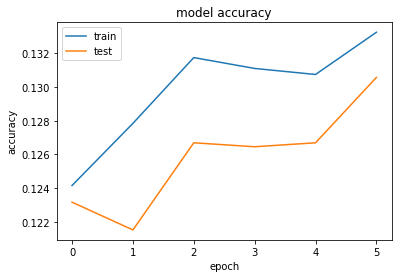

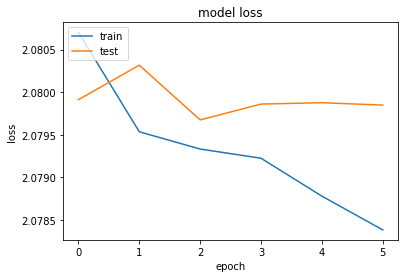

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 2:00

  2/266 [..............................] - ETA: 26s 

  3/266 [..............................] - ETA: 26s

  4/266 [..............................] - ETA: 26s

  5/266 [..............................] - ETA: 26s

  6/266 [..............................] - ETA: 26s

  7/266 [..............................] - ETA: 26s

  8/266 [..............................] - ETA: 26s

  9/266 [>.............................] - ETA: 26s

 10/266 [>.............................] - ETA: 26s

 11/266 [>.............................] - ETA: 26s

 12/266 [>.............................] - ETA: 26s

 13/266 [>.............................] - ETA: 26s

 14/266 [>.............................] - ETA: 25s

 15/266 [>.............................] - ETA: 25s

 16/266 [>.............................] - ETA: 25s

 17/266 [>.............................] - ETA: 25s

 18/266 [=>............................] - ETA: 25s

 19/266 [=>............................] - ETA: 25s

 20/266 [=>............................] - ETA: 25s

 21/266 [=>............................] - ETA: 25s

 22/266 [=>............................] - ETA: 24s

 23/266 [=>............................] - ETA: 24s

 24/266 [=>............................] - ETA: 24s

 25/266 [=>............................] - ETA: 24s

 26/266 [=>............................] - ETA: 24s

 27/266 [==>...........................] - ETA: 24s

 28/266 [==>...........................] - ETA: 24s

 29/266 [==>...........................] - ETA: 24s

 30/266 [==>...........................] - ETA: 24s

 31/266 [==>...........................] - ETA: 24s

 32/266 [==>...........................] - ETA: 24s

 33/266 [==>...........................] - ETA: 24s

 34/266 [==>...........................] - ETA: 24s

 35/266 [==>...........................] - ETA: 23s

 36/266 [===>..........................] - ETA: 23s

 37/266 [===>..........................] - ETA: 23s

 38/266 [===>..........................] - ETA: 23s

 39/266 [===>..........................] - ETA: 23s

 40/266 [===>..........................] - ETA: 23s

 41/266 [===>..........................] - ETA: 23s

 42/266 [===>..........................] - ETA: 23s

 43/266 [===>..........................] - ETA: 23s

 44/266 [===>..........................] - ETA: 23s

 45/266 [====>.........................] - ETA: 22s

 46/266 [====>.........................] - ETA: 22s

 47/266 [====>.........................] - ETA: 22s

 48/266 [====>.........................] - ETA: 22s

 49/266 [====>.........................] - ETA: 22s

 50/266 [====>.........................] - ETA: 22s

 51/266 [====>.........................] - ETA: 22s

 52/266 [====>.........................] - ETA: 22s

 53/266 [====>.........................] - ETA: 22s

 54/266 [=====>........................] - ETA: 22s

 55/266 [=====>........................] - ETA: 21s

 56/266 [=====>........................] - ETA: 21s

 57/266 [=====>........................] - ETA: 21s

 58/266 [=====>........................] - ETA: 21s

 59/266 [=====>........................] - ETA: 21s

 60/266 [=====>........................] - ETA: 21s

 61/266 [=====>........................] - ETA: 21s

 62/266 [=====>........................] - ETA: 21s

 63/266 [======>.......................] - ETA: 21s

 64/266 [======>.......................] - ETA: 20s

 65/266 [======>.......................] - ETA: 20s

 66/266 [======>.......................] - ETA: 20s

 67/266 [======>.......................] - ETA: 20s

 68/266 [======>.......................] - ETA: 20s

 69/266 [======>.......................] - ETA: 20s

 70/266 [======>.......................] - ETA: 20s

 71/266 [=======>......................] - ETA: 20s

 72/266 [=======>......................] - ETA: 20s

 73/266 [=======>......................] - ETA: 20s

 74/266 [=======>......................] - ETA: 20s

 75/266 [=======>......................] - ETA: 20s

 76/266 [=======>......................] - ETA: 20s

 77/266 [=======>......................] - ETA: 20s

 78/266 [=======>......................] - ETA: 20s

 79/266 [=======>......................] - ETA: 19s

 80/266 [========>.....................] - ETA: 19s

 81/266 [========>.....................] - ETA: 19s

 82/266 [========>.....................] - ETA: 19s

 83/266 [========>.....................] - ETA: 19s

 84/266 [========>.....................] - ETA: 19s

 85/266 [========>.....................] - ETA: 19s

 86/266 [========>.....................] - ETA: 19s

 87/266 [========>.....................] - ETA: 19s

 88/266 [========>.....................] - ETA: 19s

 89/266 [=========>....................] - ETA: 19s

 90/266 [=========>....................] - ETA: 19s

 91/266 [=========>....................] - ETA: 19s

 92/266 [=========>....................] - ETA: 18s

 93/266 [=========>....................] - ETA: 18s

 94/266 [=========>....................] - ETA: 18s

 95/266 [=========>....................] - ETA: 18s

 96/266 [=========>....................] - ETA: 18s

 97/266 [=========>....................] - ETA: 18s

 98/266 [==========>...................] - ETA: 18s

 99/266 [==========>...................] - ETA: 18s

100/266 [==========>...................] - ETA: 18s

101/266 [==========>...................] - ETA: 18s

102/266 [==========>...................] - ETA: 17s

103/266 [==========>...................] - ETA: 17s

104/266 [==========>...................] - ETA: 17s

105/266 [==========>...................] - ETA: 17s

106/266 [==========>...................] - ETA: 17s

107/266 [===========>..................] - ETA: 17s

108/266 [===========>..................] - ETA: 17s

109/266 [===========>..................] - ETA: 17s

110/266 [===========>..................] - ETA: 17s

111/266 [===========>..................] - ETA: 17s

112/266 [===========>..................] - ETA: 16s

113/266 [===========>..................] - ETA: 16s

114/266 [===========>..................] - ETA: 16s

115/266 [===========>..................] - ETA: 16s

116/266 [============>.................] - ETA: 16s

117/266 [============>.................] - ETA: 16s

118/266 [============>.................] - ETA: 16s

119/266 [============>.................] - ETA: 16s

120/266 [============>.................] - ETA: 16s

121/266 [============>.................] - ETA: 15s

122/266 [============>.................] - ETA: 15s

123/266 [============>.................] - ETA: 15s

124/266 [============>.................] - ETA: 15s

125/266 [=============>................] - ETA: 15s

126/266 [=============>................] - ETA: 15s

127/266 [=============>................] - ETA: 15s

128/266 [=============>................] - ETA: 15s

129/266 [=============>................] - ETA: 15s

130/266 [=============>................] - ETA: 15s

131/266 [=============>................] - ETA: 14s

132/266 [=============>................] - ETA: 14s

133/266 [==============>...............] - ETA: 14s

134/266 [==============>...............] - ETA: 14s

135/266 [==============>...............] - ETA: 14s

136/266 [==============>...............] - ETA: 14s

137/266 [==============>...............] - ETA: 14s

138/266 [==============>...............] - ETA: 14s

139/266 [==============>...............] - ETA: 14s

140/266 [==============>...............] - ETA: 13s

141/266 [==============>...............] - ETA: 13s

142/266 [===============>..............] - ETA: 13s

143/266 [===============>..............] - ETA: 13s

144/266 [===============>..............] - ETA: 13s

145/266 [===============>..............] - ETA: 13s

146/266 [===============>..............] - ETA: 13s

147/266 [===============>..............] - ETA: 13s

148/266 [===============>..............] - ETA: 13s

149/266 [===============>..............] - ETA: 13s

150/266 [===============>..............] - ETA: 12s

151/266 [================>.............] - ETA: 12s

152/266 [================>.............] - ETA: 12s

153/266 [================>.............] - ETA: 12s

154/266 [================>.............] - ETA: 12s

155/266 [================>.............] - ETA: 12s

156/266 [================>.............] - ETA: 12s

157/266 [================>.............] - ETA: 12s

158/266 [================>.............] - ETA: 12s

159/266 [================>.............] - ETA: 11s

160/266 [=================>............] - ETA: 11s

161/266 [=================>............] - ETA: 11s

162/266 [=================>............] - ETA: 11s

163/266 [=================>............] - ETA: 11s

164/266 [=================>............] - ETA: 11s

165/266 [=================>............] - ETA: 11s

166/266 [=================>............] - ETA: 11s

167/266 [=================>............] - ETA: 11s

168/266 [=================>............] - ETA: 10s

169/266 [==================>...........] - ETA: 10s

170/266 [==================>...........] - ETA: 10s

171/266 [==================>...........] - ETA: 10s

172/266 [==================>...........] - ETA: 10s

173/266 [==================>...........] - ETA: 10s

174/266 [==================>...........] - ETA: 10s

175/266 [==================>...........] - ETA: 10s

176/266 [==================>...........] - ETA: 10s

177/266 [==================>...........] - ETA: 10s

178/266 [===================>..........] - ETA: 9s 

179/266 [===================>..........] - ETA: 9s

180/266 [===================>..........] - ETA: 9s

181/266 [===================>..........] - ETA: 9s

182/266 [===================>..........] - ETA: 9s

183/266 [===================>..........] - ETA: 9s

184/266 [===================>..........] - ETA: 9s

185/266 [===================>..........] - ETA: 9s

186/266 [===================>..........] - ETA: 9s

187/266 [====================>.........] - ETA: 8s

188/266 [====================>.........] - ETA: 8s

189/266 [====================>.........] - ETA: 8s

190/266 [====================>.........] - ETA: 8s

191/266 [====================>.........] - ETA: 8s

192/266 [====================>.........] - ETA: 8s

193/266 [====================>.........] - ETA: 8s

194/266 [====================>.........] - ETA: 8s

195/266 [====================>.........] - ETA: 8s

196/266 [=====================>........] - ETA: 7s

197/266 [=====================>........] - ETA: 7s

198/266 [=====================>........] - ETA: 7s

199/266 [=====================>........] - ETA: 7s

200/266 [=====================>........] - ETA: 7s

201/266 [=====================>........] - ETA: 7s

202/266 [=====================>........] - ETA: 7s

203/266 [=====================>........] - ETA: 7s

204/266 [======================>.......] - ETA: 7s

205/266 [======================>.......] - ETA: 6s

206/266 [======================>.......] - ETA: 6s

207/266 [======================>.......] - ETA: 6s

208/266 [======================>.......] - ETA: 6s

209/266 [======================>.......] - ETA: 6s

210/266 [======================>.......] - ETA: 6s

211/266 [======================>.......] - ETA: 6s

212/266 [======================>.......] - ETA: 6s

213/266 [=======================>......] - ETA: 5s

214/266 [=======================>......] - ETA: 5s

215/266 [=======================>......] - ETA: 5s

216/266 [=======================>......] - ETA: 5s

217/266 [=======================>......] - ETA: 5s

218/266 [=======================>......] - ETA: 5s

219/266 [=======================>......] - ETA: 5s

220/266 [=======================>......] - ETA: 5s

221/266 [=======================>......] - ETA: 5s

222/266 [========================>.....] - ETA: 4s

223/266 [========================>.....] - ETA: 4s

224/266 [========================>.....] - ETA: 4s

225/266 [========================>.....] - ETA: 4s

226/266 [========================>.....] - ETA: 4s

227/266 [========================>.....] - ETA: 4s

228/266 [========================>.....] - ETA: 4s

229/266 [========================>.....] - ETA: 4s

230/266 [========================>.....] - ETA: 4s

231/266 [=========================>....] - ETA: 3s

232/266 [=========================>....] - ETA: 3s

233/266 [=========================>....] - ETA: 3s

234/266 [=========================>....] - ETA: 3s

235/266 [=========================>....] - ETA: 3s

236/266 [=========================>....] - ETA: 3s

237/266 [=========================>....] - ETA: 3s

238/266 [=========================>....] - ETA: 3s

239/266 [=========================>....] - ETA: 3s

240/266 [==========================>...] - ETA: 2s

241/266 [==========================>...] - ETA: 2s

242/266 [==========================>...] - ETA: 2s

243/266 [==========================>...] - ETA: 2s

244/266 [==========================>...] - ETA: 2s

245/266 [==========================>...] - ETA: 2s

246/266 [==========================>...] - ETA: 2s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 2s

249/266 [===========================>..] - ETA: 1s

250/266 [===========================>..] - ETA: 1s

251/266 [===========================>..] - ETA: 1s

252/266 [===========================>..] - ETA: 1s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 1s

258/266 [============================>.] - ETA: 0s

259/266 [============================>.] - ETA: 0s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 30s 113ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('579f5be4-5bc9-4f80-8749-45e4864b0fff'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1111,
 'precentage_won': 13.056763426959689,
 'expected_won': 12.5,
 'eraned': '£555,500.00',
 'revenue': '-£295,400.00'}